                                     GLOBAL POWER PLANT DATABASE                                   
                                    
Project Description:
                                    
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

                                    Atrributes for the Database:
    
country: 3 character country code corresponding to the ISO 3166-1 alpha-3 specification  
    
country_long: longer form of the country designation
    
name: name or title of the power plant, generally in Romanized form
    
gppd_idnr (text): 10 or 12 character identifier for the power plant
    
capacity_mw electrical generating capacity in megawatts

latitude: geolocation in decimal degrees; WGS84 (EPSG:4326)
    
longitude geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export
    
other_fuel1 (text): energy source used in electricity generation or export
    
other_fuel2: energy source used in electricity generation or export
    
other_fuel3: energy source used in electricity generation or export
    
commissioning_year: year of plant operation, weighted by unit-capacity when data is available
    
owner: majority shareholder of the power plant, generally in Romanized form
    
source: entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
url: web document corresponding to the `source` field
    
geolocation_source: attribution for geolocation information
    
wepp_id: a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
year_of_capacity_data: year the capacity information was reported
    
generation_gwh_2013: electricity generation in gigawatt-hours reported for the year 2013
    
generation_gwh_2014 : electricity generation in gigawatt-hours reported for the year 2014
    
generation_gwh_2015: electricity generation in gigawatt-hours reported for the year 2015
    
generation_gwh_2016 : electricity generation in gigawatt-hours reported for the year 2016
    
generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2017
    
generation_gwh_2018: electricity generation in gigawatt-hours reported for the year 2018
    
generation_gwh_2019: electricity generation in gigawatt-hours reported for the year 2019
    
generation_data_source: attribution for the reported generation information
    
estimated_generation_gwh_2013: estimated electricity generation in gigawatt-hours for the year 2013
    
estimated_generation_gwh_2014: estimated electricity generation in gigawatt-hours for the year 2014 
    
estimated_generation_gwh_2015: estimated electricity generation in gigawatt-hours for the year 2015 
    
estimated_generation_gwh_2016: estimated electricity generation in gigawatt-hours for the year 2016 
    
estimated_generation_gwh_2017: estimated electricity generation in gigawatt-hours for the year 2017 
    
estimated_generation_note_2013: label of the model/method used to estimate generation for the year 2013
    
estimated_generation_note_2014: label of the model/method used to estimate generation for the year 2014 
    
estimated_generation_note_2015: label of the model/method used to estimate generation for the year 2015
    
estimated_generation_note_2016: label of the model/method used to estimate generation for the year 2016
    
estimated_generation_note_2017: label of the model/method used to estimate generation for the year 2017 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



In [2]:
files=['database_IND.csv','database_AUS.csv','database_USA.csv']

In [3]:
INDIA=pd.read_csv('database_IND.csv')

In [4]:
AUSTRALIA=pd.read_csv('database_AUS.csv')

In [5]:
USA=pd.read_csv('database_USA.csv')

In [6]:
INDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
AUSTRALIA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   512 non-null    object 
 1   country_long              512 non-null    object 
 2   name                      512 non-null    object 
 3   gppd_idnr                 512 non-null    object 
 4   capacity_mw               506 non-null    float64
 5   latitude                  512 non-null    float64
 6   longitude                 512 non-null    float64
 7   primary_fuel              512 non-null    object 
 8   other_fuel1               0 non-null      float64
 9   other_fuel2               0 non-null      float64
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        292 non-null    float64
 12  owner                     495 non-null    object 
 13  source                    512 non-null    object 
 14  url       

In [8]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11879 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   11879 non-null  object 
 1   country_long              11879 non-null  object 
 2   name                      11879 non-null  object 
 3   gppd_idnr                 11879 non-null  object 
 4   capacity_mw               11879 non-null  float64
 5   latitude                  11847 non-null  float64
 6   longitude                 11847 non-null  float64
 7   primary_fuel              9875 non-null   object 
 8   other_fuel1               1430 non-null   object 
 9   other_fuel2               269 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        9829 non-null   float64
 12  owner                     11866 non-null  object 
 13  source                    11879 non-null  object 
 14  url   

In [9]:
filter_df=USA[USA['estimated_generation_gwh'].isna()]
filter_df

country              country_long                            name  \
0         USA  United States of America  10 Briggs Solar NG  LLC (East)   
1         USA  United States of America      100 Brook Hill Drive Solar   
2         USA  United States of America      1001 Ebenezer Church Solar   
3         USA  United States of America             1008 Matthews Solar   
4         USA  United States of America               1009 Yadkin Solar   
...       ...                       ...                             ...   
11874     USA  United States of America        Zotos International WPGF   
11875     USA  United States of America   Zumbro Community Solar Garden   
11876     USA  United States of America             Zumbro Solar Garden   
11877     USA  United States of America                            Zuni   
11878     USA  United States of America             eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1      USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2      USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3      USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4      USA0063445          0.0   36.1475   -80.6561          NaN         NaN   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                2019.0                  NaN   
1             NaN  ...                2019.0                  NaN   
2             NaN  ...                2019.0                  NaN   
3             NaN  ...                2019.0                  NaN   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN              2.46700   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...              

In [10]:
# just for the confirmation Only i did all this steps

In [15]:

GPdf=pd.concat(map(pd.read_csv,files),ignore_index=True)

In [16]:
GPdf

country              country_long                           name  \
0         IND                     India               ACME Solar Tower   
1         IND                     India            ADITYA CEMENT WORKS   
2         IND                     India       AES Saurashtra Windfarms   
3         IND                     India                    AGARTALA GT   
4         IND                     India                   AKALTARA TPP   
...       ...                       ...                            ...   
13293     USA  United States of America       Zotos International WPGF   
13294     USA  United States of America  Zumbro Community Solar Garden   
13295     USA  United States of America            Zumbro Solar Garden   
13296     USA  United States of America                           Zuni   
13297     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1      WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2      WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3      IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4      IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
...           ...          ...       ...        ...          ...         ...   
13293  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
13294  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
13295  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
13296  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
13297  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                   NaN                  NaN   
1             NaN  ...                   NaN                  NaN   
2             NaN  ...                   NaN                  NaN   
3             NaN  ...                2019.0              2.41461   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
13293         NaN  ...                2019.0              3.67100   
13294         NaN  ...                2019.0                  NaN   
13295         NaN  ...                2019.0                  NaN   
13296         NaN  ...                2019.0              0.00000   
13297         NaN  ...                2019.0             12.96800   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3              617.789264             843.747          886.004428   
4             3035.550000            5916.370         6243.000000   
...                   ...                 ...                 ...   
13293            2.460150               2.489            1.670000   
13294                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296            0.000000               0.000                 NaN   
13297           51.276000              71.505           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3              663.774500           626.239128                  NaN   
4             5385.579736          7279.000000                  NaN   
...                   ...                  ...                  ...   
1

In [17]:
GPdf.tail(50)

country              country_long  \
13248     USA  United States of America   
13249     USA  United States of America   
13250     USA  United States of America   
13251     USA  United States of America   
13252     USA  United States of America   
13253     USA  United States of America   
13254     USA  United States of America   
13255     USA  United States of America   
13256     USA  United States of America   
13257     USA  United States of America   
13258     USA  United States of America   
13259     USA  United States of America   
13260     USA  United States of America   
13261     USA  United States of America   
13262     USA  United States of America   
13263     USA  United States of America   
13264     USA  United States of America   
13265     USA  United States of America   
13266     USA  United States of America   
13267     USA  United States of America   
13268     USA  United States of America   
13269     USA  United States of America   
13270     USA  United States of America   
13271     USA  United States of America   
13272     USA  United States of America   
13273     USA  United States of America   
13274     USA  United States of America   
13275     USA  United States of America   
13276     USA  United States of America   
13277     USA  United States of America   
13278     USA  United States of America   
13279     USA  United States of America   
13280     USA  United States of America   
13281     USA  United States of America   
13282     USA  United States of America   
13283     USA  United States of America   
13284     USA  United States of America   
13285     USA  United States of America   
13286     USA  United States of America   
13287     USA  United States of America   
13288     USA  United States of America   
13289     USA  United States of America   
13290     USA  United States of America   
13291     USA  United States of America   
13292     USA  United States of America   
13293     USA  United States of America   
13294     USA  United States of America   
13295     USA  United States of America   
13296     USA  United States of America   
13297     USA  United States of America   

                                           name   gppd_idnr  capacity_mw  \
13248                                     Yazoo  USA0002067         34.1   
13249                             Yellow Jacket  USA0061873          5.0   
13250   Yellow Mills Rd #1 Community Solar Farm  USA0062517          0.0   
13251   Yellow Mills Rd #2 Community Solar Farm  USA0062518          0.0   
13252   Yellow Mills Rd #3 Community Solar Farm  USA0062519          0.0   
13253                    Yellowhammer Gas Plant  USA0054730          3.4   
13254                     Yellowstone Energy LP  USA0050931         68.0   
13255                                Yellowtail  USA0002204        268.8   
13256                                      Yelm  USA0003878         12.0   
13257                            Yemassee Solar  USA0062353          0.0   
13258                              Yeoman Creek  USA0061910          0.0   
13259                               Yerba Buena  USA0059257          4.0   
13260                                   Yigo CT  WRI1029195         21.0   
13261                 Yolo County Solar Project  USA0057422          1.0   
13262                                     Yonah  USA0000729         22.5   
13263                               Yorba Linda  USA0006647          5.1   
13264             York County Resource Recovery  USA0050215         36.5   
13265                        York Energy Center  USA0055524       1449.4   
13266               York Generation Company LLC  USA0054693         52.2   
13267                                York Haven  USA0003117         19.6   
13268                    York Road Solar I  LLC  USA0060107          2.0   
13269                                York Solar  USA0062354          0.0   
13270                                  Yorktown  USA0003809     

In [18]:
# checking the number of feature in dataset
GPdf.shape[0]

13298

In [19]:
# checking the number of records in dataset
GPdf.shape[1]

27

In [20]:
GPdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [15]:
GPdf[GPdf['generation_gwh_2019'].isna()]

country              country_long  \
0         IND                     India   
1         IND                     India   
2         IND                     India   
3         IND                     India   
4         IND                     India   
...       ...                       ...   
13269     USA  United States of America   
13271     USA  United States of America   
13277     USA  United States of America   
13295     USA  United States of America   
13296     USA  United States of America   

                                           name   gppd_idnr  capacity_mw  \
0                              ACME Solar Tower  WRI1020239          2.5   
1                           ADITYA CEMENT WORKS  WRI1019881         98.0   
2                      AES Saurashtra Windfarms  WRI1026669         39.2   
3                                   AGARTALA GT  IND0000001        135.0   
4                                  AKALTARA TPP  IND0000002       1800.0   
...                                         ...         ...          ...   
13269                                York Solar  USA0062354          0.0   
13271  Yorktown Battery Energy Storage Facility  USA0063325          0.0   
13277                         Yum Yum Solar LLC  USA0063026          0.0   
13295                       Zumbro Solar Garden  USA0063426          0.0   
13296                                      Zuni  USA0000478          0.0   

       latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0       28.1839    73.2407        Solar         NaN         NaN  ...   
1       24.7663    74.6090         Coal         NaN         NaN  ...   
2       21.9038    69.3732         Wind         NaN         NaN  ...   
3       23.8712    91.3602          Gas         NaN         NaN  ...   
4       21.9603    82.4091         Coal         Oil         NaN  ...   
...         ...        ...          ...         ...         ...  ...   
13269   34.5033   -82.2521          NaN         NaN         NaN  ...   
13271   34.0047  -118.0684          NaN         NaN         NaN  ...   
13277   35.2525   -89.2514          NaN         NaN         NaN  ...   
13295   44.0460   -92.7600          NaN         NaN         NaN  ...   
13296   39.7373  -105.0170          NaN         NaN         NaN  ...   

      year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                       NaN                  NaN                 NaN   
1                       NaN                  NaN                 NaN   
2                       NaN                  NaN                 NaN   
3                    2019.0              2.41461          617.789264   
4                    2019.0                  NaN         3035.550000   
...                     ...                  ...                 ...   
13269                2019.0                  NaN                 NaN   
13271                2019.0                  NaN                 NaN   
13277                2019.0                  NaN                 NaN   
13295                2019.0                  NaN                 NaN   
13296                2019.0              0.00000            0.000000   

      generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                 843.747          886.004428          663.774500   
4                5916.370         6243.000000         5385.579736   
...                   ...                 ...                 ...   
13269                 NaN                 NaN                 NaN   
13271                 NaN                 NaN                 NaN   
13277                 NaN                 NaN                 NaN   
13295                 NaN                 NaN                 NaN   
13296               0.000                 NaN                 NaN   

       generation

In [22]:
# url feature in dataset also dont have useful information for the model prediction so we sshould remove it
GPdf.drop('url',axis=1,inplace=True)

In [23]:
GPdf.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

#Here from the above information we observed that  estimated_generation_gwh, wepp_id ,other_fuel1,other_fuel2,other_fuel3  features has highest missing values and estimated_generation_gwh feature contain only nan value so its better to remove this feature.
If the feature has maximum missing value then this feature is useless for predicting the model better performance  

In [24]:
GPdf.drop('estimated_generation_gwh',axis=1,inplace=True)

In [25]:
GPdf.drop('wepp_id',axis=1,inplace=True)

In [26]:
GPdf.drop('other_fuel1',axis=1,inplace=True)

In [27]:
GPdf.drop(['other_fuel2','other_fuel3'],axis=1,inplace=True)

In [25]:
#dropped above column because 80-90 percent of data are missing

In [28]:
GPdf.isnull().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [29]:
# displaying count of unique value in each feature
GPdf.nunique()

country                       3
country_long                  3
name                      13266
gppd_idnr                 13298
capacity_mw                2304
latitude                  12385
longitude                 12733
primary_fuel                 14
commissioning_year         1936
owner                      5877
source                      206
geolocation_source            5
year_of_capacity_data         1
generation_gwh_2013        5616
generation_gwh_2014        6306
generation_gwh_2015        6692
generation_gwh_2016        7150
generation_gwh_2017        7630
generation_gwh_2018        8040
generation_gwh_2019        8368
generation_data_source        3
dtype: int64

In [30]:
# here from the above observation year_of_capacity_data is having only 1 unique value  and all the values are same in the feature so it is useless feature for model prediction so we need to drop it 
GPdf.drop('year_of_capacity_data',axis=1,inplace=True)

In [517]:
#GPdf.drop('generation_data_source',axis=1,inplace=True)

In [518]:
#GPdf.drop('geolocation_source',axis=1,inplace=True)

In [31]:
# using sample method we are displaying random rows from the dataframe 
GPdf.sample(10) #displaying 10 random rows from the dataframe

country              country_long  \
7634      USA  United States of America   
7394      USA  United States of America   
1723      USA  United States of America   
7469      USA  United States of America   
8785      USA  United States of America   
5406      USA  United States of America   
4315      USA  United States of America   
3882      USA  United States of America   
10291     USA  United States of America   
9258      USA  United States of America   

                                           name   gppd_idnr  capacity_mw  \
7634                                Madison Dam  USA0006422          8.8   
7394               Littlefield Solar Center LLC  USA0058809          5.0   
1723                                     Almond  USA0062546          0.0   
7469                 Los Angeles Harbor College  USA0057314          1.2   
8785                               Notus Wind 1  USA0057414          1.7   
5406   Gemini Technologies Services  Inc. Solar  USA0060804          1.3   
4315                          Dodge County Wind  USA0062437          0.0   
3882                     Coyote Crest Wind Farm  USA0058778          0.0   
10291                                 Rose Hill  USA0059375          2.0   
9258                             Panoche Peaker  USA0055874         49.9   

       latitude  longitude primary_fuel  commissioning_year  \
7634    45.4879  -111.6338        Hydro              1906.5   
7394    35.4339   -77.4381        Solar              2016.0   
1723    36.2122  -119.9100          NaN                 NaN   
7469    33.7831  -118.2849        Solar              2010.0   
8785    41.6083   -70.6089         Wind              2010.0   
5406    40.8484   -74.4676        Solar              2013.0   
4315    44.0056   -92.9504          NaN                 NaN   
3882    46.7383  -123.3478          NaN                 NaN   
10291   34.8239   -77.9697        Solar              2013.0   
9258    36.6535  -120.5783          Gas              1973.0   

                                        owner  \
7634                      NorthWestern Energy   
7394                 SRE Utility Solar 1  LLC   
1723                     Westlands Almond LLC   
7469   Los Angeles Community College District   
8785                   Notus Clean Energy LLC   
5406       Gemini Technologies Services  Inc.   
4315                   Dodge County Wind  LLC   
3882                 Innogy Renewables US LLC   
10291                Cypress Creek Renewables   
9258                     Wellhead Energy  LLC   

                                       source  \
7634   U.S. Energy Information Administration   
7394   U.S. Energy Information Administration   
1723   U.S. Energy Information Administration   
7469   U.S. Energy Information Administration   
8785   U.S. Energy Information Administration   
5406   U.S. Energy Information Administration   
4315   U.S. Energy Information Administration   
3882   U.S. Energy Information Administration   
10291  U.S. Energy Information Administration   
9258   U.S. Energy Information Administration   

                           geolocation_source  generation_gwh_2013  \
7634   U.S. Energy Information Administration              56.4730   
7394   U.S. Energy Information Administration                  NaN   
1723   U.S. Energy Information Administration                  NaN   
7469   U.S. Energy Information Administration               3.3050   
8785   U.S. Energy Information Administration               4.8590   
5406   U.S. Energy Information Administration                  NaN   
4315   U.S. Energy Information Administration                  NaN   
3882   U.S. Energy Information Administration                  NaN   
10291  U.S. Energy Information Administration               3.4056   
9258   U.S. Energy Information Administration               4.2300   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
7634                53.649               59.401               57.101   
7394  

In [32]:
for col in GPdf.columns:
    print(GPdf[col].value_counts())

country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64
country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64
name
Richland                      3
Central Utility Plant         2
Clover                        2
Newport                       2
Unknown                       2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: count, Length: 13266, dtype: int64
gppd_idnr
WRI1020239    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
             ..
USA0006378    1
USA0000840    1
USA0050818    1
USA0062324    1
USA0059281    1
Name: count, Length: 13298, dtype: int64
capacity_mw
0.0       2030
5.0        552
1.0        534
2.0        479
1.5        267
          ... 
119.1        1
251.8        1
153.9        1
1454.6       1

In [33]:
GPdf.describe()

capacity_mw      latitude     longitude  commissioning_year  \
count  13292.000000  13220.000000  13220.000000        10654.000000   
mean     117.738717     35.053213    -73.794217         1998.184904   
std      347.169038     15.444195     62.868834           24.017781   
min        0.000000    -42.888300   -171.712400         1896.000000   
25%        1.500000     33.901700   -104.659875         1988.000000   
50%        5.500000     38.389750    -87.346000         2008.000000   
75%       52.725000     42.175125    -75.475925         2015.000000   
max     6809.000000    425.246100    153.434100         2020.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count          7170.000000          7534.000000          7993.000000   
mean            563.383222           635.739731           616.801877   
std            2030.523760          2193.172655          2148.167470   
min            -947.600000          -989.619000          -864.428000   
25%               1.653075             2.018000             2.140000   
50%              21.384500            22.241000            19.504000   
75%             185.326498           217.069500           200.279000   
max           31431.080000         32320.917000         32525.595000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count          8701.000000          9292.000000          9858.000000  
mean            561.784508           532.472482           513.679016  
std            2050.411295          2001.411908          1963.485305  
min            -768.620000          -934.944000          -982.622000  
25%               2.108000             2.063750             2.141250  
50%              15.410278            13.433861            12.308500  
75%             173.348004           157.889688           149.141249  
max           32377.477000         35116.000000         35136.000000

In [34]:
GPdf[GPdf['generation_gwh_2013']==-947.600000]

country              country_long         name   gppd_idnr  capacity_mw  \
782      IND                     India       TADALI  WRI1020016        600.0   
2207     USA  United States of America  Bath County  USA0006167       2862.0   

      latitude  longitude primary_fuel  commissioning_year  \
782    20.0116    79.2036         Coal                 NaN   
2207   38.2089   -79.8000        Hydro              1986.0   

                             owner                                  source  \
782               Dhariwal Pvt ltd                        Dhariwal Pvt ltd   
2207  Virginia Electric & Power Co  U.S. Energy Information Administration   

                          geolocation_source  generation_gwh_2013  \
782                                      WRI               -947.6   
2207  U.S. Energy Information Administration               -947.6   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
782                   NaN                  NaN                  NaN   
2207             -989.619             -864.428              -768.62   

      generation_gwh_2017  generation_gwh_2018 generation_gwh_2019  \
782                   NaN                  NaN                 NaN   
2207             -934.944             -982.622            -780.339   

                      generation_data_source  
782                                      NaN  
2207  U.S. Energy Information Administration

In [35]:
# Separating categorical feature and numerical feature 
category=[]
numerical=[]
def sep_feature():
    for i in GPdf.columns:
        if GPdf[i].dtypes=='object':
            category.append(i)
        else:
            numerical.append(i)
    

In [36]:
sep_feature()

In [36]:
#del category[8]

In [37]:
category

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [38]:
numerical

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [39]:
GPdf.isnull().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
geolocation_source          23
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [40]:
for col in category:
    GPdf[col]=GPdf[col].fillna(GPdf[col].mode()[0])

In [41]:
for col in numerical:
    GPdf[col]=GPdf[col].fillna(GPdf[col].mean())

In [42]:
GPdf['generation_gwh_2019'] = pd.to_numeric(GPdf['generation_gwh_2019'], errors='coerce')

In [43]:
GPdf['generation_gwh_2019']=GPdf['generation_gwh_2019'].fillna(GPdf['generation_gwh_2019'].mean())

In [44]:
GPdf.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [44]:
# now I have filled all the missing value in the feature 

In [45]:
# Here we are trying to find the insights for top countries which has highest number of pwer plants
country_plant_count=GPdf.country_long.value_counts()
print(country_plant_count)

country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64


Text(0, 0.5, 'Number of plant')

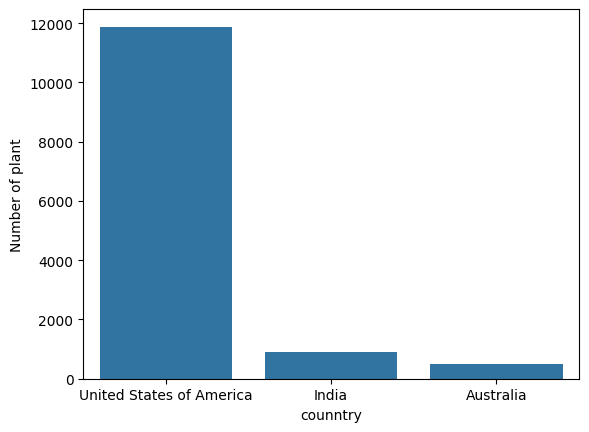

In [45]:
sns.barplot(x=country_plant_count.index,y=country_plant_count)
plt.xlabel('counntry')
plt.ylabel('Number of plant')


<Axes: xlabel='primary_fuel', ylabel='count'>

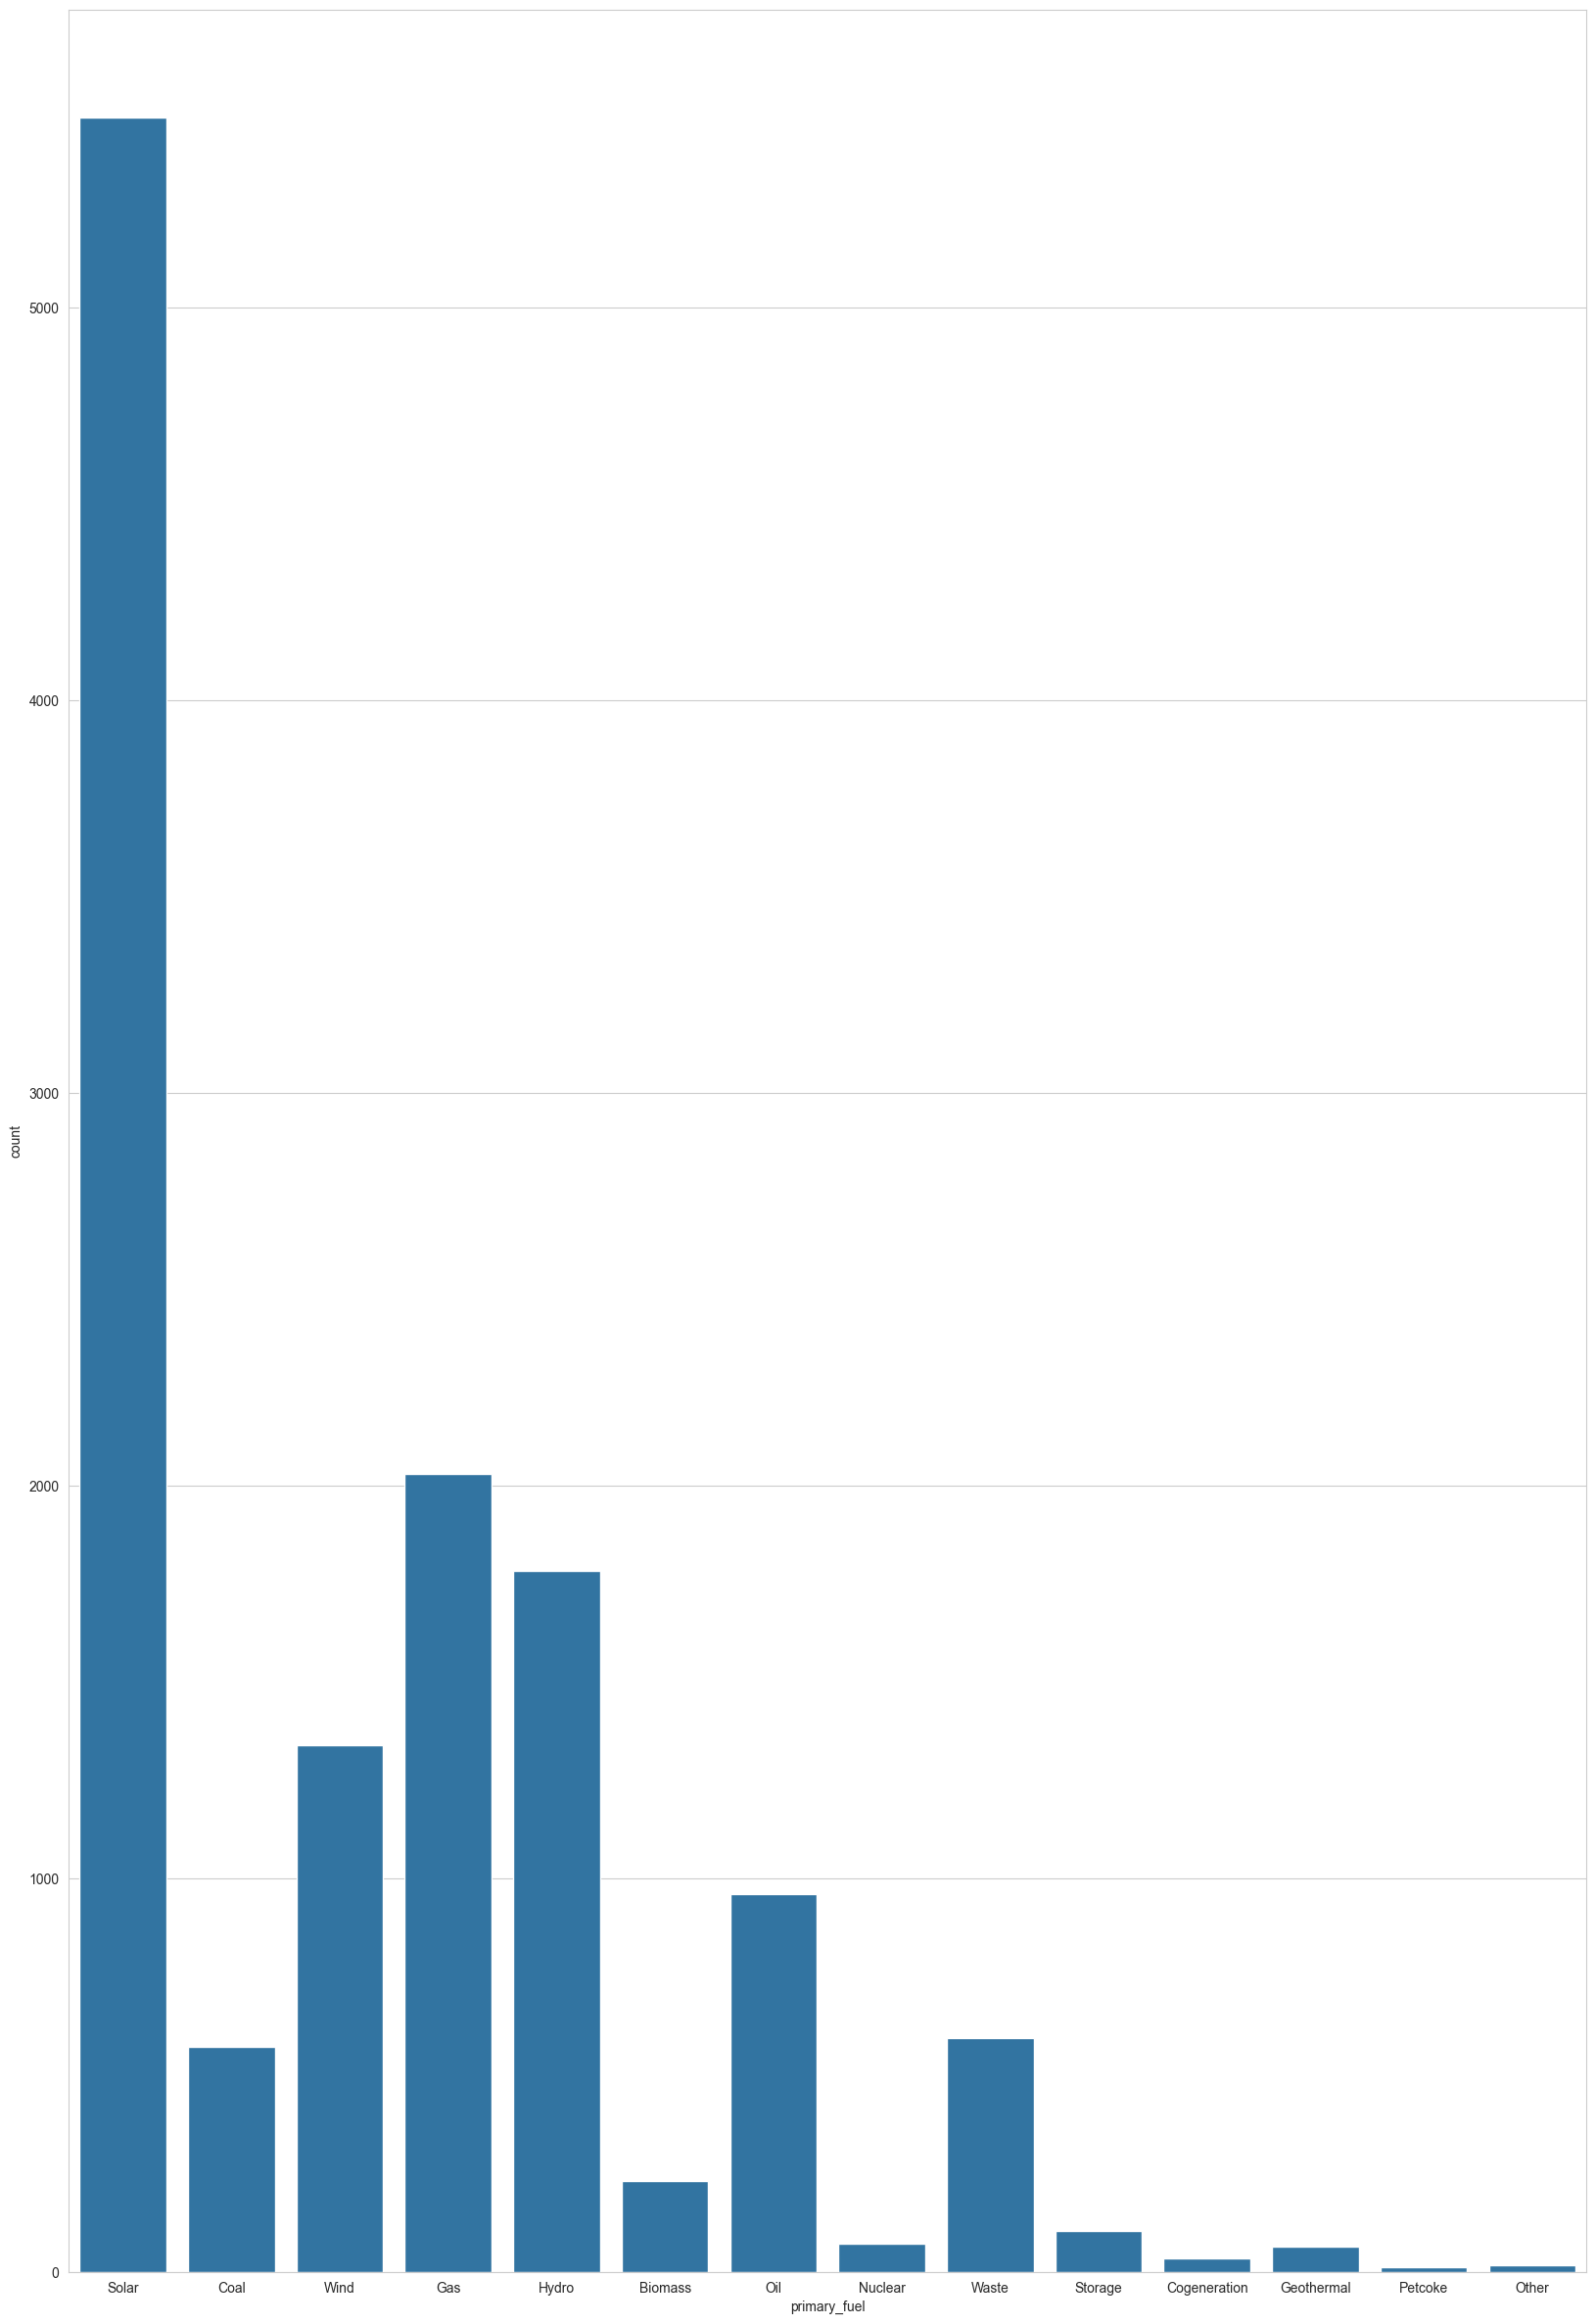

In [47]:
plt.figure(figsize=(20,30))
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=GPdf)

Text(0.5, 0, 'Country Name')

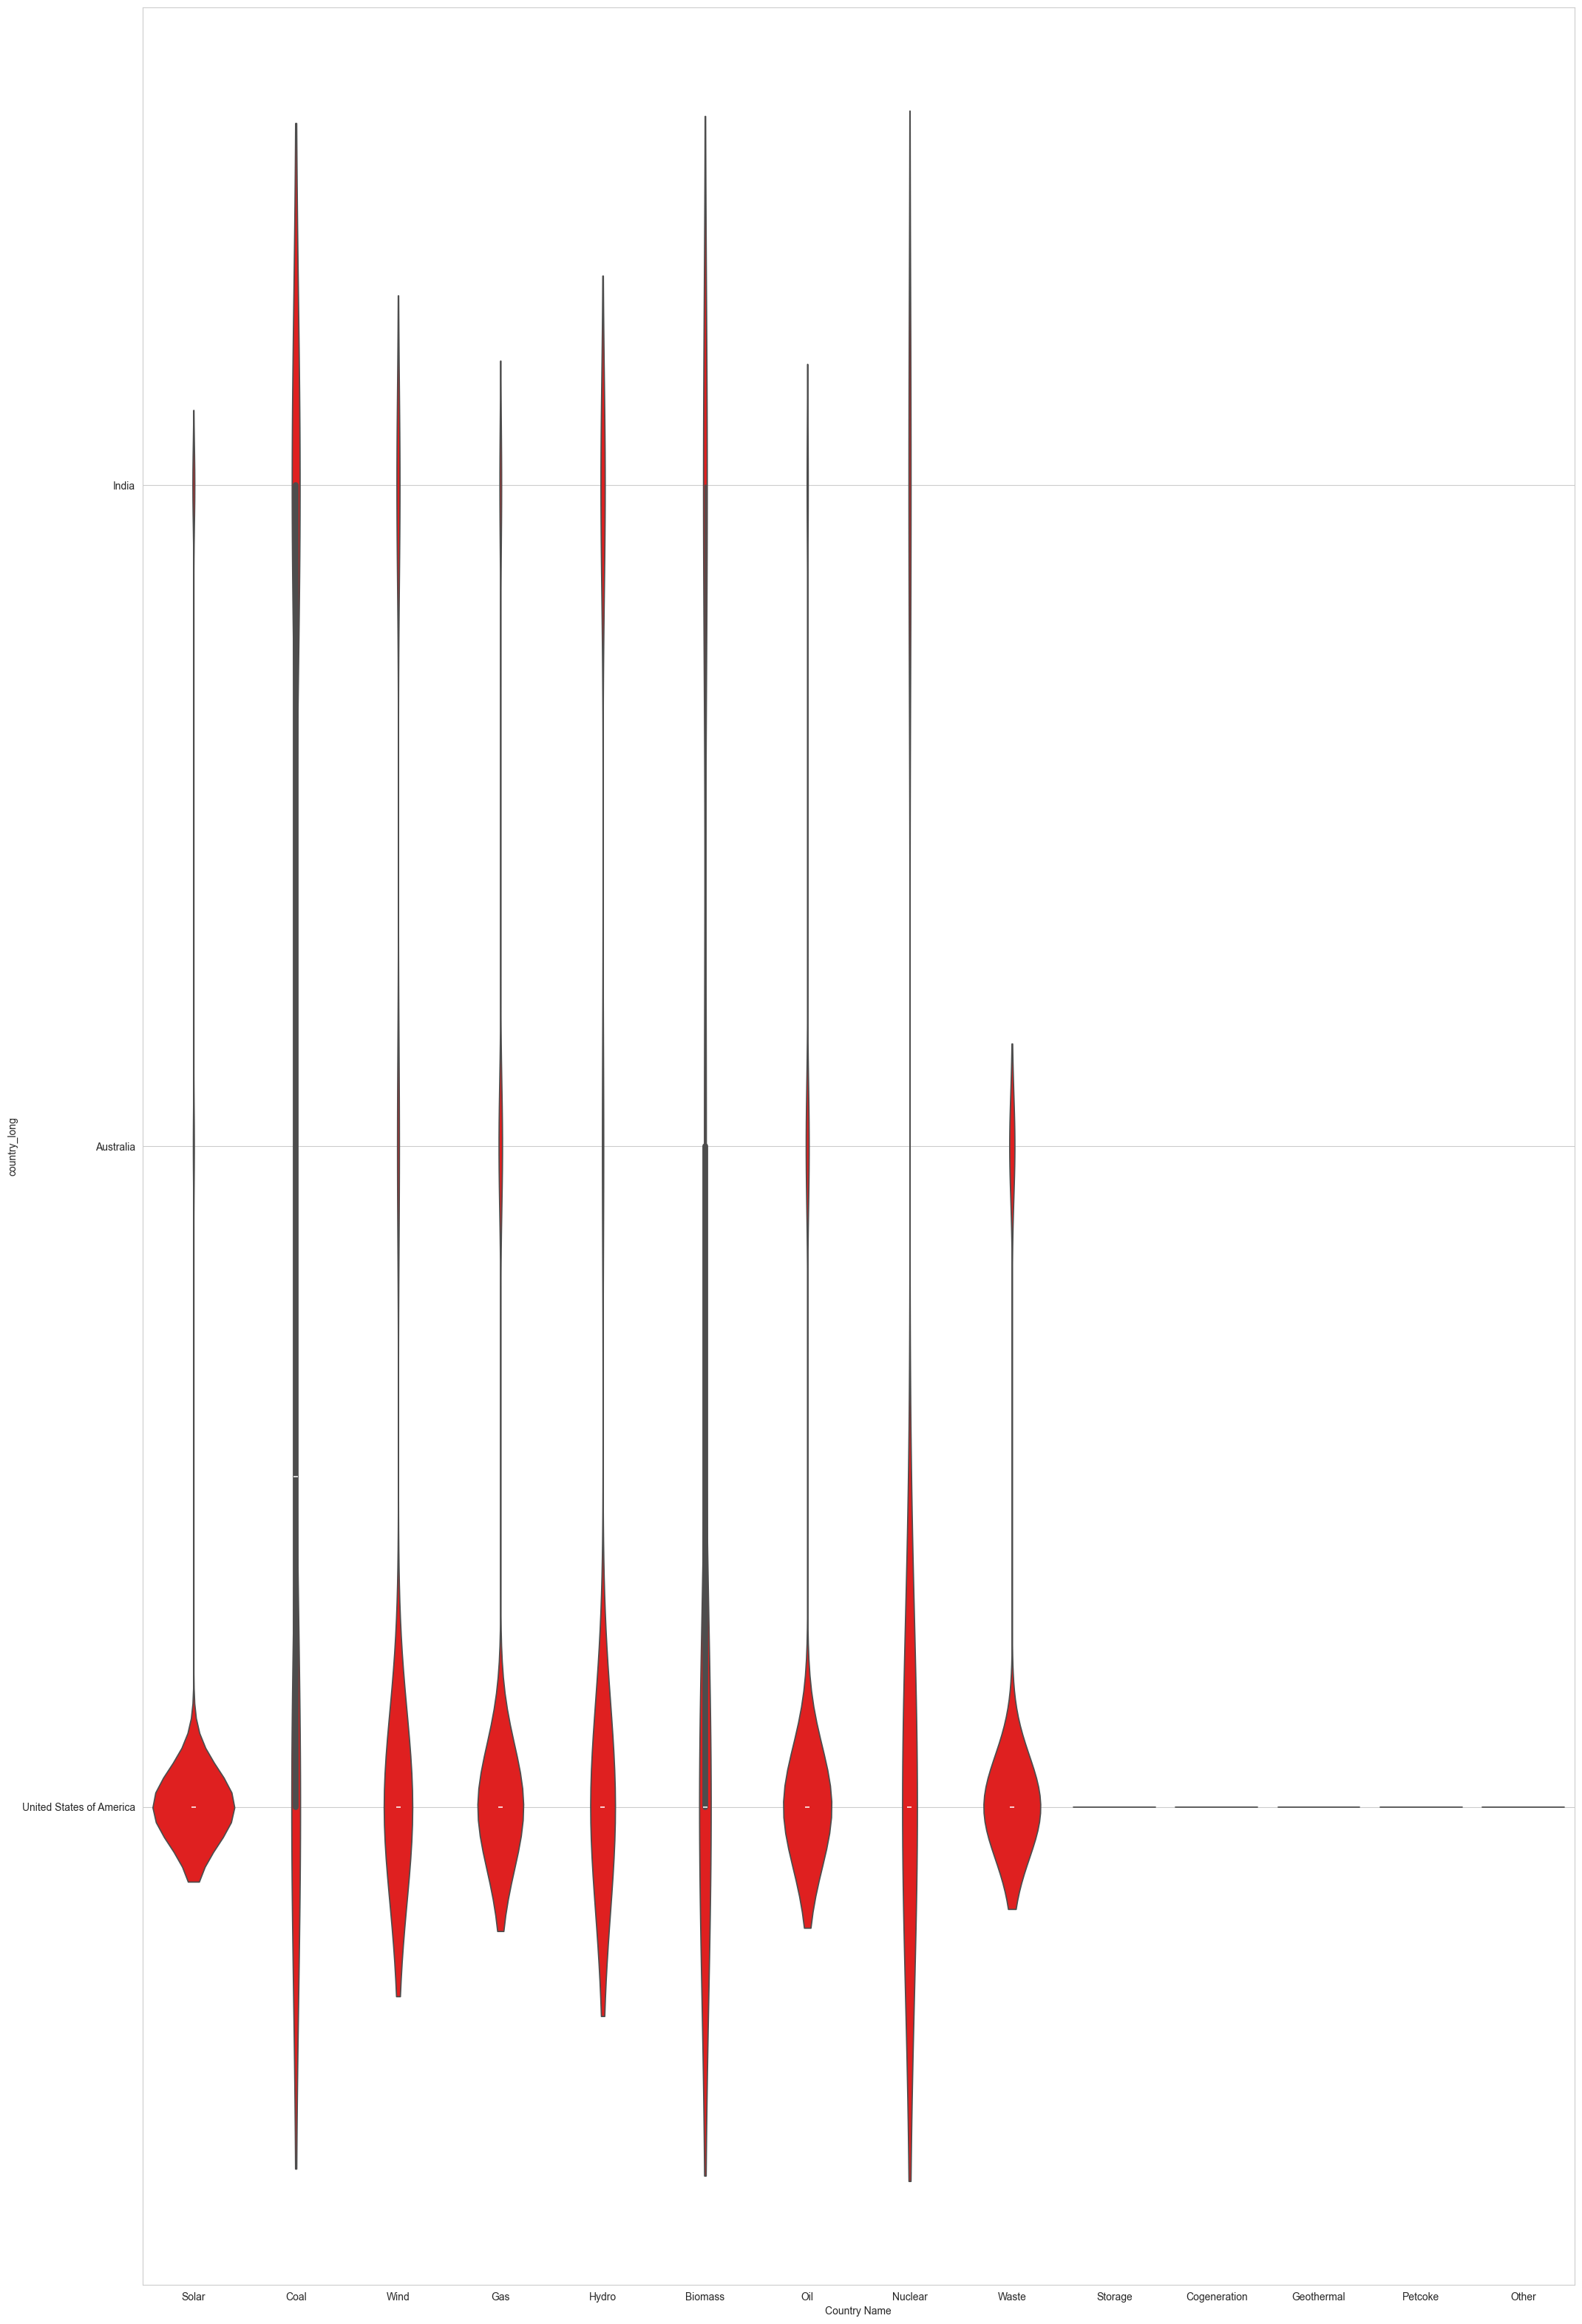

In [50]:
plt.figure(figsize=(25,40))
sns.violinplot(x='primary_fuel',y='country_long',data=GPdf,color='red')
plt.xlabel('Country Name')


In [48]:
countries_capacity = GPdf.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

capacity_mw
country_long                          
United States of America  1.204643e+06
India                     2.958849e+05
Australia                 6.516116e+04

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

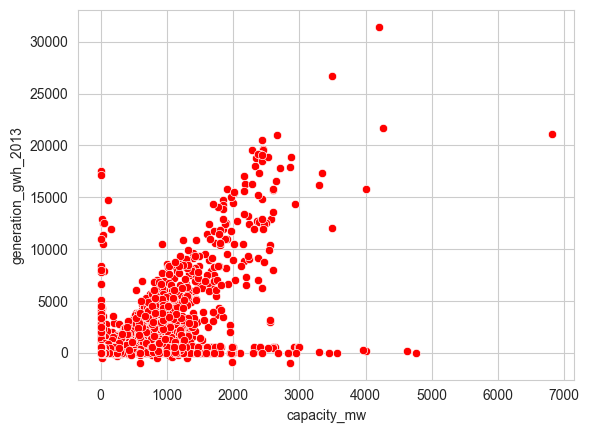

In [49]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2013',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

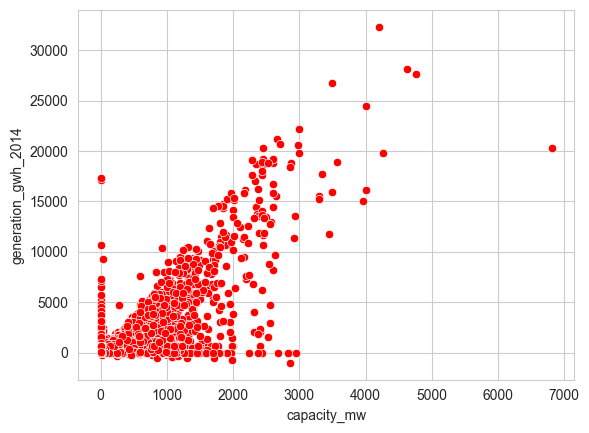

In [50]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2014',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

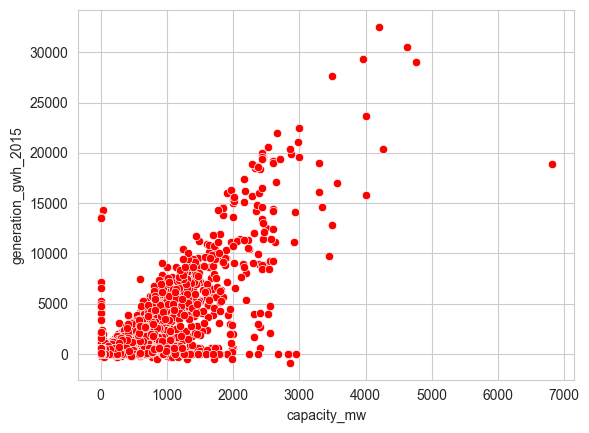

In [51]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2015',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

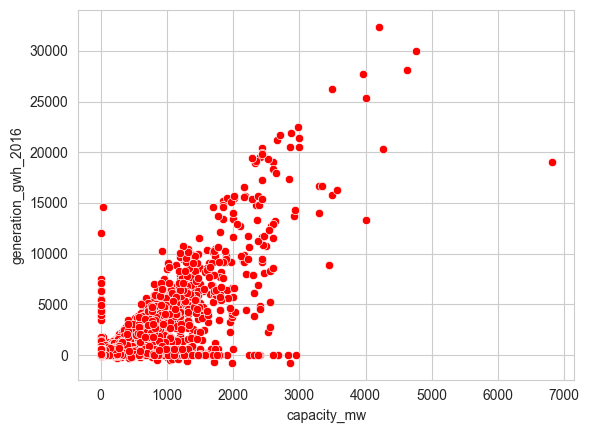

In [52]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2016',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

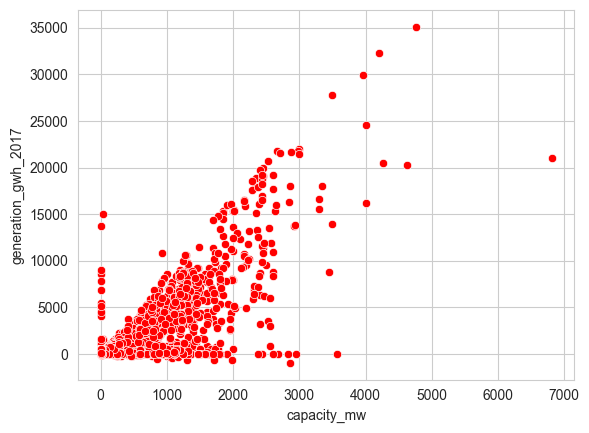

In [53]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2017',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

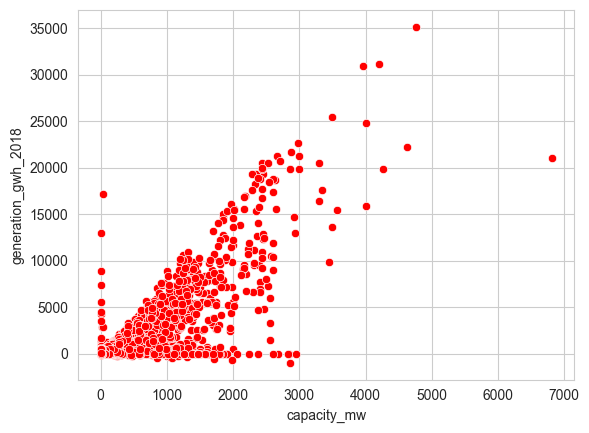

In [54]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2018',x='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2019'>

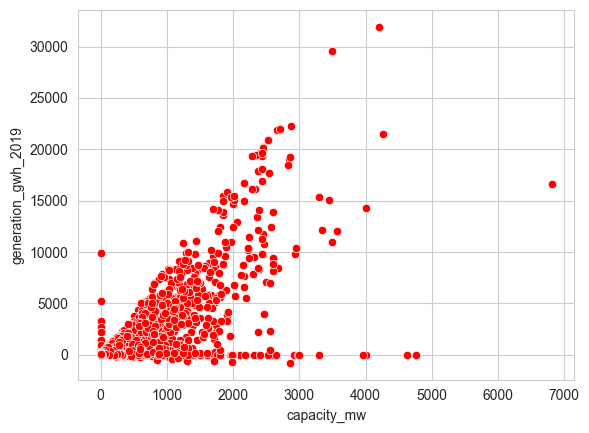

In [55]:
sns.set_style('whitegrid')
sns.scatterplot(y='generation_gwh_2019',x='capacity_mw',data=GPdf,color='red')

In [56]:
est_gen_2013 = GPdf.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False).head(10)
est_gen_2013

generation_gwh_2013
country_long                                 
United States of America         6.694562e+06
India                            4.544343e+05
Australia                        3.428739e+05

In [77]:
est_gen_2013.reset_index(inplace=True)

Text(0.5, 0, 'Country name')

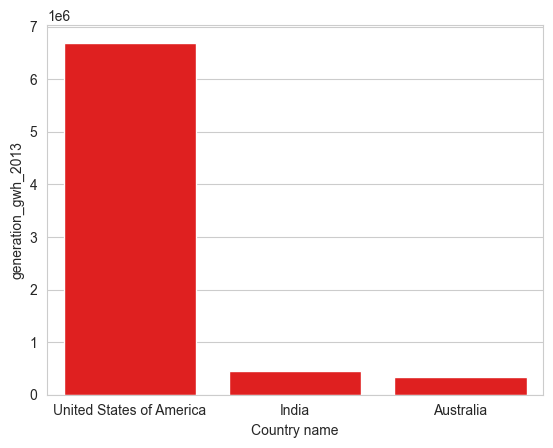

In [57]:

sns.barplot(x='country_long',y='generation_gwh_2013',data=est_gen_2013,color='red')
plt.xlabel('Country name')

In [58]:
est_gen_2014 = GPdf.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10)
est_gen_2014

generation_gwh_2014
country_long                                 
United States of America         6.808409e+06
India                            1.293668e+06
Australia                        3.519899e+05

Text(0.5, 0, 'Country name')

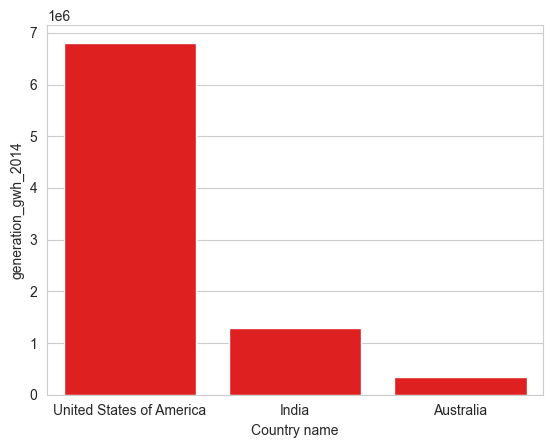

In [59]:

sns.barplot(x='country_long',y='generation_gwh_2014',data=est_gen_2014,color='red')
plt.xlabel('Country name')

In [60]:
est_gen_2015 = GPdf.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(10)
est_gen_2015

generation_gwh_2015
country_long                                 
United States of America         6.531108e+06
India                            1.325545e+06
Australia                        3.455780e+05

Text(0.5, 0, 'Country name')

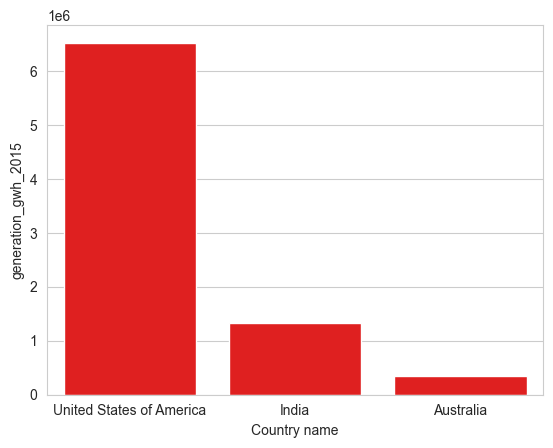

In [61]:
sns.barplot(x='country_long',y='generation_gwh_2015',data=est_gen_2015,color='red')
plt.xlabel('Country name')

In [62]:
est_gen_2016 = GPdf.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(10)
est_gen_2016

generation_gwh_2016
country_long                                 
United States of America         5.801736e+06
India                            1.340331e+06
Australia                        3.285428e+05

Text(0.5, 0, 'Country name')

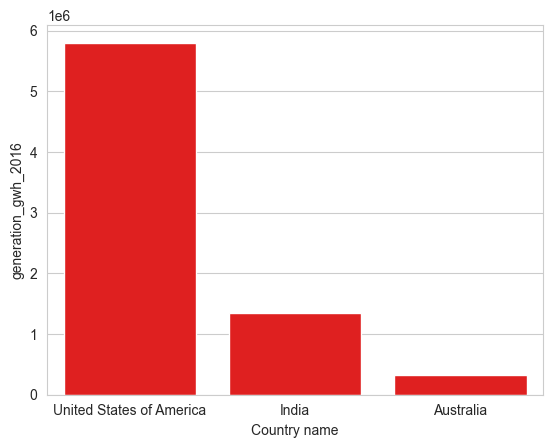

In [63]:
sns.barplot(x='country_long',y='generation_gwh_2016',data=est_gen_2016,color='red')
plt.xlabel('Country name')

In [64]:
est_gen_2017 = GPdf.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False)
est_gen_2017

generation_gwh_2017
country_long                                 
United States of America         5.376114e+06
India                            1.374430e+06
Australia                        3.302750e+05

Text(0.5, 0, 'Country name')

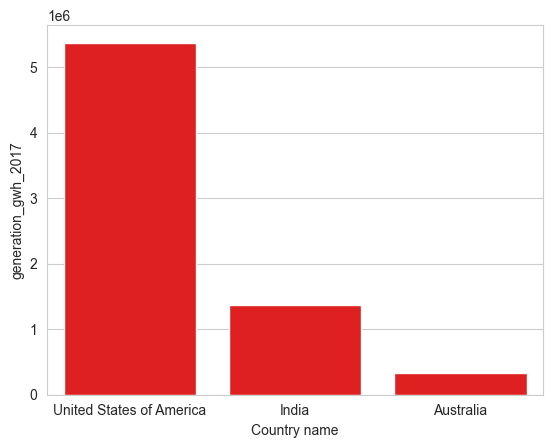

In [65]:
sns.barplot(x='country_long',y='generation_gwh_2017',data=est_gen_2017,color='red')
plt.xlabel('Country name')

In [66]:
est_gen_2018 = GPdf.groupby('country_long')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False)
est_gen_2018

generation_gwh_2018
country_long                                 
United States of America         5.100870e+06
India                            1.408881e+06
Australia                        3.211523e+05

Text(0.5, 0, 'Country name')

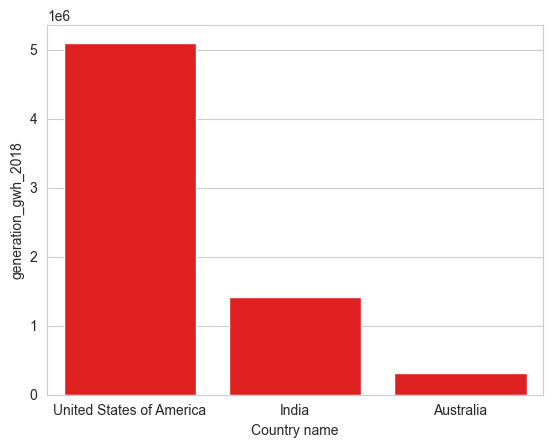

In [67]:
sns.barplot(x='country_long',y='generation_gwh_2018',data=est_gen_2018,color='red')
plt.xlabel('Country name')

In [68]:
est_gen_2019=GPdf.groupby('country_long')[['generation_gwh_2019']].sum().sort_values('generation_gwh_2019', ascending = False)
est_gen_2019

generation_gwh_2019
country_long                                 
United States of America         4.125294e+06
India                            3.102424e+02
Australia                        0.000000e+00

Text(0.5, 0, 'Country name')

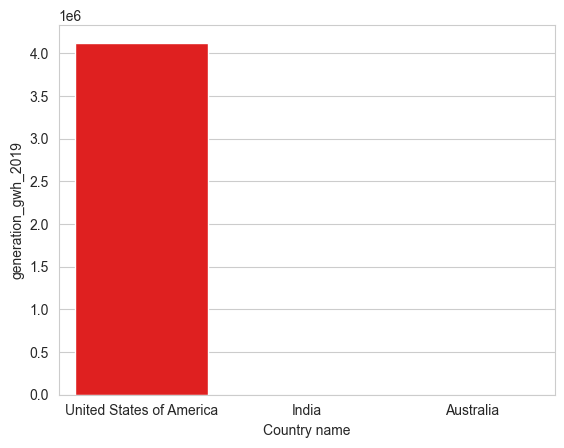

In [69]:
sns.barplot(x='country_long',y='generation_gwh_2019',data=est_gen_2019,color='red')
plt.xlabel('Country name')

In [ ]:
## Because of missing values in generation_gwh_2019 for Australia and India

In [87]:
#GPdf.drop('generation_gwh_2019',axis=1,inplace=True)

In [40]:
GPdf.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [41]:
category

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [42]:
GPdf.generation_gwh_2019.dtypes



dtype('float64')

In [ ]:
# now we have filled all the missing values in the feature  

<Axes: >

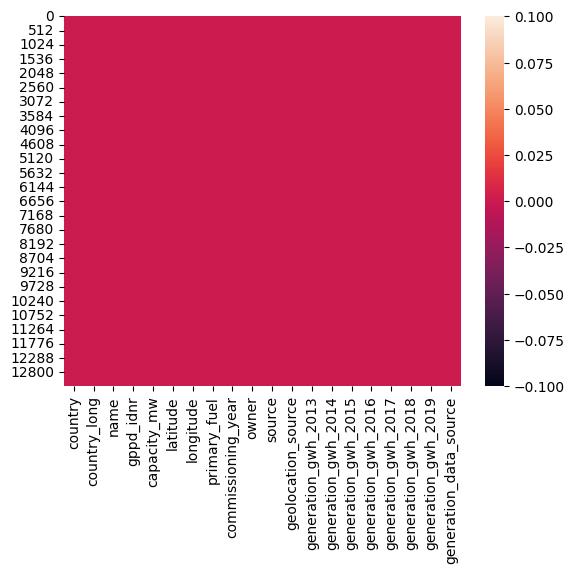

In [43]:
sns.heatmap(GPdf.isnull())

In [ ]:
# same color coding scheme indicates that now no missing values are present

In [46]:
# now we are coverting all the categorical feature into numeric feature using LabelEncoder
le=LabelEncoder()
for col in category:
    GPdf[col]=le.fit_transform(GPdf[col])

In [ ]:
# here we have checked the variance for year_of_capacity_data and it is zero so it is not useful for  predicting modelling so we need to drop thsi feature

In [87]:
#GPdf.drop('year_of_capacity_data',axis=1,inplace=True)

In [47]:
# finding correlation for each feature 
correlation=GPdf.corr()


In [48]:
round(GPdf.corr()['capacity_mw'].sort_values(ascending=False),2)

capacity_mw               1.00
generation_gwh_2018       0.81
generation_gwh_2017       0.80
generation_gwh_2016       0.79
generation_gwh_2015       0.79
generation_gwh_2014       0.77
generation_gwh_2013       0.64
generation_gwh_2019       0.34
longitude                 0.13
geolocation_source        0.07
name                     -0.00
owner                    -0.02
commissioning_year       -0.07
latitude                 -0.08
country                  -0.10
country_long             -0.10
source                   -0.15
generation_data_source   -0.15
gppd_idnr                -0.28
primary_fuel             -0.36
Name: capacity_mw, dtype: float64

<Axes: >

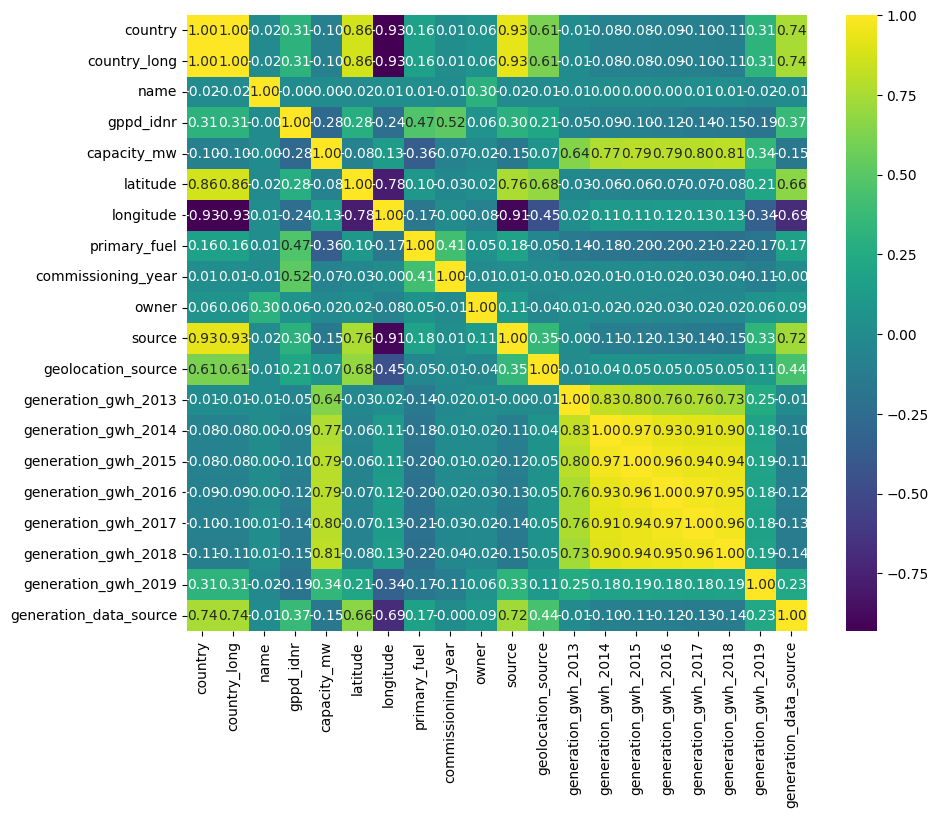

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [50]:
# dropping the column country and country long feature 
GPdf.drop(['country','country_long'],axis=1,inplace=True)

In [544]:
#GPdf.drop('longitude',axis=1,inplace=True)

In [51]:
correlation=GPdf.corr()

<Axes: >

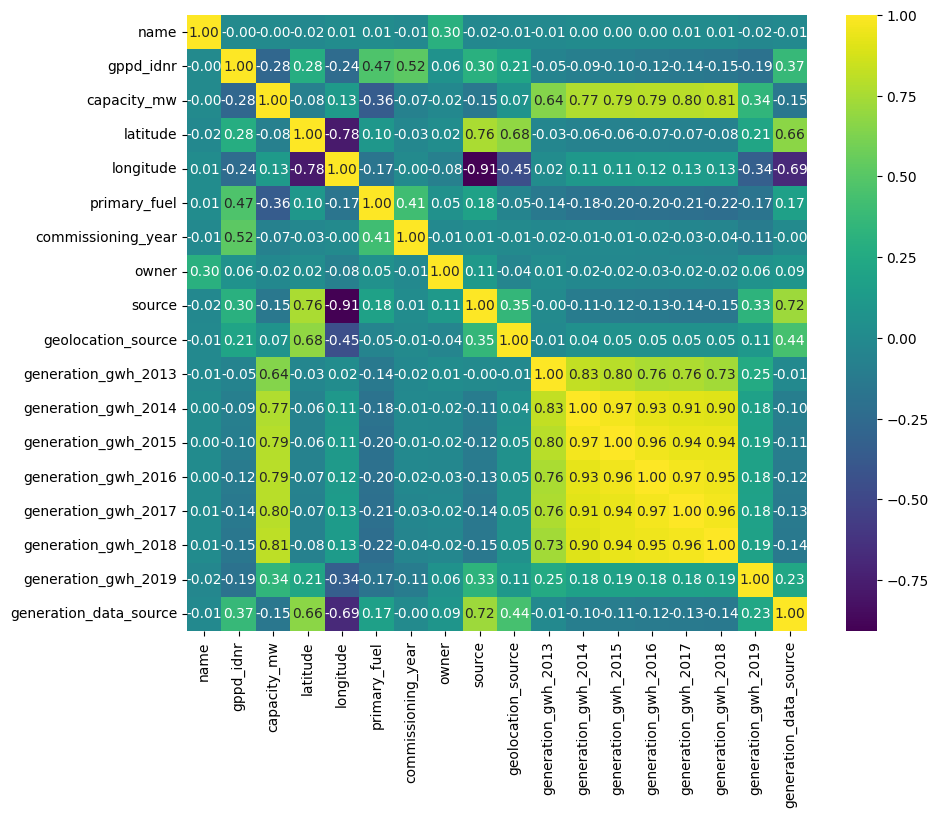

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [53]:
GPdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    13298 non-null  int32  
 1   gppd_idnr               13298 non-null  int32  
 2   capacity_mw             13298 non-null  float64
 3   latitude                13298 non-null  float64
 4   longitude               13298 non-null  float64
 5   primary_fuel            13298 non-null  int32  
 6   commissioning_year      13298 non-null  float64
 7   owner                   13298 non-null  int32  
 8   source                  13298 non-null  int32  
 9   geolocation_source      13298 non-null  int32  
 10  generation_gwh_2013     13298 non-null  float64
 11  generation_gwh_2014     13298 non-null  float64
 12  generation_gwh_2015     13298 non-null  float64
 13  generation_gwh_2016     13298 non-null  float64
 14  generation_gwh_2017     13298 non-null

In [177]:
# checking for the skewness of the data present in the feature  


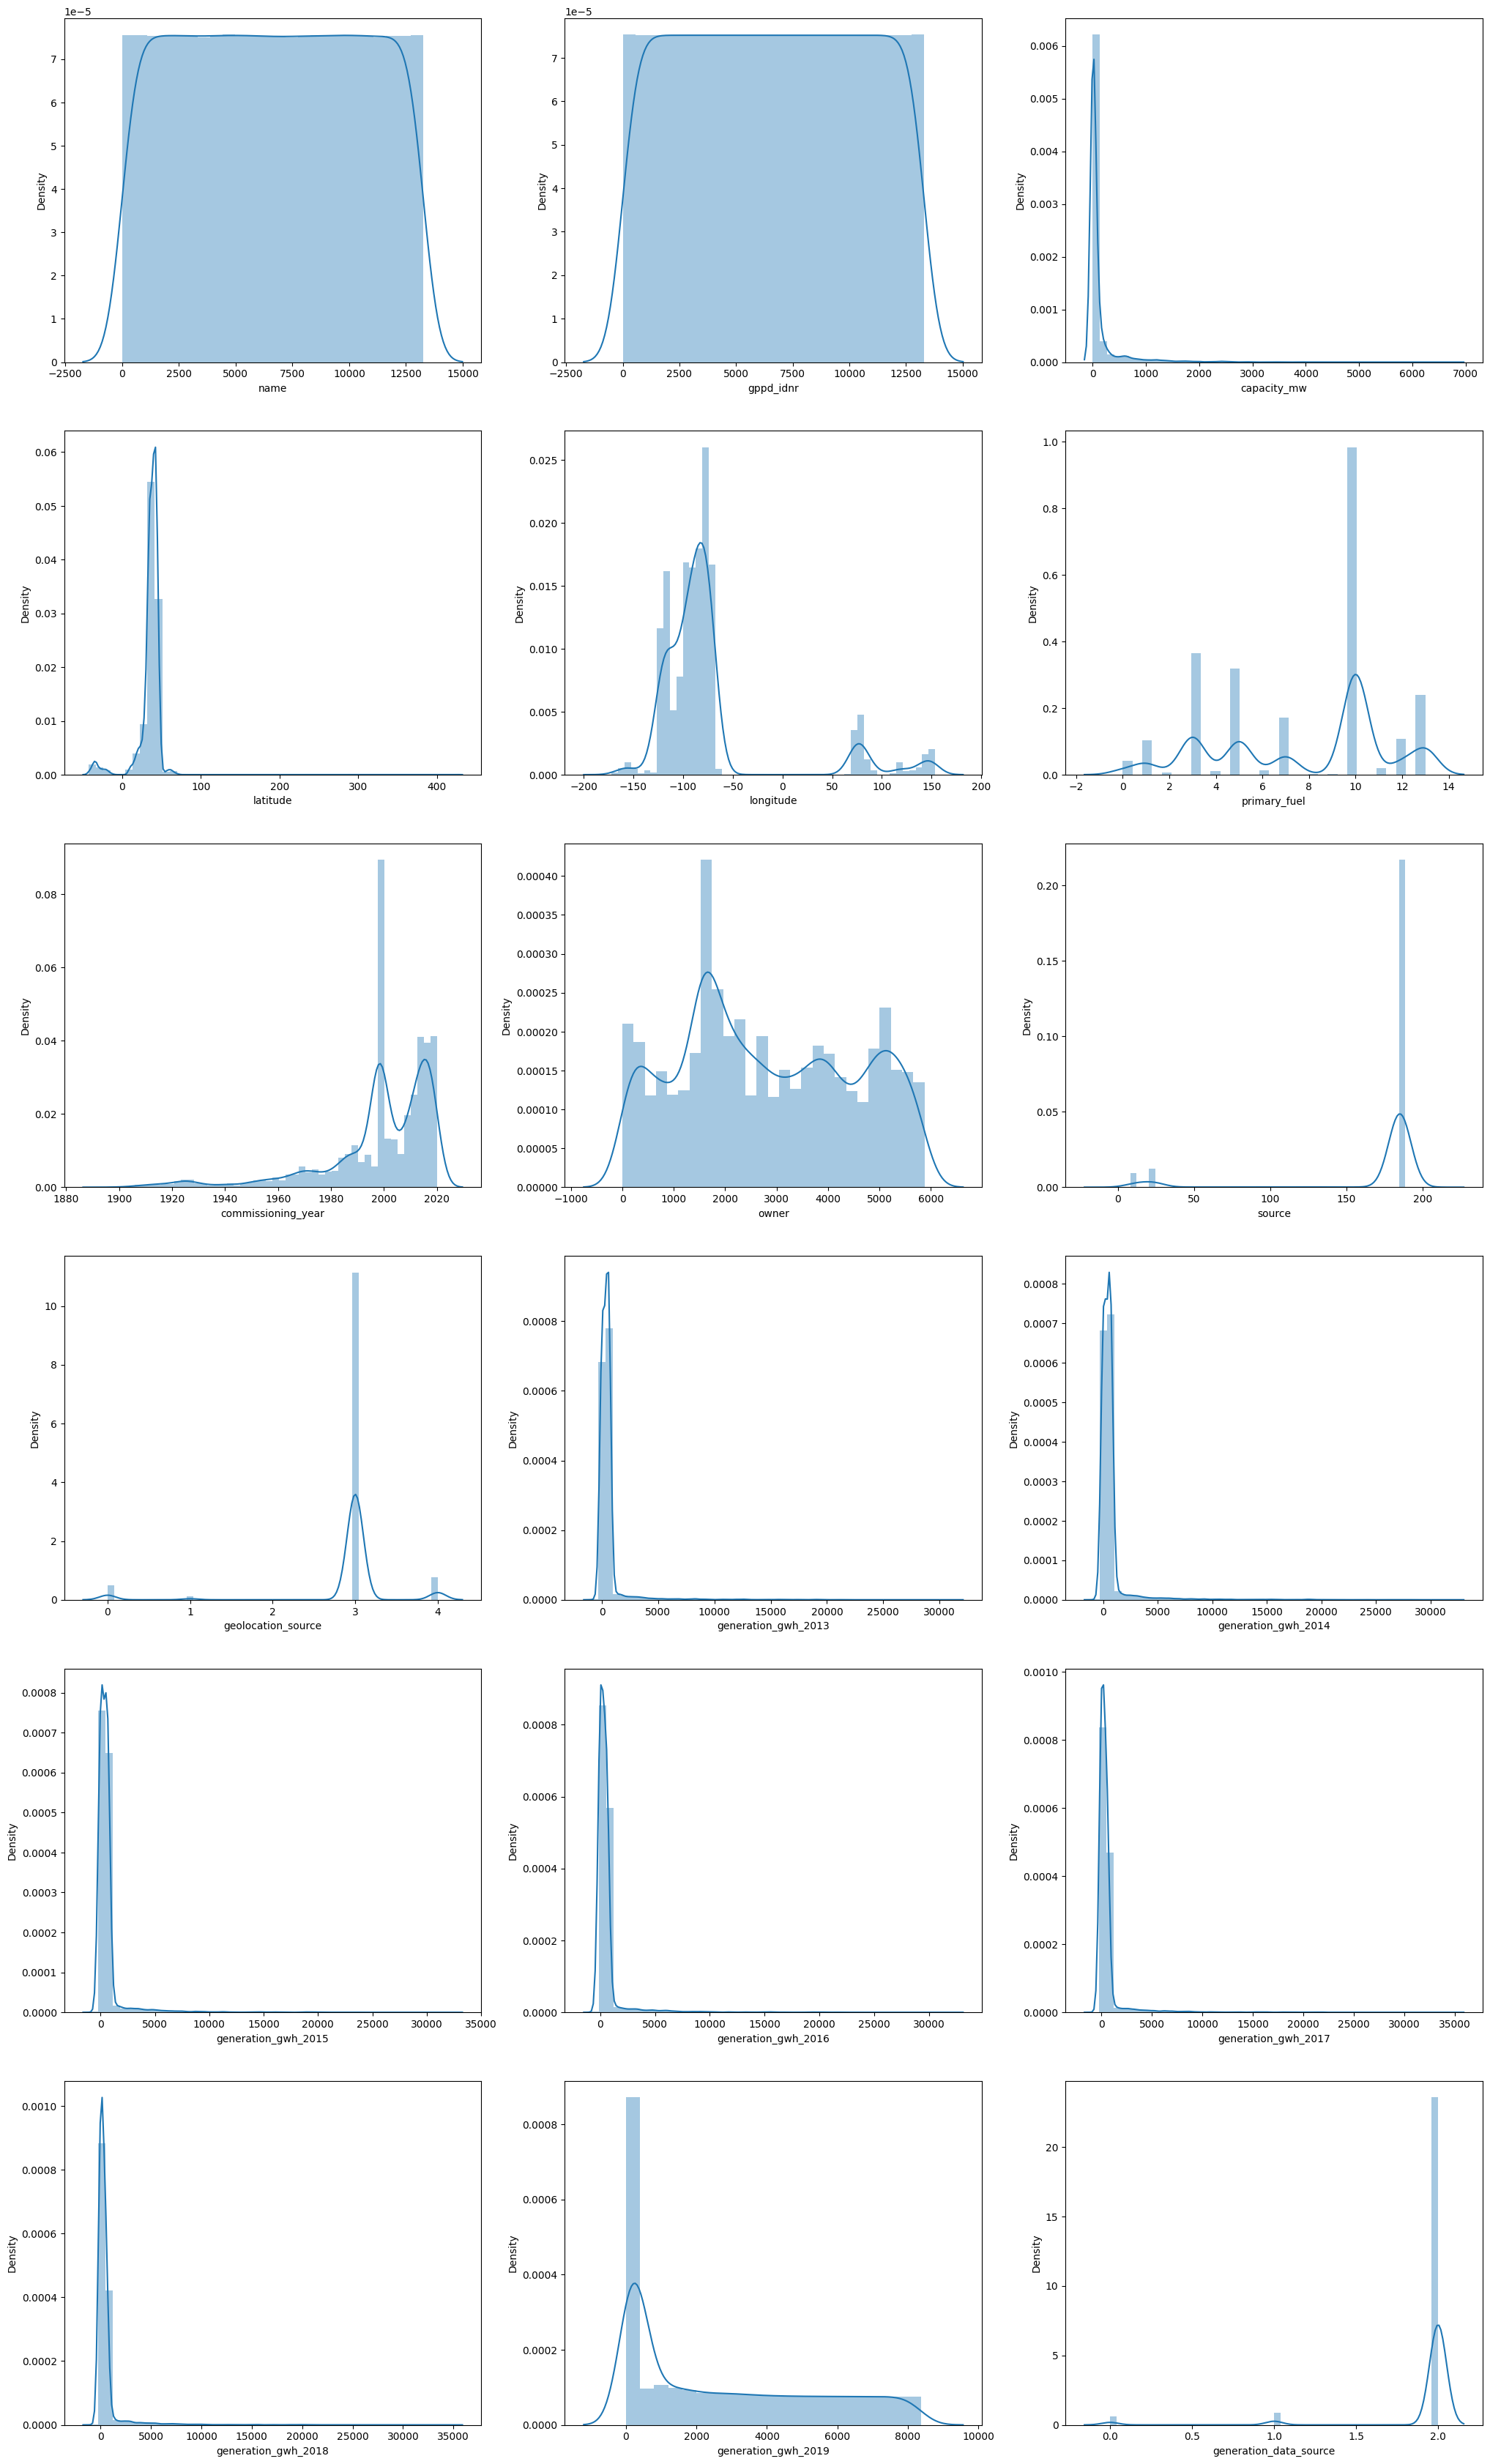

In [54]:
plt.figure(figsize=(25,50))
count=1
for i in GPdf.columns:
    if count<=18:
        ax=plt.subplot(7,3,count)
        sns.distplot(GPdf[i])
        count+=1
plt.show()


In [100]:
#del numerical[4]

In [549]:
#del numerical[2]

In [55]:
numerical

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

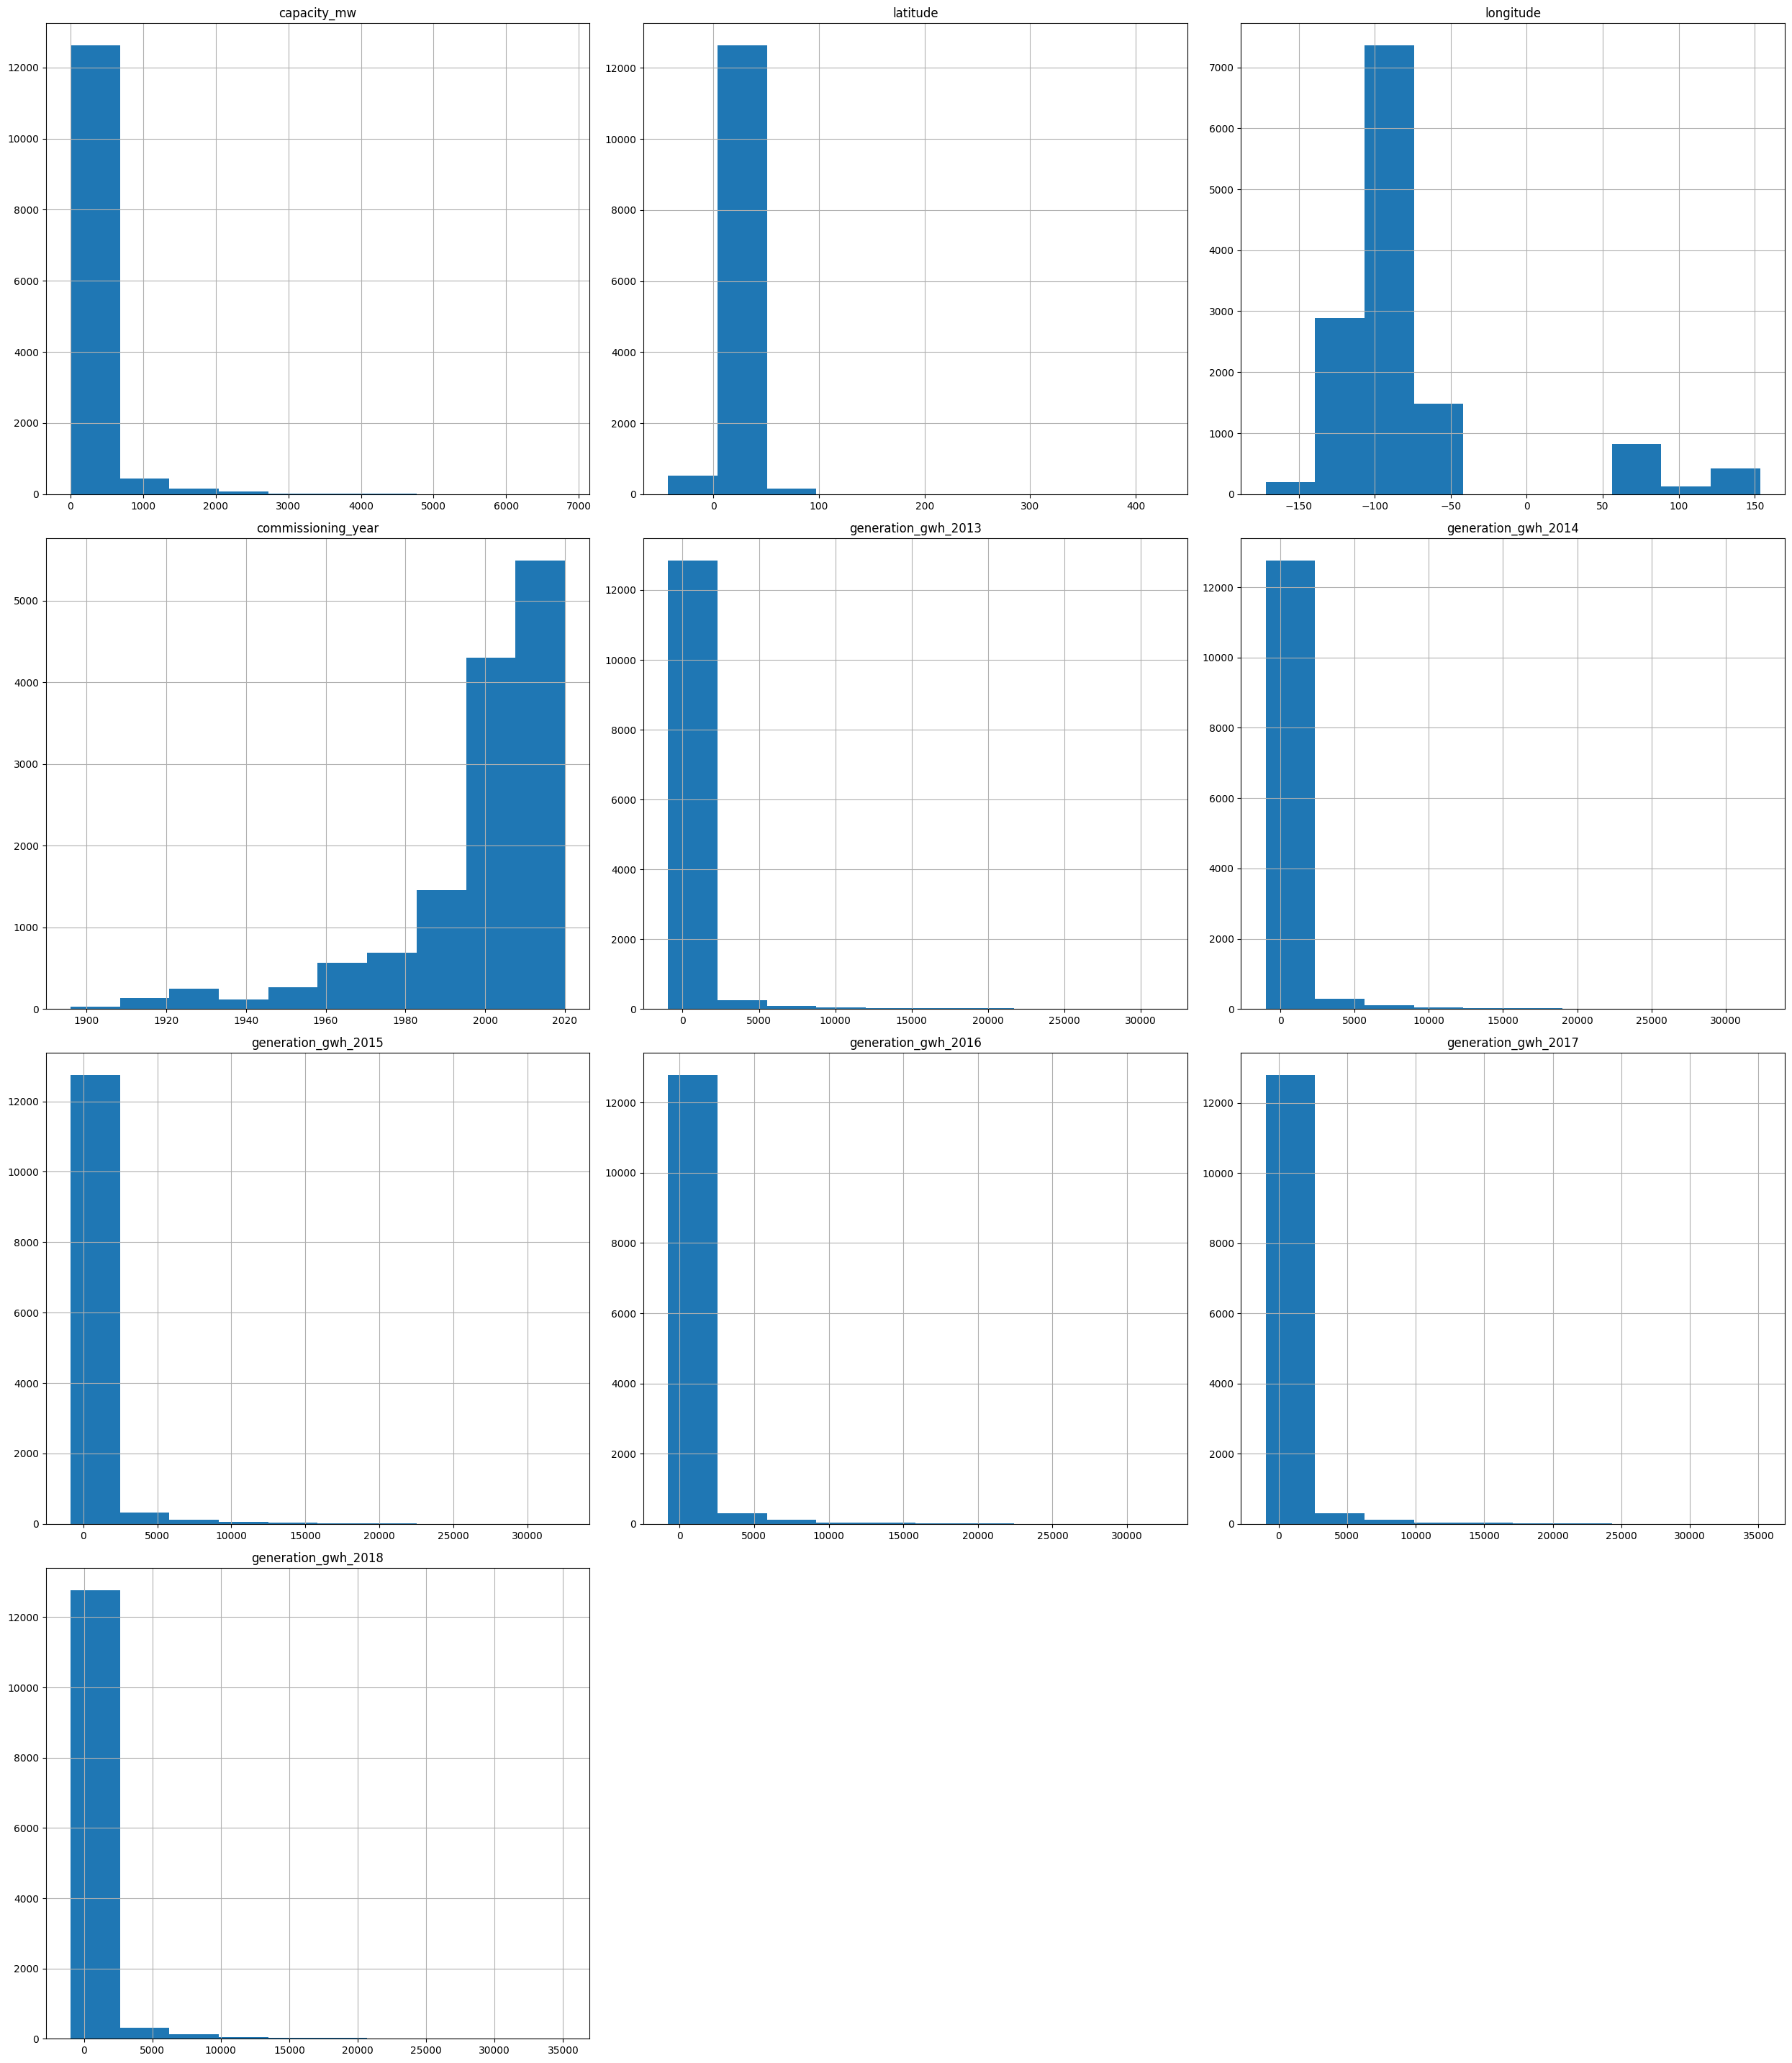

In [56]:
plt.figure(figsize=(25,50))
count=1
for i in numerical:
    if count<=10:
        ax=plt.subplot(7,3,count)
        GPdf[i].hist(ax=ax)
        ax.set_title(i)
        count+=1
plt.tight_layout()                     
plt.show()


<Axes: xlabel='generation_gwh_2013', ylabel='capacity_mw'>

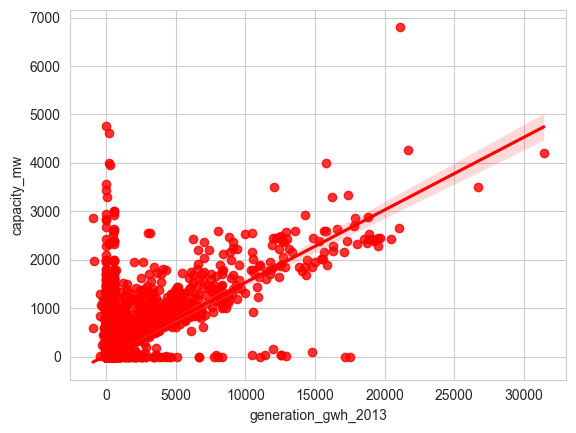

In [57]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2013',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2014', ylabel='capacity_mw'>

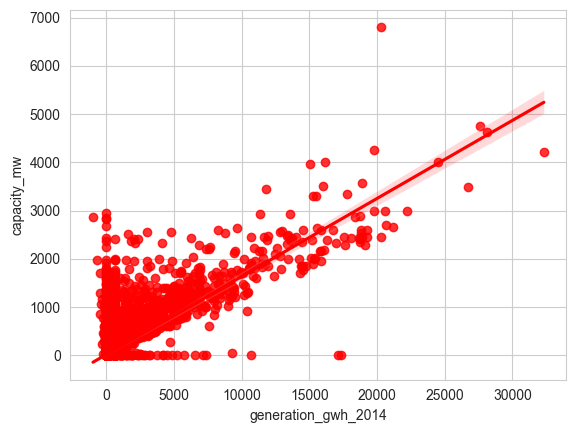

In [58]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2014',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2015', ylabel='capacity_mw'>

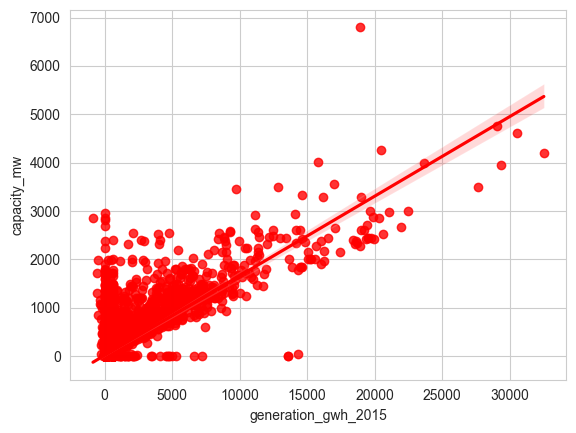

In [59]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2015',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2016', ylabel='capacity_mw'>

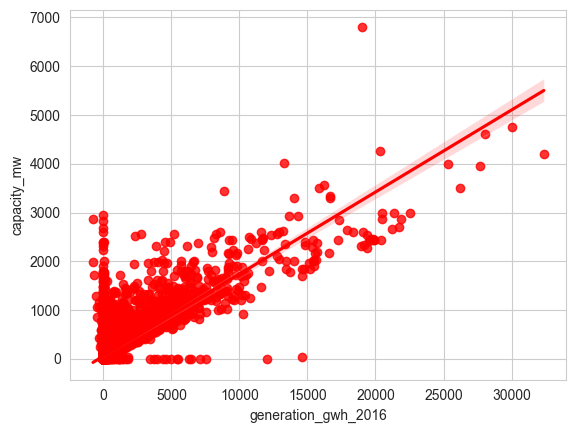

In [106]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2016',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

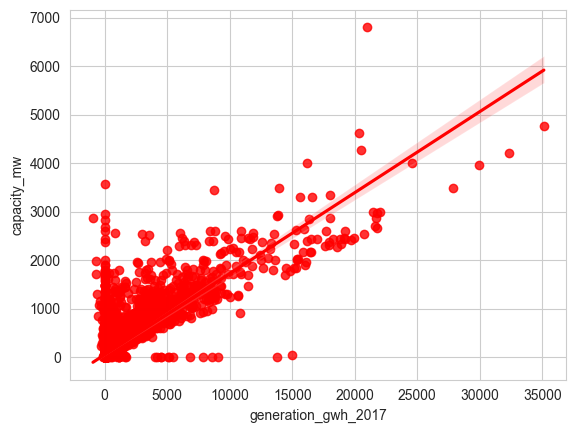

In [107]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2017',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2018', ylabel='capacity_mw'>

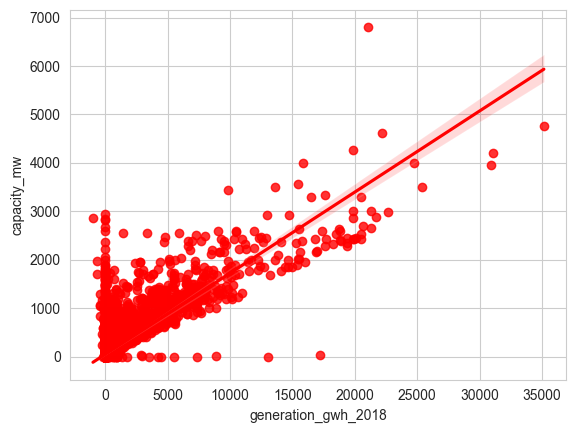

In [108]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2018',y='capacity_mw',data=GPdf,color='red')

<Axes: xlabel='generation_gwh_2019', ylabel='capacity_mw'>

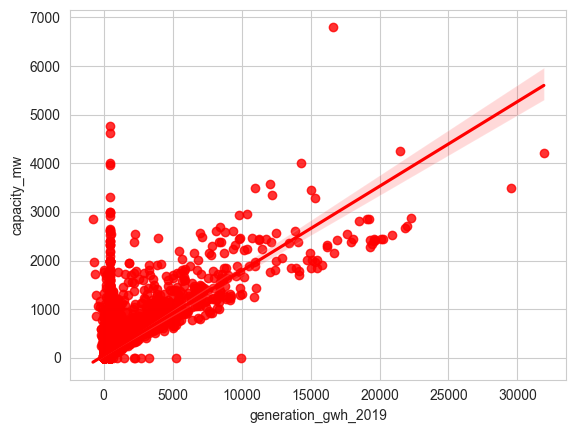

In [67]:
sns.set_style('whitegrid')
sns.regplot(x='generation_gwh_2019',y='capacity_mw',data=GPdf,color='red')

In [60]:
GPdf.primary_fuel

0        10
1         1
2        13
3         3
4         1
         ..
13293    13
13294    10
13295    10
13296    10
13297     3
Name: primary_fuel, Length: 13298, dtype: int32

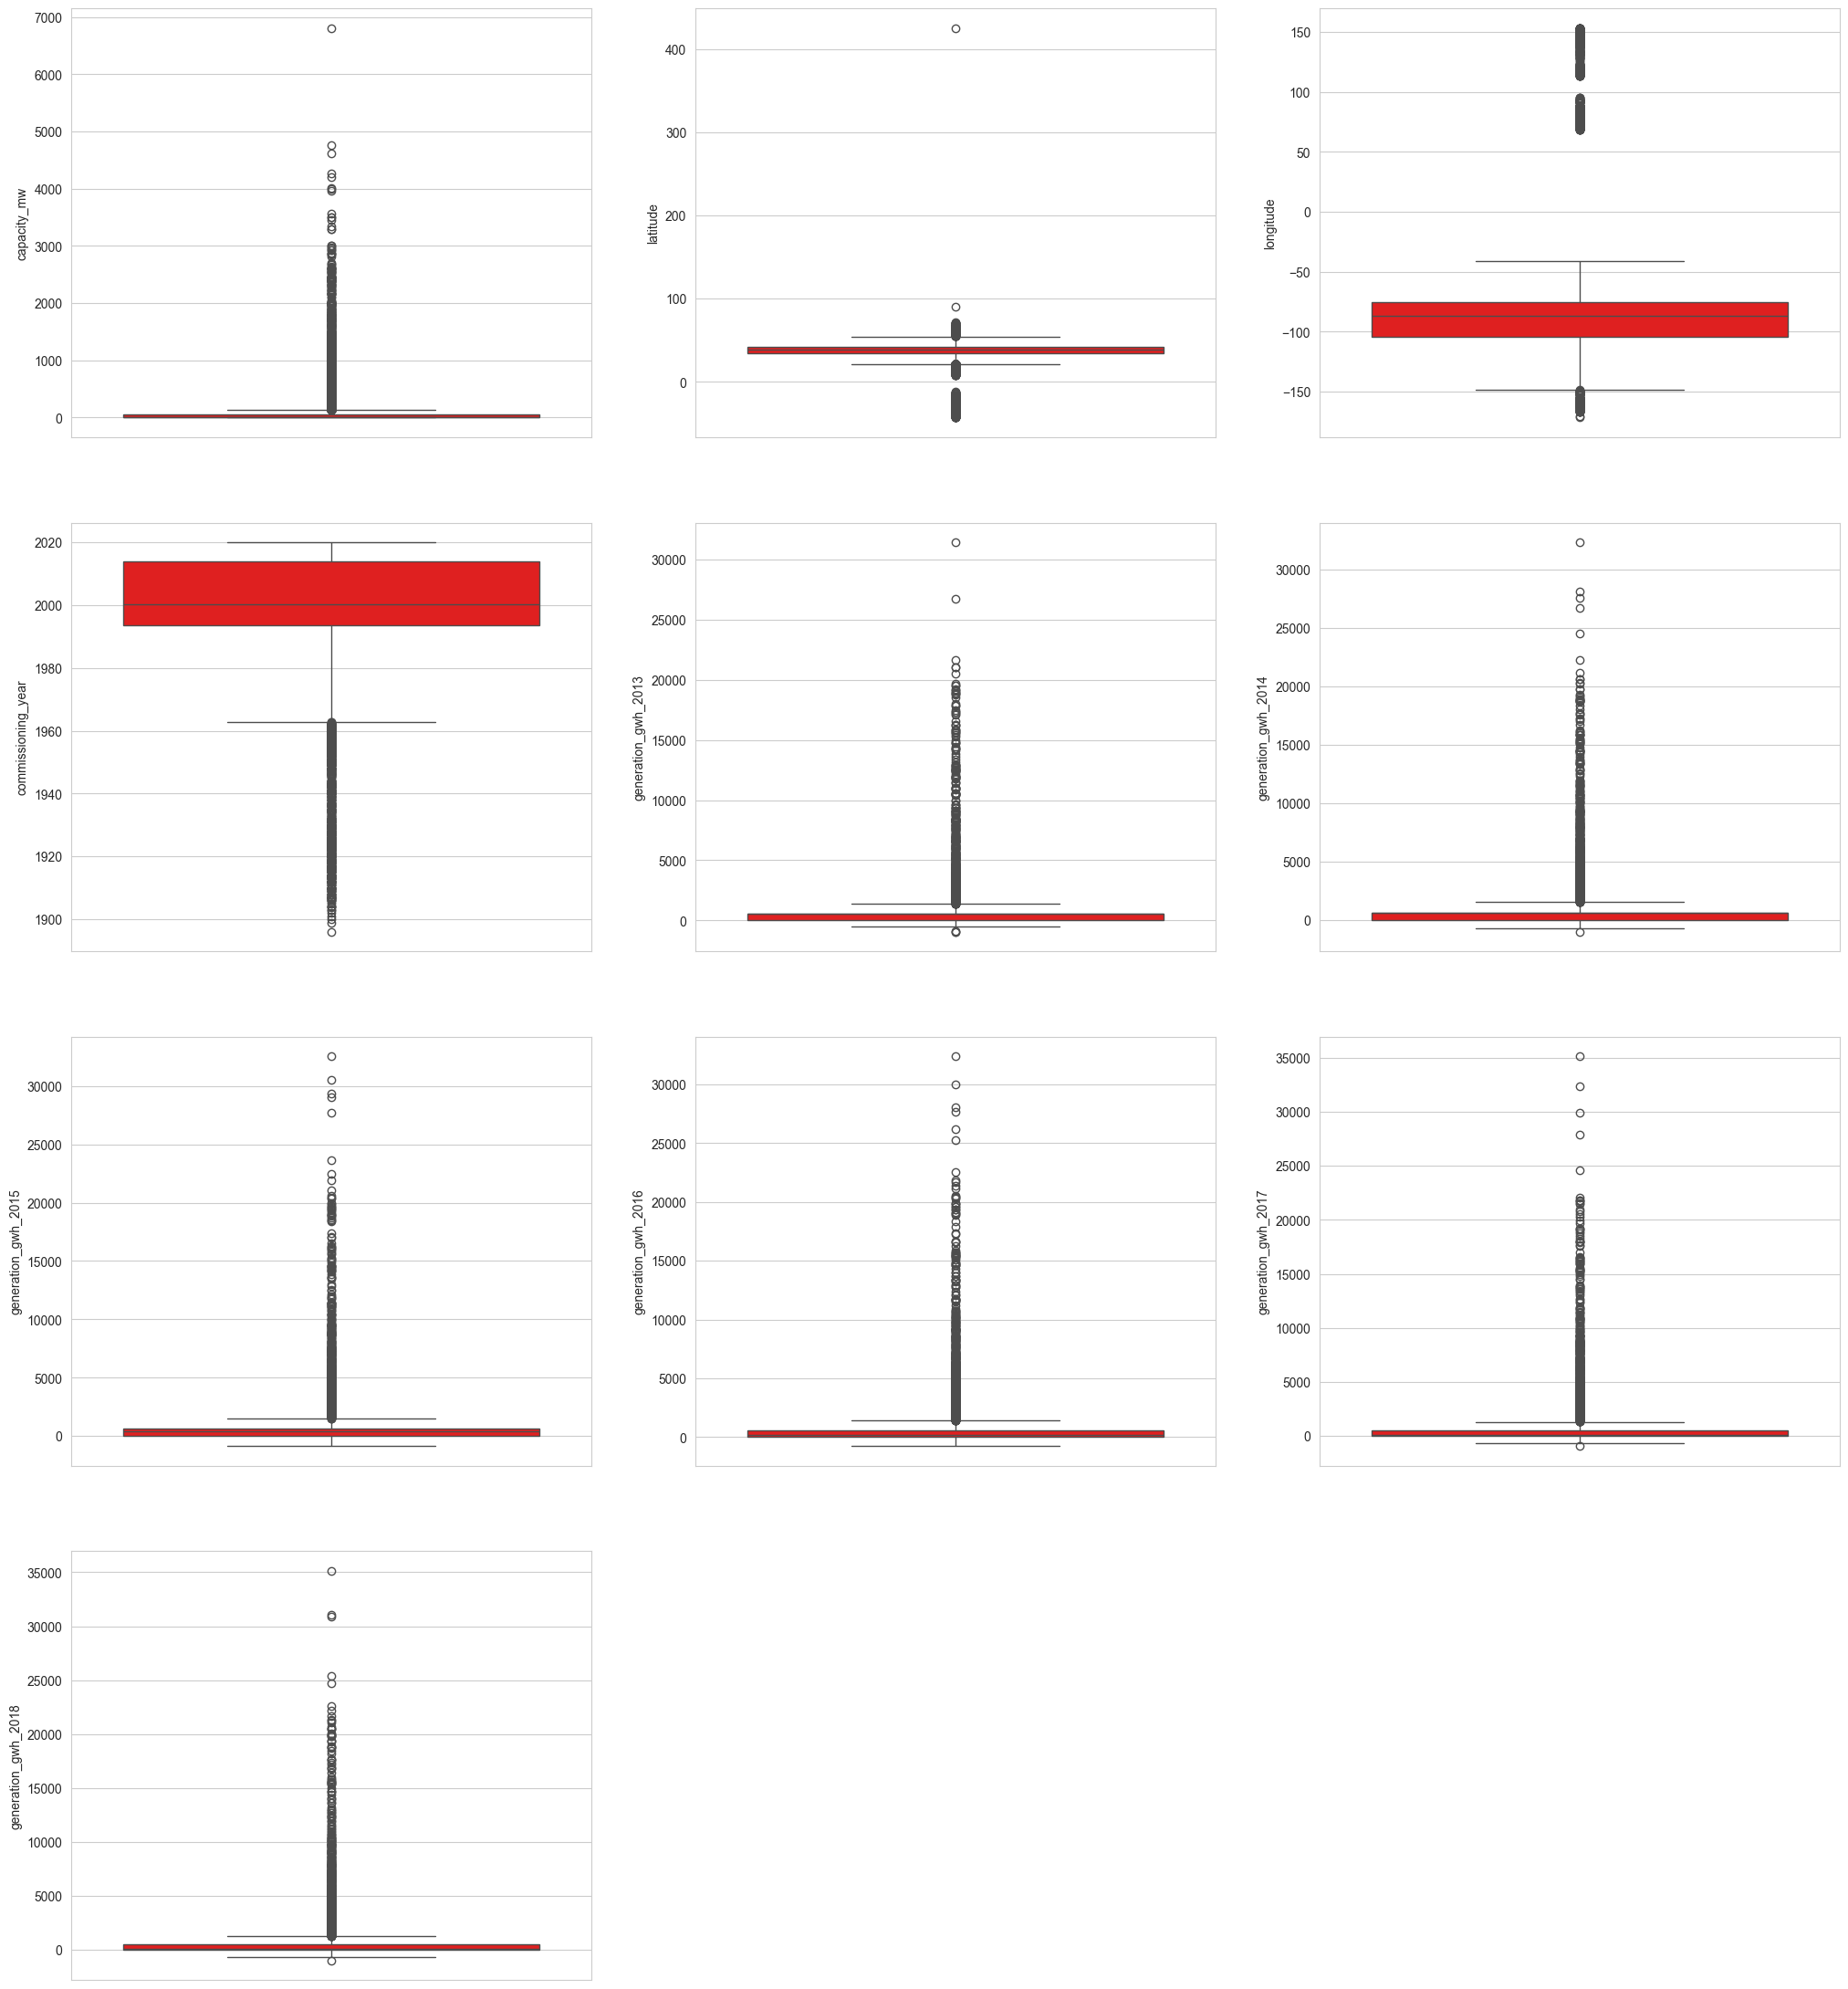

In [61]:
# checking for outlier in the feature
plt.figure(figsize=(25,50),facecolor='white')
count=1
for i in numerical:
    if count<=21:
        ax=plt.subplot(7,3,count)
        sns.boxplot(GPdf[i],color='red')
        count+=1
plt.show()


In [ ]:
# Here we have seen  that outliers are present in almost all the features

In [555]:
                            #First Method of removing outliers 
from scipy.stats import zscore

z=np.abs(zscore(GPdf[['latitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([    4,     4,     4, ..., 13262, 13265, 13267], dtype=int64), array([4, 5, 8, ..., 1, 8, 1], dtype=int64))


In [ ]:
#z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
GPdf1 = GPdf[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", GPdf.shape)
print ("Shape of the dataframe after removing outliers: ", GPdf1.shape)
print ("Percentage of data loss post outlier removal: ", (GPdf.shape[0]-GPdf1.shape[0])/GPdf.shape[0]*100)

GPdf=GPdf1.copy() # reassigning the changed dataframe name to our original dataframe name

In [ ]:
# with Zscore we got a data loss of 10 percent so i will not use Zscore and i have used different apprach  

In [62]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(10,8))  
#for i in avdf.columns:
    Q1=GPdf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=GPdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    GPdf[[col]]=arb.fit_transform(GPdf[[col]])
    plt.boxplot(GPdf[col],col)


In [63]:
outlier_feature=numerical[1:]

21.53658750000001
54.54368749999999
-148.52110000000002
-31.353899999999975
1962.75
2044.75
-807.416082385771
1385.8628039696182
-921.8127214963454
1570.271202493909
-902.3509403299363
1528.2935672165604
-826.6761376624773
1394.860896104129
-786.12309851278
1323.6298308546334
-760.2972746894554
1278.0647911490923


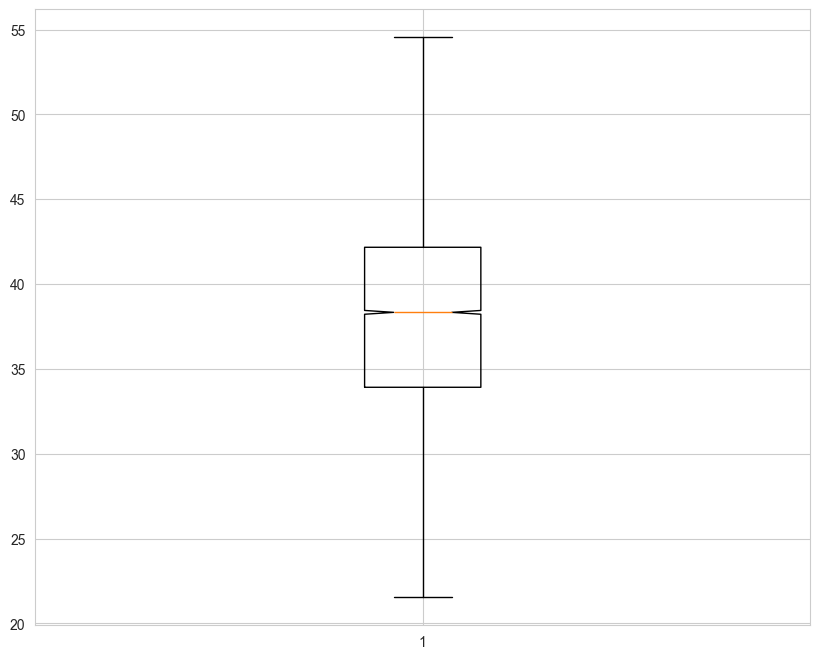

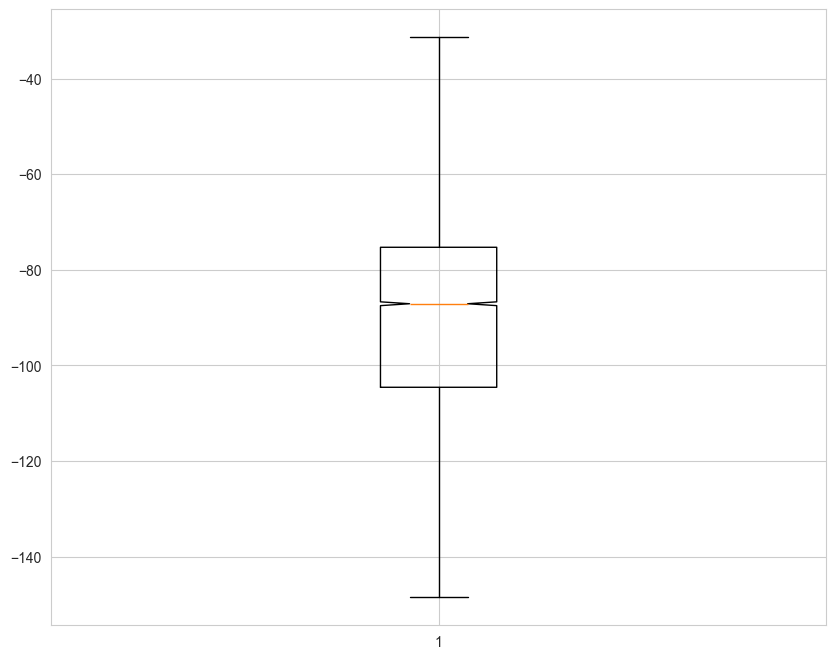

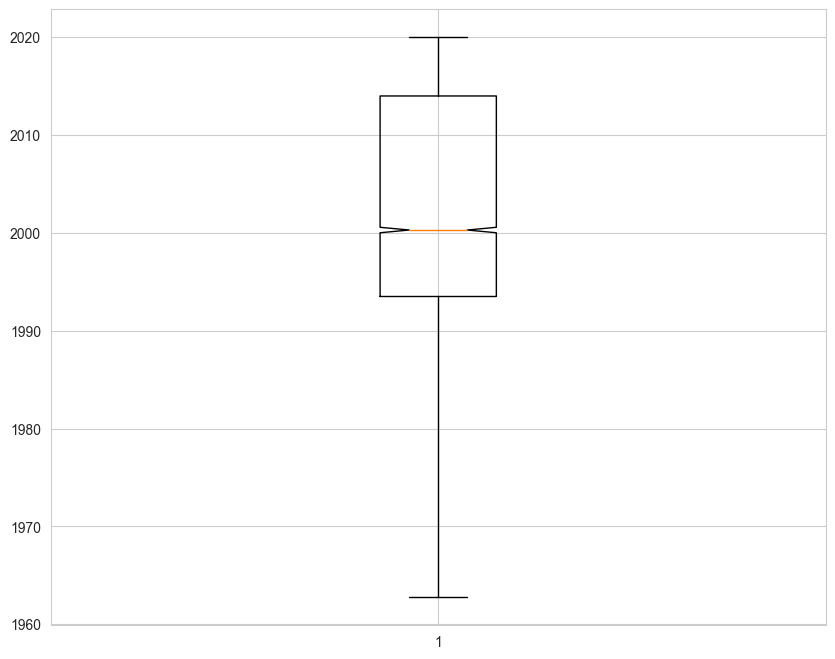

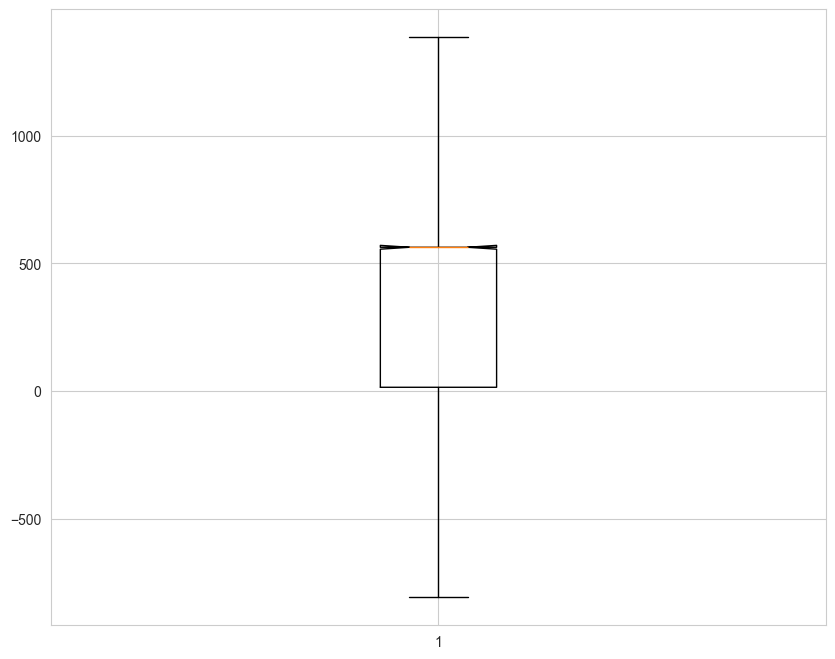

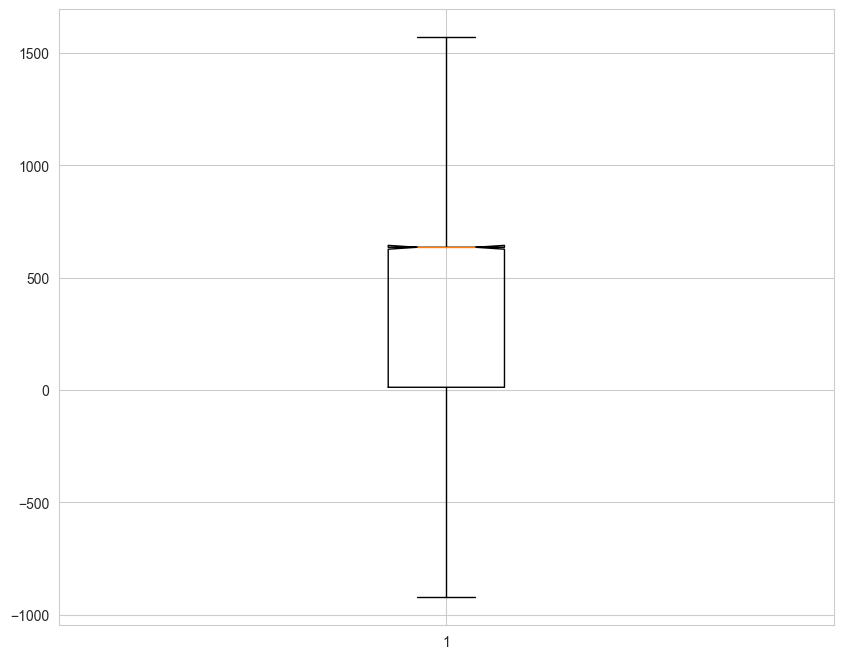

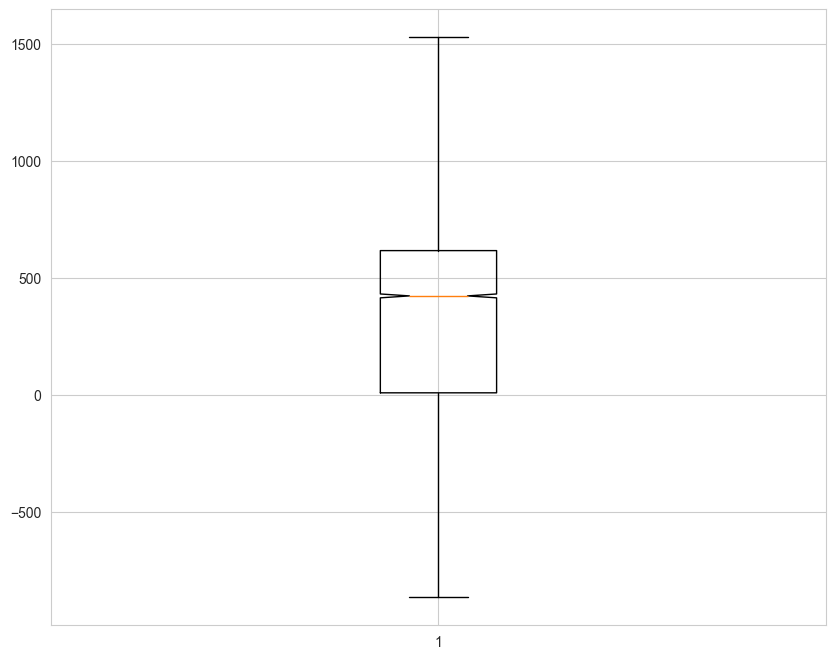

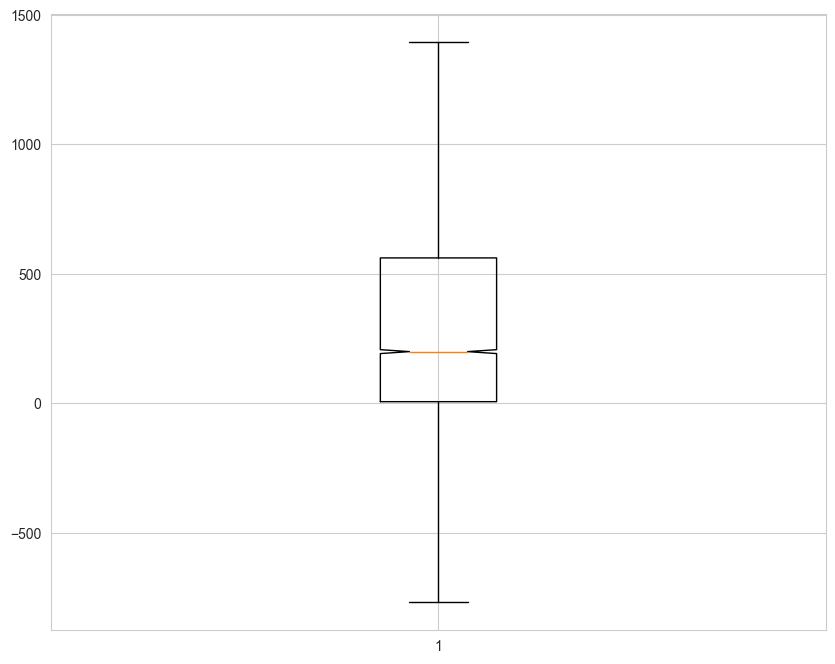

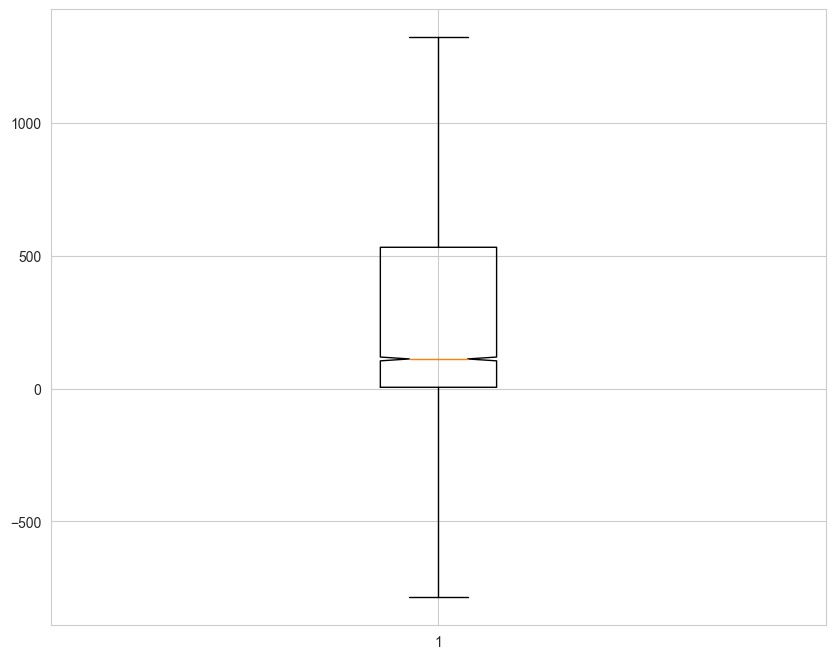

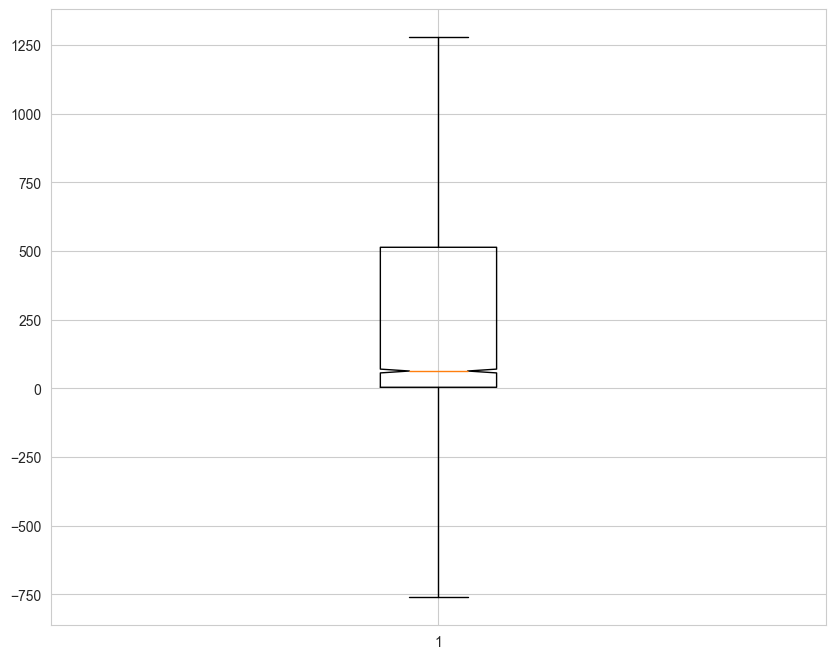

In [65]:
for col in outlier_feature:
    remove_outliers(col)

In [56]:
print ("Shape of the dataframe before removing outliers: ", GPdf.shape)

Shape of the dataframe before removing outliers:  (13298, 18)


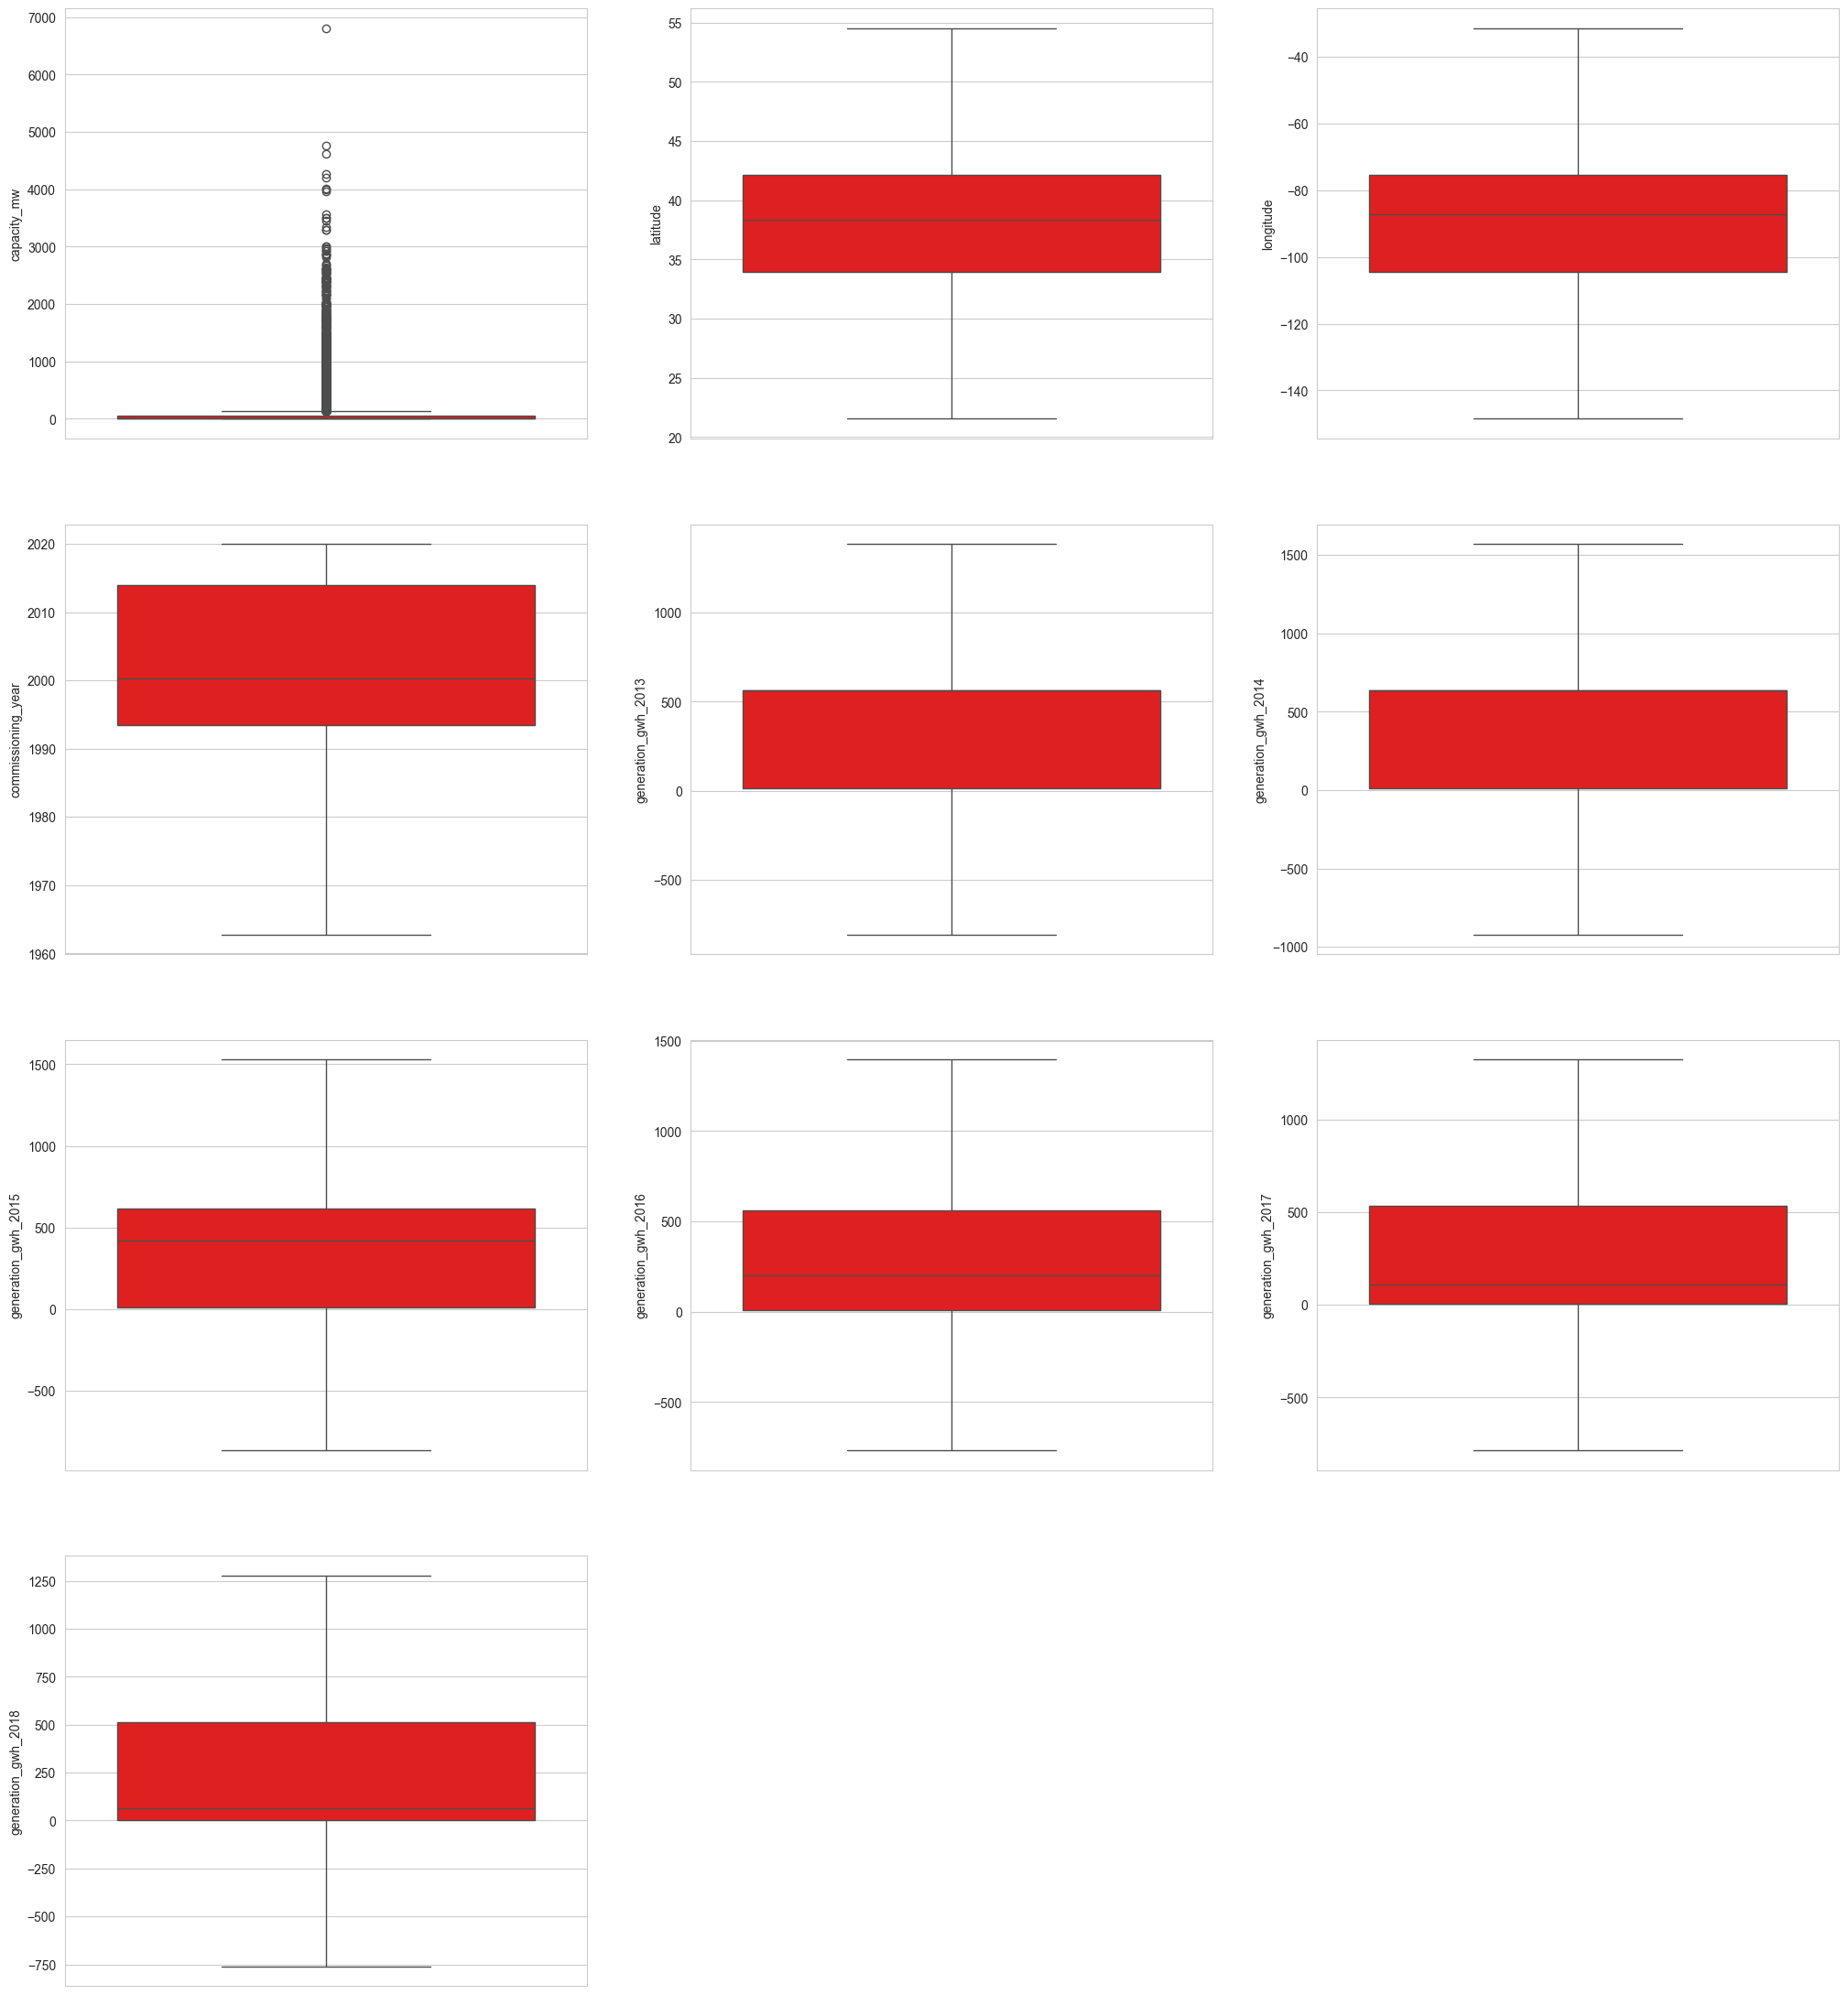

In [66]:
# checking for outlier in the feature
plt.figure(figsize=(25,50),facecolor='white')
count=1
for i in numerical:
    if count<=21:
        ax=plt.subplot(7,3,count)
        sns.boxplot(GPdf[i],color='red')
        count+=1
plt.show()


In [67]:
correlation=GPdf.corr()

<Axes: >

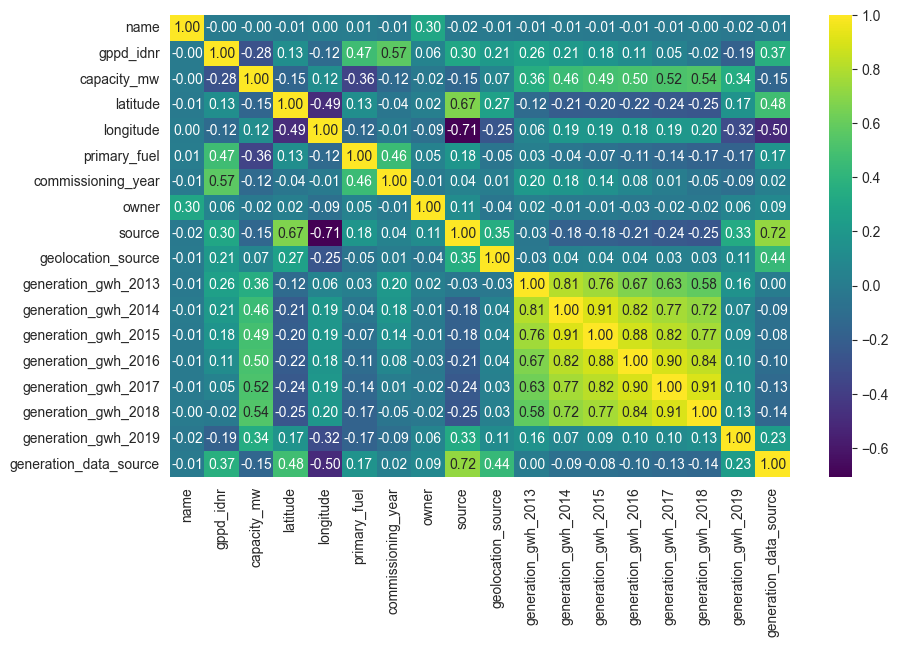

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

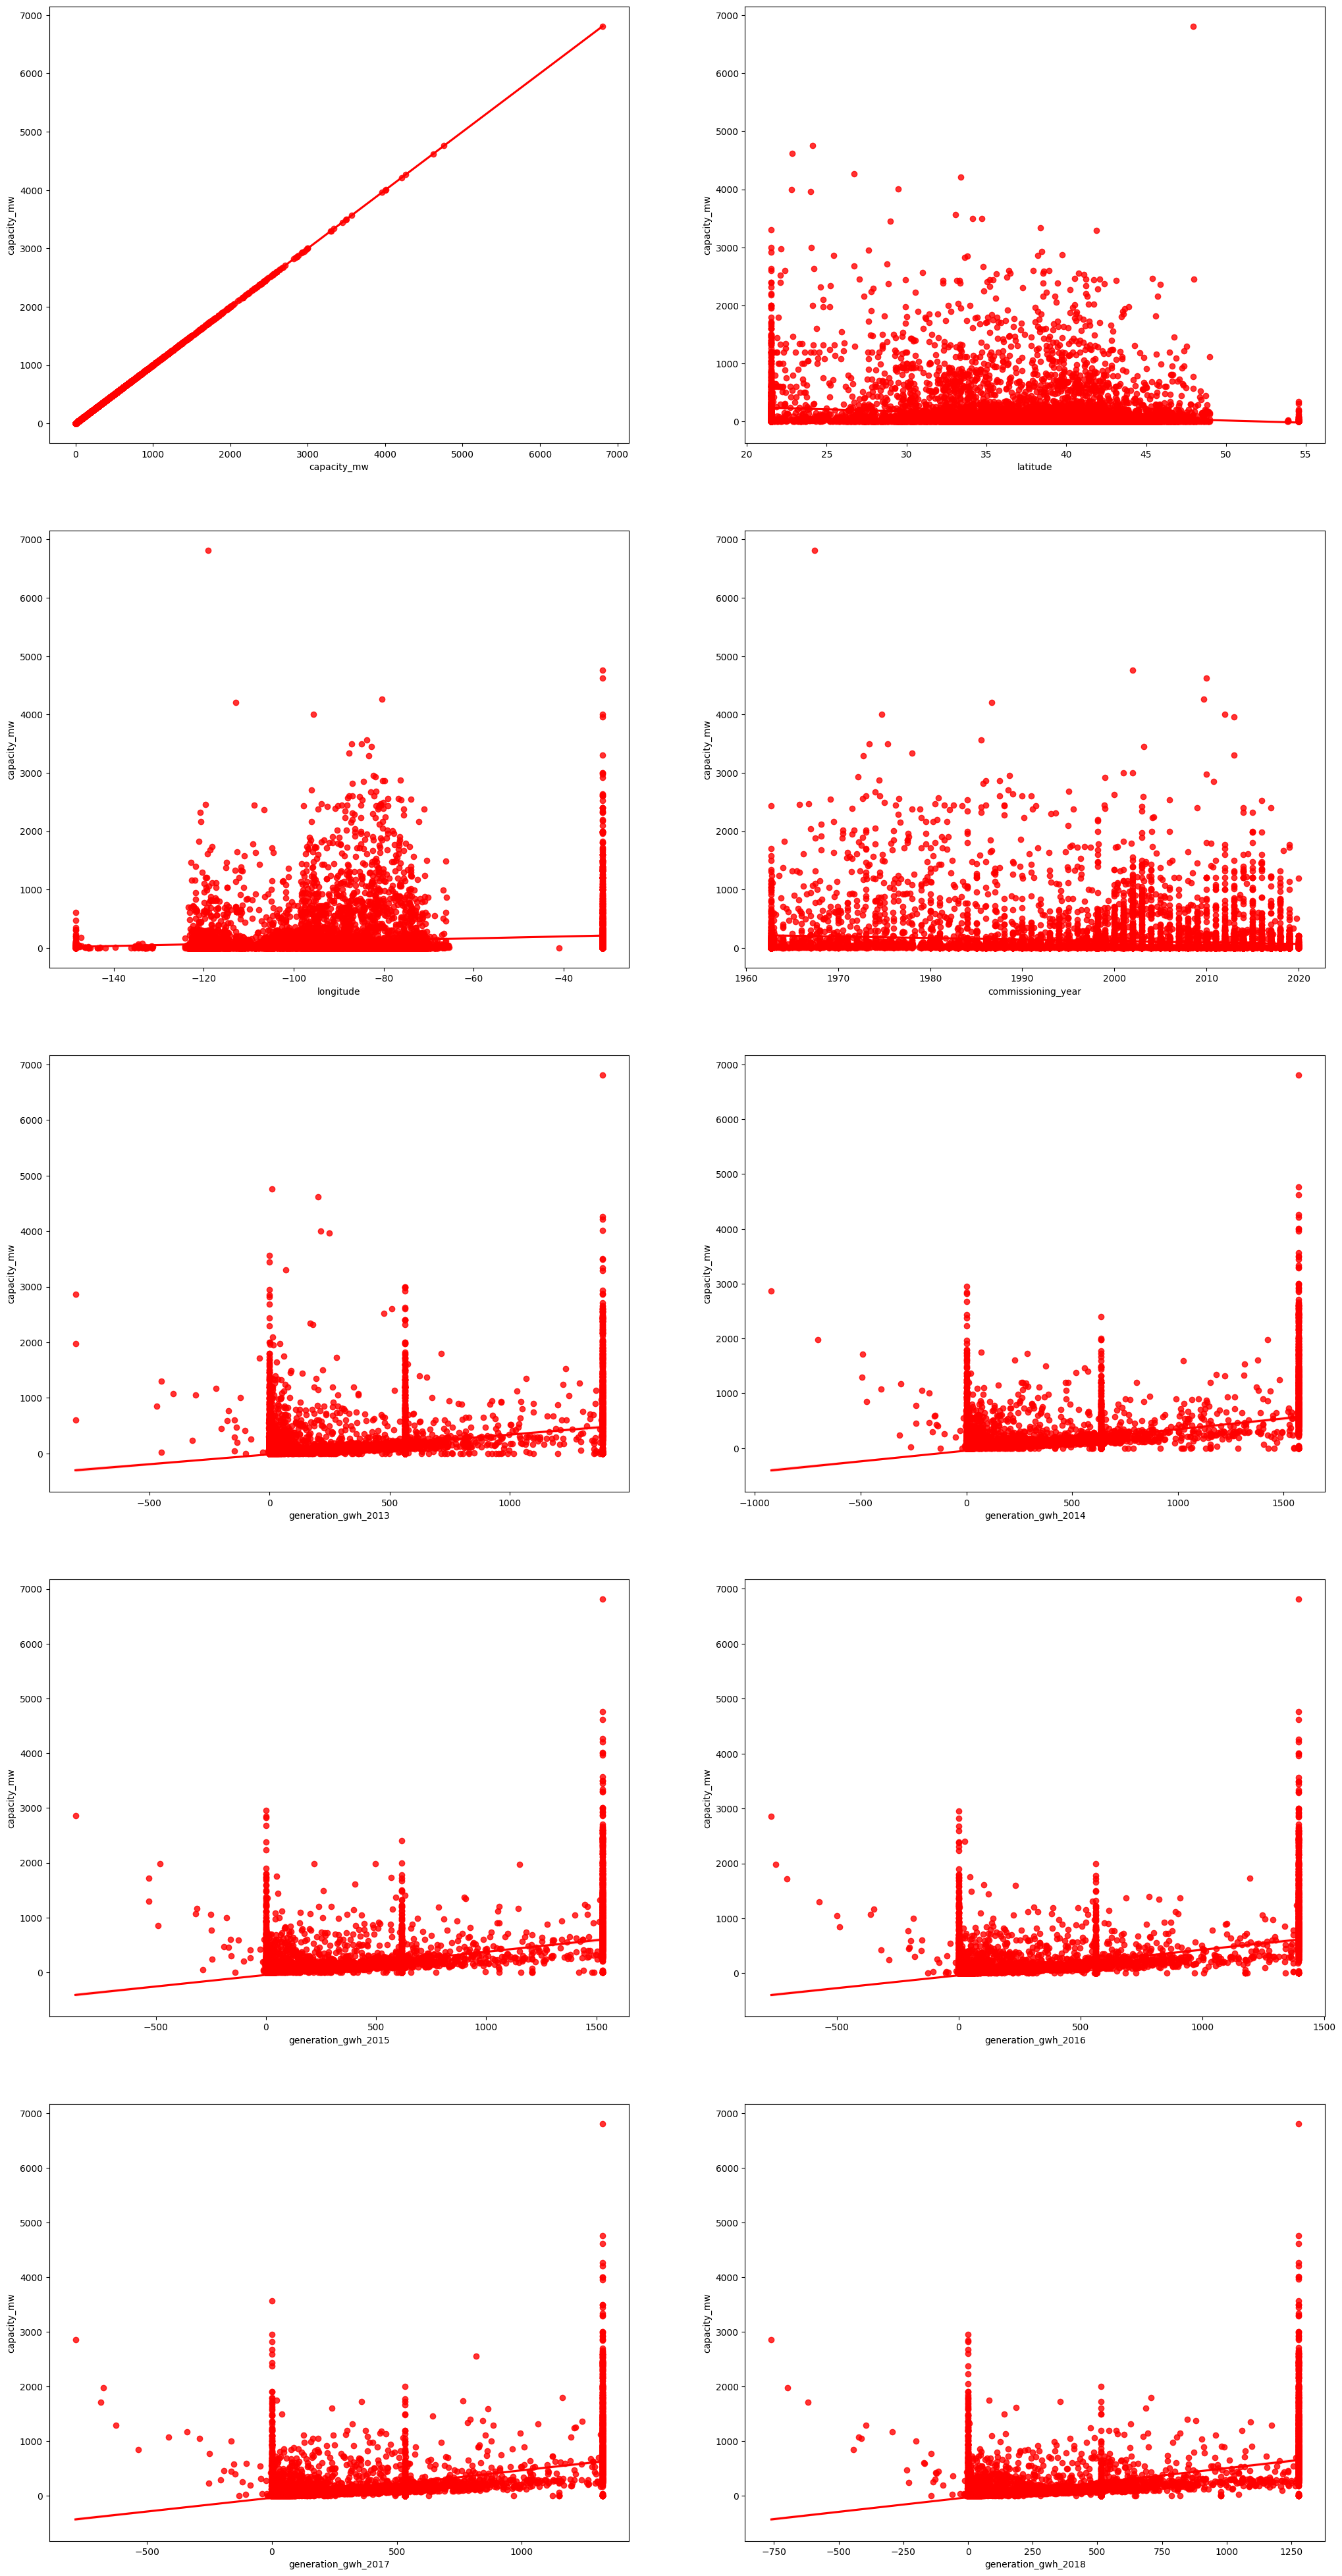

In [60]:
# After Removing outlier again visualising regplot () to check the relationship  between the feature capacity and other feature 
plt.figure(figsize=(25,50),facecolor='white')
count=1
for i in numerical:
    if count<=10:
        ax=plt.subplot(5,2,count)
        sns.regplot(x=GPdf[i],y=GPdf['capacity_mw'],color='red')
        count+=1
plt.show()


In [ ]:
# before checking skewness we are  dropping unneccessary feature that will not useful for the model for prediction 
#GPdf.drop(['country','country_long'],axis=1,inplace=True)

In [559]:
#GPdf.drop('latitude',axis=1,inplace=True)

In [61]:
category

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [101]:
GPdf.skew()

name                      0.000218
gppd_idnr                 0.000000
capacity_mw               5.474681
latitude                 -0.669648
longitude                 0.517295
primary_fuel             -0.419215
commissioning_year       -0.905462
owner                     0.146380
source                   -2.699669
geolocation_source       -3.293289
generation_gwh_2013       0.862610
generation_gwh_2014       0.953267
generation_gwh_2015       1.053976
generation_gwh_2016       1.168384
generation_gwh_2017       1.281769
generation_gwh_2018       1.396830
generation_gwh_2019       0.596595
generation_data_source   -4.533387
dtype: float64

In [241]:
# removing unuseful features name,gppd_idnr,url,owner
#GPdf.drop(['name','owner','url'],axis=1,inplace=True)

In [71]:
from sklearn.preprocessing import PowerTransformer
feature=['capacity_mw','latitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']

pt=PowerTransformer()
for col in feature:
    if abs(GPdf[col].skew())>0.5:
        GPdf.loc[:,col]=pt.fit_transform(GPdf.loc[:,col].values.reshape(-1,1))

In [62]:
##feature=['capacity_mw','latitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
#for col in feature:
  #  GPdf[col]=GPdf[col].apply(np.log1p)

In [72]:
GPdf.skew()

name                      0.000218
gppd_idnr                 0.000000
capacity_mw               0.145940
latitude                 -0.033786
longitude                 0.517295
primary_fuel             -0.419215
commissioning_year       -0.314837
owner                     0.146380
source                   -2.699669
geolocation_source       -3.293289
generation_gwh_2013       0.862610
generation_gwh_2014      -1.173671
generation_gwh_2015      -1.352620
generation_gwh_2016      -1.415634
generation_gwh_2017      -1.752231
generation_gwh_2018      -2.074136
generation_gwh_2019      -0.130368
generation_data_source   -4.533387
dtype: float64

In [ ]:
#droping again few useless features


In [369]:
#GPdf.drop('source',axis=1,inplace=True)

In [64]:
GPdf.generation_data_source.nunique()

3

In [467]:
#GPdf.drop('generation_data_source',axis=1,inplace=True)

In [73]:
GPdf.skew()

name                      0.000218
gppd_idnr                 0.000000
capacity_mw               0.145940
latitude                 -0.033786
longitude                 0.517295
primary_fuel             -0.419215
commissioning_year       -0.314837
owner                     0.146380
source                   -2.699669
geolocation_source       -3.293289
generation_gwh_2013       0.862610
generation_gwh_2014      -1.173671
generation_gwh_2015      -1.352620
generation_gwh_2016      -1.415634
generation_gwh_2017      -1.752231
generation_gwh_2018      -2.074136
generation_gwh_2019      -0.130368
generation_data_source   -4.533387
dtype: float64

# Considering  Capacity_mw as Target Variable splitting  the Dataset into x and y varible --x contain independent features and y contain Target feature 

In [ ]:
# Sepaating Independent feature and Target feature

In [74]:
x=GPdf.drop('capacity_mw',axis=1)

In [75]:
y=GPdf.loc[:,'capacity_mw']

In [83]:
x

name  gppd_idnr  latitude  longitude  primary_fuel  \
0     -1.711676   1.655074 -1.293056   2.186101      0.598148   
1     -1.710893   1.619125 -1.647411   2.186101     -1.858361   
2     -1.706193   1.706131 -1.904950   2.186101      1.416985   
3     -1.704104  -1.598546 -1.731752   2.186101     -1.312470   
4     -1.703060  -1.598285 -1.900208   2.186101     -1.858361   
...         ...        ...       ...        ...           ...   
13293  1.730607   0.106934  0.836736   0.406049      1.416985   
13294  1.730868   1.033526  1.098418  -0.206705      0.598148   
13295  1.731129   1.490439  1.047701  -0.210205      0.598148   
13296  1.731390  -1.379727  0.295796  -0.688522      0.598148   
13297  1.731651   0.489085  0.432657  -0.962891     -1.312470   

       commissioning_year     owner    source  geolocation_source  \
0                0.651684  1.168724 -1.077367           -1.400715   
1               -0.304888  1.555834  0.397953            1.621384   
2               -0.304888 -1.644990 -3.003480            1.621384   
3                0.094766 -0.736955 -2.962499            1.621384   
4                1.012041 -0.736955 -2.962499            1.621384   
...                   ...       ...       ...                 ...   
13293            0.738729  1.826452  0.336481            0.110335   
13294            1.304589  1.827647  0.336481            0.110335   
13295           -0.304888  1.827050  0.336481            0.110335   
13296           -0.304888  0.832393  0.336481            0.110335   
13297            0.898234 -1.342710  0.336481            0.110335   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.539433             0.590331             0.622834   
1                 0.539433             0.590331             0.622834   
2                 0.539433             0.590331             0.622834   
3                -1.072458             0.552383             1.084678   
4                 0.539433             2.374786             2.348679   
...                    ...                  ...                  ...   
13293            -1.068848            -1.048874            -0.988003   
13294             0.539433             0.590331             0.622834   
13295             0.539433             0.590331             0.622834   
13296            -1.079396            -1.064547            -1.004906   
13297            -1.042134            -0.852183            -0.716048   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.667957             0.709786             0.747471   
1                 0.667957             0.709786             0.747471   
2                 0.667957             0.709786             0.747471   
3                 1.370604             1.010813             1.008562   
4                 2.380007             2.382511             2.371207   
...                    ...                  ...                  ...   
13293            -0.898981            -0.837137            -0.769933   
13294             0.667957             0.709786            -0.780419   
13295             0.667957             0.709786             0.747471   
13296             0.667957             0.709786             0.747471   
13297            -0.598847            -0.520856            -0.457161   

       generation_gwh_2019  generation_data_source  
0                -1.208352                0.232644  
1                -1.208352                0.232644  
2                -1.208352                0.232644  
3                -1.208352               -2.637205  
4                -1.208352               -2.637205  
...                    ...                     ...  
13293            -0.465934                0.232644  
13294            -0.311172                0.232644  
13295            -1.208352                0.232644  
13296            -1.208352                0.232644  
13297             1.028494                0.232644  

[13298 rows x 17 columns]

In [85]:
y.shape

(13298,)

In [86]:
x

name  gppd_idnr  latitude  longitude  primary_fuel  \
0     -1.711676   1.655074 -1.293056   2.186101      0.598148   
1     -1.710893   1.619125 -1.647411   2.186101     -1.858361   
2     -1.706193   1.706131 -1.904950   2.186101      1.416985   
3     -1.704104  -1.598546 -1.731752   2.186101     -1.312470   
4     -1.703060  -1.598285 -1.900208   2.186101     -1.858361   
...         ...        ...       ...        ...           ...   
13293  1.730607   0.106934  0.836736   0.406049      1.416985   
13294  1.730868   1.033526  1.098418  -0.206705      0.598148   
13295  1.731129   1.490439  1.047701  -0.210205      0.598148   
13296  1.731390  -1.379727  0.295796  -0.688522      0.598148   
13297  1.731651   0.489085  0.432657  -0.962891     -1.312470   

       commissioning_year     owner    source  geolocation_source  \
0                0.651684  1.168724 -1.077367           -1.400715   
1               -0.304888  1.555834  0.397953            1.621384   
2               -0.304888 -1.644990 -3.003480            1.621384   
3                0.094766 -0.736955 -2.962499            1.621384   
4                1.012041 -0.736955 -2.962499            1.621384   
...                   ...       ...       ...                 ...   
13293            0.738729  1.826452  0.336481            0.110335   
13294            1.304589  1.827647  0.336481            0.110335   
13295           -0.304888  1.827050  0.336481            0.110335   
13296           -0.304888  0.832393  0.336481            0.110335   
13297            0.898234 -1.342710  0.336481            0.110335   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.539433             0.590331             0.622834   
1                 0.539433             0.590331             0.622834   
2                 0.539433             0.590331             0.622834   
3                -1.072458             0.552383             1.084678   
4                 0.539433             2.374786             2.348679   
...                    ...                  ...                  ...   
13293            -1.068848            -1.048874            -0.988003   
13294             0.539433             0.590331             0.622834   
13295             0.539433             0.590331             0.622834   
13296            -1.079396            -1.064547            -1.004906   
13297            -1.042134            -0.852183            -0.716048   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.667957             0.709786             0.747471   
1                 0.667957             0.709786             0.747471   
2                 0.667957             0.709786             0.747471   
3                 1.370604             1.010813             1.008562   
4                 2.380007             2.382511             2.371207   
...                    ...                  ...                  ...   
13293            -0.898981            -0.837137            -0.769933   
13294             0.667957             0.709786            -0.780419   
13295             0.667957             0.709786             0.747471   
13296             0.667957             0.709786             0.747471   
13297            -0.598847            -0.520856            -0.457161   

       generation_gwh_2019  generation_data_source  
0                -1.208352                0.232644  
1                -1.208352                0.232644  
2                -1.208352                0.232644  
3                -1.208352               -2.637205  
4                -1.208352               -2.637205  
...                    ...                     ...  
13293            -0.465934                0.232644  
13294            -0.311172                0.232644  
13295            -1.208352                0.232644  
13296            -1.208352                0.232644  
13297             1.028494                0.232644  

[13298 rows x 17 columns]

In [87]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x=pd.DataFrame(scaled.fit_transform(x),columns =x.columns)

In [88]:
GPdf.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [89]:
pd.DataFrame(x).isnull().sum()

name                      0
gppd_idnr                 0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [90]:
x

name  gppd_idnr  latitude  longitude  primary_fuel  \
0     -1.711676   1.655074 -1.293056   2.186101      0.598148   
1     -1.710893   1.619125 -1.647411   2.186101     -1.858361   
2     -1.706193   1.706131 -1.904950   2.186101      1.416985   
3     -1.704104  -1.598546 -1.731752   2.186101     -1.312470   
4     -1.703060  -1.598285 -1.900208   2.186101     -1.858361   
...         ...        ...       ...        ...           ...   
13293  1.730607   0.106934  0.836736   0.406049      1.416985   
13294  1.730868   1.033526  1.098418  -0.206705      0.598148   
13295  1.731129   1.490439  1.047701  -0.210205      0.598148   
13296  1.731390  -1.379727  0.295796  -0.688522      0.598148   
13297  1.731651   0.489085  0.432657  -0.962891     -1.312470   

       commissioning_year     owner    source  geolocation_source  \
0                0.651684  1.168724 -1.077367           -1.400715   
1               -0.304888  1.555834  0.397953            1.621384   
2               -0.304888 -1.644990 -3.003480            1.621384   
3                0.094766 -0.736955 -2.962499            1.621384   
4                1.012041 -0.736955 -2.962499            1.621384   
...                   ...       ...       ...                 ...   
13293            0.738729  1.826452  0.336481            0.110335   
13294            1.304589  1.827647  0.336481            0.110335   
13295           -0.304888  1.827050  0.336481            0.110335   
13296           -0.304888  0.832393  0.336481            0.110335   
13297            0.898234 -1.342710  0.336481            0.110335   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.539433             0.590331             0.622834   
1                 0.539433             0.590331             0.622834   
2                 0.539433             0.590331             0.622834   
3                -1.072458             0.552383             1.084678   
4                 0.539433             2.374786             2.348679   
...                    ...                  ...                  ...   
13293            -1.068848            -1.048874            -0.988003   
13294             0.539433             0.590331             0.622834   
13295             0.539433             0.590331             0.622834   
13296            -1.079396            -1.064547            -1.004906   
13297            -1.042134            -0.852183            -0.716048   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.667957             0.709786             0.747471   
1                 0.667957             0.709786             0.747471   
2                 0.667957             0.709786             0.747471   
3                 1.370604             1.010813             1.008562   
4                 2.380007             2.382511             2.371207   
...                    ...                  ...                  ...   
13293            -0.898981            -0.837137            -0.769933   
13294             0.667957             0.709786            -0.780419   
13295             0.667957             0.709786             0.747471   
13296             0.667957             0.709786             0.747471   
13297            -0.598847            -0.520856            -0.457161   

       generation_gwh_2019  generation_data_source  
0                -1.208352                0.232644  
1                -1.208352                0.232644  
2                -1.208352                0.232644  
3                -1.208352               -2.637205  
4                -1.208352               -2.637205  
...                    ...                     ...  
13293            -0.465934                0.232644  
13294            -0.311172                0.232644  
13295            -1.208352                0.232644  
13296            -1.208352                0.232644  
13297             1.028494                0.232644  

[13298 rows x 17 columns]

In [91]:
GPdf.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [73]:
x['generation_gwh_2014']=x['generation_gwh_2014'].fillna(x['generation_gwh_2014'].median())

In [74]:
x['generation_gwh_2015']=x['generation_gwh_2015'].fillna(x['generation_gwh_2015'].median())

In [75]:
x['generation_gwh_2016']=x['generation_gwh_2016'].fillna(x['generation_gwh_2016'].median())

In [76]:
x['generation_gwh_2017']=x['generation_gwh_2017'].fillna(x['generation_gwh_2017'].median())

In [77]:
x['generation_gwh_2018']=x['generation_gwh_2018'].fillna(x['generation_gwh_2018'].median())

In [102]:
x['generation_gwh_2019']=x['generation_gwh_2019'].fillna(x['generation_gwh_2019'].median())

In [380]:
#x['latitude']=x['latitude'].fillna(x['latitude'].median())

In [481]:
#x['longitude']=x['longitude'].fillna(x['longitude'].median())

In [92]:
pd.DataFrame(x).isnull().sum()

name                      0
gppd_idnr                 0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

values                features
0   1.106577                    name
1   2.457712               gppd_idnr
2   1.600738                latitude
3   2.103109               longitude
4   1.506677            primary_fuel
5   1.962676      commissioning_year
6   1.141605                   owner
7   4.093637                  source
8   1.339378      geolocation_source
9   2.769681     generation_gwh_2013
10  7.622336     generation_gwh_2014
11  8.665091     generation_gwh_2015
12  8.011795     generation_gwh_2016
13  9.013351     generation_gwh_2017
14  6.367327     generation_gwh_2018
15  1.463917     generation_gwh_2019
16  2.487358  generation_data_source

In [390]:
#x.drop('generation_gwh_2017',axis=1,inplace=True)

In [94]:
#x.drop('name',axis=1,inplace=True)

In [96]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

values                features
0   1.106577                    name
1   2.457712               gppd_idnr
2   1.600738                latitude
3   2.103109               longitude
4   1.506677            primary_fuel
5   1.962676      commissioning_year
6   1.141605                   owner
7   4.093637                  source
8   1.339378      geolocation_source
9   2.769681     generation_gwh_2013
10  7.622336     generation_gwh_2014
11  8.665091     generation_gwh_2015
12  8.011795     generation_gwh_2016
13  9.013351     generation_gwh_2017
14  6.367327     generation_gwh_2018
15  1.463917     generation_gwh_2019
16  2.487358  generation_data_source

In [121]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#X_pca=pca.fit_transform(x)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from xgboost import XGBRegressor

In [98]:
maximum_accuracy=0
maximum_rand_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_rand_state=i
print('maximum r2 score is',maximum_accuracy,'at random state',maximum_rand_state)

maximum r2 score is 0.6661111883358193 at random state 67


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maximum_rand_state)

In [99]:
lr=LinearRegression()
Rd=Ridge()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(kernel='rbf')
dtc=DecisionTreeRegressor()
#base_regressor=DecisionTreeRegressor(max_depth=4)
#Ada_regressor=AdaBoostRegressor(base_estimator=base_regressor,n_estimator=50,random)

In [100]:
def regressor_models(model,x_train,y_tain,x_test,y_test):
    model.fit(x_train,y_train)
    pred_test1=model.predict(x_test)

    pred_train=model.predict(x_train)
    print('R2_score',r2_score(y_test,pred_test1)*100)
    print('R2 score on training data',r2_score(y_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test1))
    print('Mean Squared  Error',mean_squared_error(y_test,pred_test1))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,pred_test1)))

    

In [101]:
models=[lr,Rd,etc,gbr,rfr,knr,svr]

In [102]:




for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x_train,y_train,x_test,y_test)
    print('*'*50)

Score for LinearRegression()
R2_score 62.103337732354035
R2 score on training data 63.493885699583416
Mean Absolute Error 0.4766213112581548
Mean Squared  Error 0.3754373930451808
Root Mean Absolute Error 0.6127294615449634
**************************************************
Score for Ridge()
R2_score 62.10381682202182
R2 score on training data 63.49388427794612
Mean Absolute Error 0.47663746783600763
Mean Squared  Error 0.37543264676502996
Root Mean Absolute Error 0.6127255884692837
**************************************************
Score for ExtraTreesRegressor()
R2_score 93.20123018992649
R2 score on training data 100.0
Mean Absolute Error 0.14551494424362083
Mean Squared  Error 0.0673545441912827
Root Mean Absolute Error 0.25952754033297254
**************************************************
Score for GradientBoostingRegressor()
R2_score 88.48814312897089
R2 score on training data 90.52638159105031
Mean Absolute Error 0.21939168174846835
Mean Squared  Error 0.11404649576377826
Root M

In [104]:
models=[lr,Rd,etc,gbr,rfr,knr,svr]

In [105]:
def cross_validation(model,x,y):
    pred_test1=model.predict(x_test)
    score=cross_val_score(model,x,y,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y_test,pred_test1)-score.mean())*100)

In [106]:


for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x,y)
    print('*'*50)

Cross validation for LinearRegression()
[-3.3358201   0.65305581  0.64124361  0.62486281  0.63927174]
-0.15547722615633253
difference between r2 score and cross validation score is  77.65106034798728
**************************************************
Cross validation for Ridge()
[-3.02254535  0.65305038  0.64123927  0.62485551  0.63926753]
-0.09282653347383682
difference between r2 score and cross validation score is  71.3864701694055
**************************************************
Cross validation for ExtraTreesRegressor()
[0.58867184 0.95048676 0.95131976 0.94212593 0.94011335]
0.8745435285692646
difference between r2 score and cross validation score is  5.746877333000033
**************************************************
Cross validation for GradientBoostingRegressor()
[0.49741858 0.90275918 0.90473401 0.90351258 0.89945633]
0.8215761373838351
difference between r2 score and cross validation score is  6.3305293905873805
**************************************************
Cross val

                                     Key Observation:

In [ ]:
                I have selected my Final model as SupportVectorRegressor(SVR())

In [ ]:
            HyperParameter Tuning for SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [0.1,0.2,0.3],  
    'epsilon': [0.1, 0.2, 0.5, 1],  
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}
svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                           cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)



In [ ]:
grid_search.best_params_
best_parameters = grid_search.best_params_
print(f"Best parameters: {best_parameters}")



In [108]:
final_model_regressor=SVR(C=10,gamma=0.1,epsilon=0.2,kernel='rbf')
final_model_regressor.fit(x_train,y_train)
pred=final_model_regressor.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)
score=cross_val_score(final_model_regressor,x,y,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.8528353151319298
[0.57625927 0.87312808 0.8752963  0.86494675 0.85403564]
80.87332082594729
difference between r2 score and cross validation score is  4.410210687245685


In [ ]:
# Now after hyperParameter tunning  model performance increased........

In [109]:
import joblib

In [110]:
joblib.dump(final_model_regressor,'Global_Power_Plant.pkl')

['Global_Power_Plant.pkl']

In [111]:
model=joblib.load('Global_Power_Plant.pkl')

In [112]:
df=pd.DataFrame()
prediction=model.predict(x_test)

In [113]:
dummy_test=np.array(y_test)

In [114]:
df['orginal']=dummy_test
df['prediction']=prediction
df

orginal  prediction
0     0.074608   -0.212159
1     0.971348    1.273672
2    -0.132406   -0.081260
3     1.458583    1.382400
4    -0.935606   -0.676978
...        ...         ...
3985  0.832923    1.279328
3986 -0.935606   -1.088785
3987 -1.472178   -1.481916
3988  1.670540    1.778288
3989 -0.805516    0.031450

[3990 rows x 2 columns]

<Axes: xlabel='orginal', ylabel='prediction'>

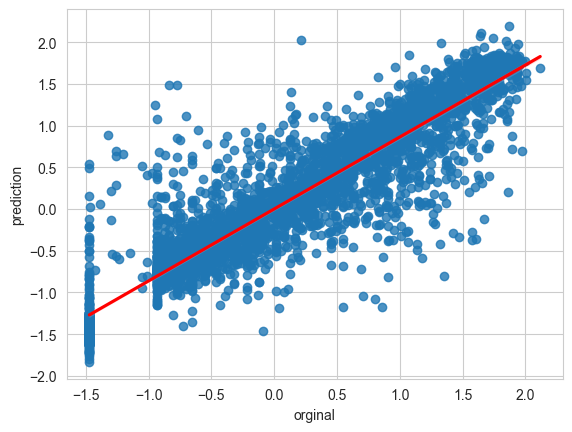

In [118]:
sns.regplot(x=df['orginal'],y=df['prediction'],line_kws={'color':'red'})

In [ ]:
                                         CLASSIFICATION MODEL

In [161]:
x1=GPdf.drop('primary_fuel',axis=1)

In [162]:
y1=GPdf.loc[:,'primary_fuel']

In [163]:
x1.shape

(13298, 17)

In [164]:
y1.shape

(13298,)

In [165]:
x1

name  gppd_idnr  capacity_mw  latitude  longitude  commissioning_year  \
0         76      13002    -0.549829 -1.293056   -31.3539            0.651684   
1         79      12864     1.081948 -1.647411   -31.3539           -0.304888   
2         97      13198     0.735882 -1.904950   -31.3539           -0.304888   
3        105        512     1.190784 -1.731752   -31.3539            0.094766   
4        109        513     1.874483 -1.900208   -31.3539            1.012041   
...      ...        ...          ...       ...        ...                 ...   
13293  13260       7059    -0.403210  0.836736   -76.9683            0.738729   
13294  13261      10616    -0.935606  1.098418   -92.6703            1.304589   
13295  13262      12370    -1.472178  1.047701   -92.7600           -0.304888   
13296  13263       1352    -1.472178  0.295796  -105.0170           -0.304888   
13297  13264       8526     0.115796  0.432657  -112.0478            0.898234   

       owner  source  geolocation_source  generation_gwh_2013  \
0       4771     185                   3           563.383222   
1       5419     185                   3           563.383222   
2         61     185                   3           563.383222   
3       1581     185                   3             2.414610   
4       1581     185                   3           563.383222   
...      ...     ...                 ...                  ...   
13293   5872     185                   3             3.671000   
13294   5874     185                   3           563.383222   
13295   5873     185                   3           563.383222   
13296   4208     185                   3             0.000000   
13297    567     185                   3            12.968000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                 0.590331             0.622834             0.667957   
1                 0.590331             0.622834             0.667957   
2                 0.590331             0.622834             0.667957   
3                 0.552383             1.084678             1.370604   
4                 2.374786             2.348679             2.380007   
...                    ...                  ...                  ...   
13293            -1.048874            -0.988003            -0.898981   
13294             0.590331             0.622834             0.667957   
13295             0.590331             0.622834             0.667957   
13296            -1.064547            -1.004906             0.667957   
13297            -0.852183            -0.716048            -0.598847   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                 0.709786             0.747471            -1.208352   
1                 0.709786             0.747471            -1.208352   
2                 0.709786             0.747471            -1.208352   
3                 1.010813             1.008562            -1.208352   
4                 2.382511             2.371207            -1.208352   
...                    ...                  ...                  ...   
13293            -0.837137            -0.769933            -0.465934   
13294             0.709786            -0.780419            -0.311172   
13295             0.709786             0.747471            -1.208352   
13296             0.709786             0.747471            -1.208352   
13297            -0.520856            -0.457161             1.028494   

       generation_data_source  
0                           2  
1                           2  
2                           2  
3                           1  
4                           1  
...                       ...  
13293                       2  
13294                       2  
13295                       2  
13296                       2  
13297                       2  

[13298 rows x 17 columns]

In [166]:
x1.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [167]:
y1

0        10
1         1
2        13
3         3
4         1
         ..
13293    13
13294    10
13295    10
13296    10
13297     3
Name: primary_fuel, Length: 13298, dtype: int32

In [177]:
x1['generation_gwh_2013']=x1['generation_gwh_2013'].fillna(GPdf['generation_gwh_2013'].mean())

In [178]:
x1['generation_gwh_2014']=x1['generation_gwh_2014'].fillna(GPdf['generation_gwh_2014'].mean())

In [183]:
x1['generation_gwh_2015']=x1['generation_gwh_2015'].fillna(x1['generation_gwh_2015'].mean())

In [179]:
x1['generation_gwh_2016']=x1['generation_gwh_2016'].fillna(x1['generation_gwh_2016'].mean())

In [180]:
x1['generation_gwh_2017']=x1['generation_gwh_2017'].fillna(x1['generation_gwh_2017'].mean())

In [181]:
x1['generation_gwh_2018']=x1['generation_gwh_2018'].fillna(x1['generation_gwh_2018'].mean())

In [245]:
x1['generation_gwh_2019']=x1['generation_gwh_2019'].fillna(x1['generation_gwh_2019'].mean())

In [127]:
x1.dtypes

name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
commissioning_year        float64
owner                       int32
source                      int32
geolocation_source          int32
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source      int32
dtype: object

In [168]:
pd.DataFrame(x1.isnull().sum())

0
name                    0
gppd_idnr               0
capacity_mw             0
latitude                0
longitude               0
commissioning_year      0
owner                   0
source                  0
geolocation_source      0
generation_gwh_2013     0
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
generation_gwh_2018     0
generation_gwh_2019     0
generation_data_source  0

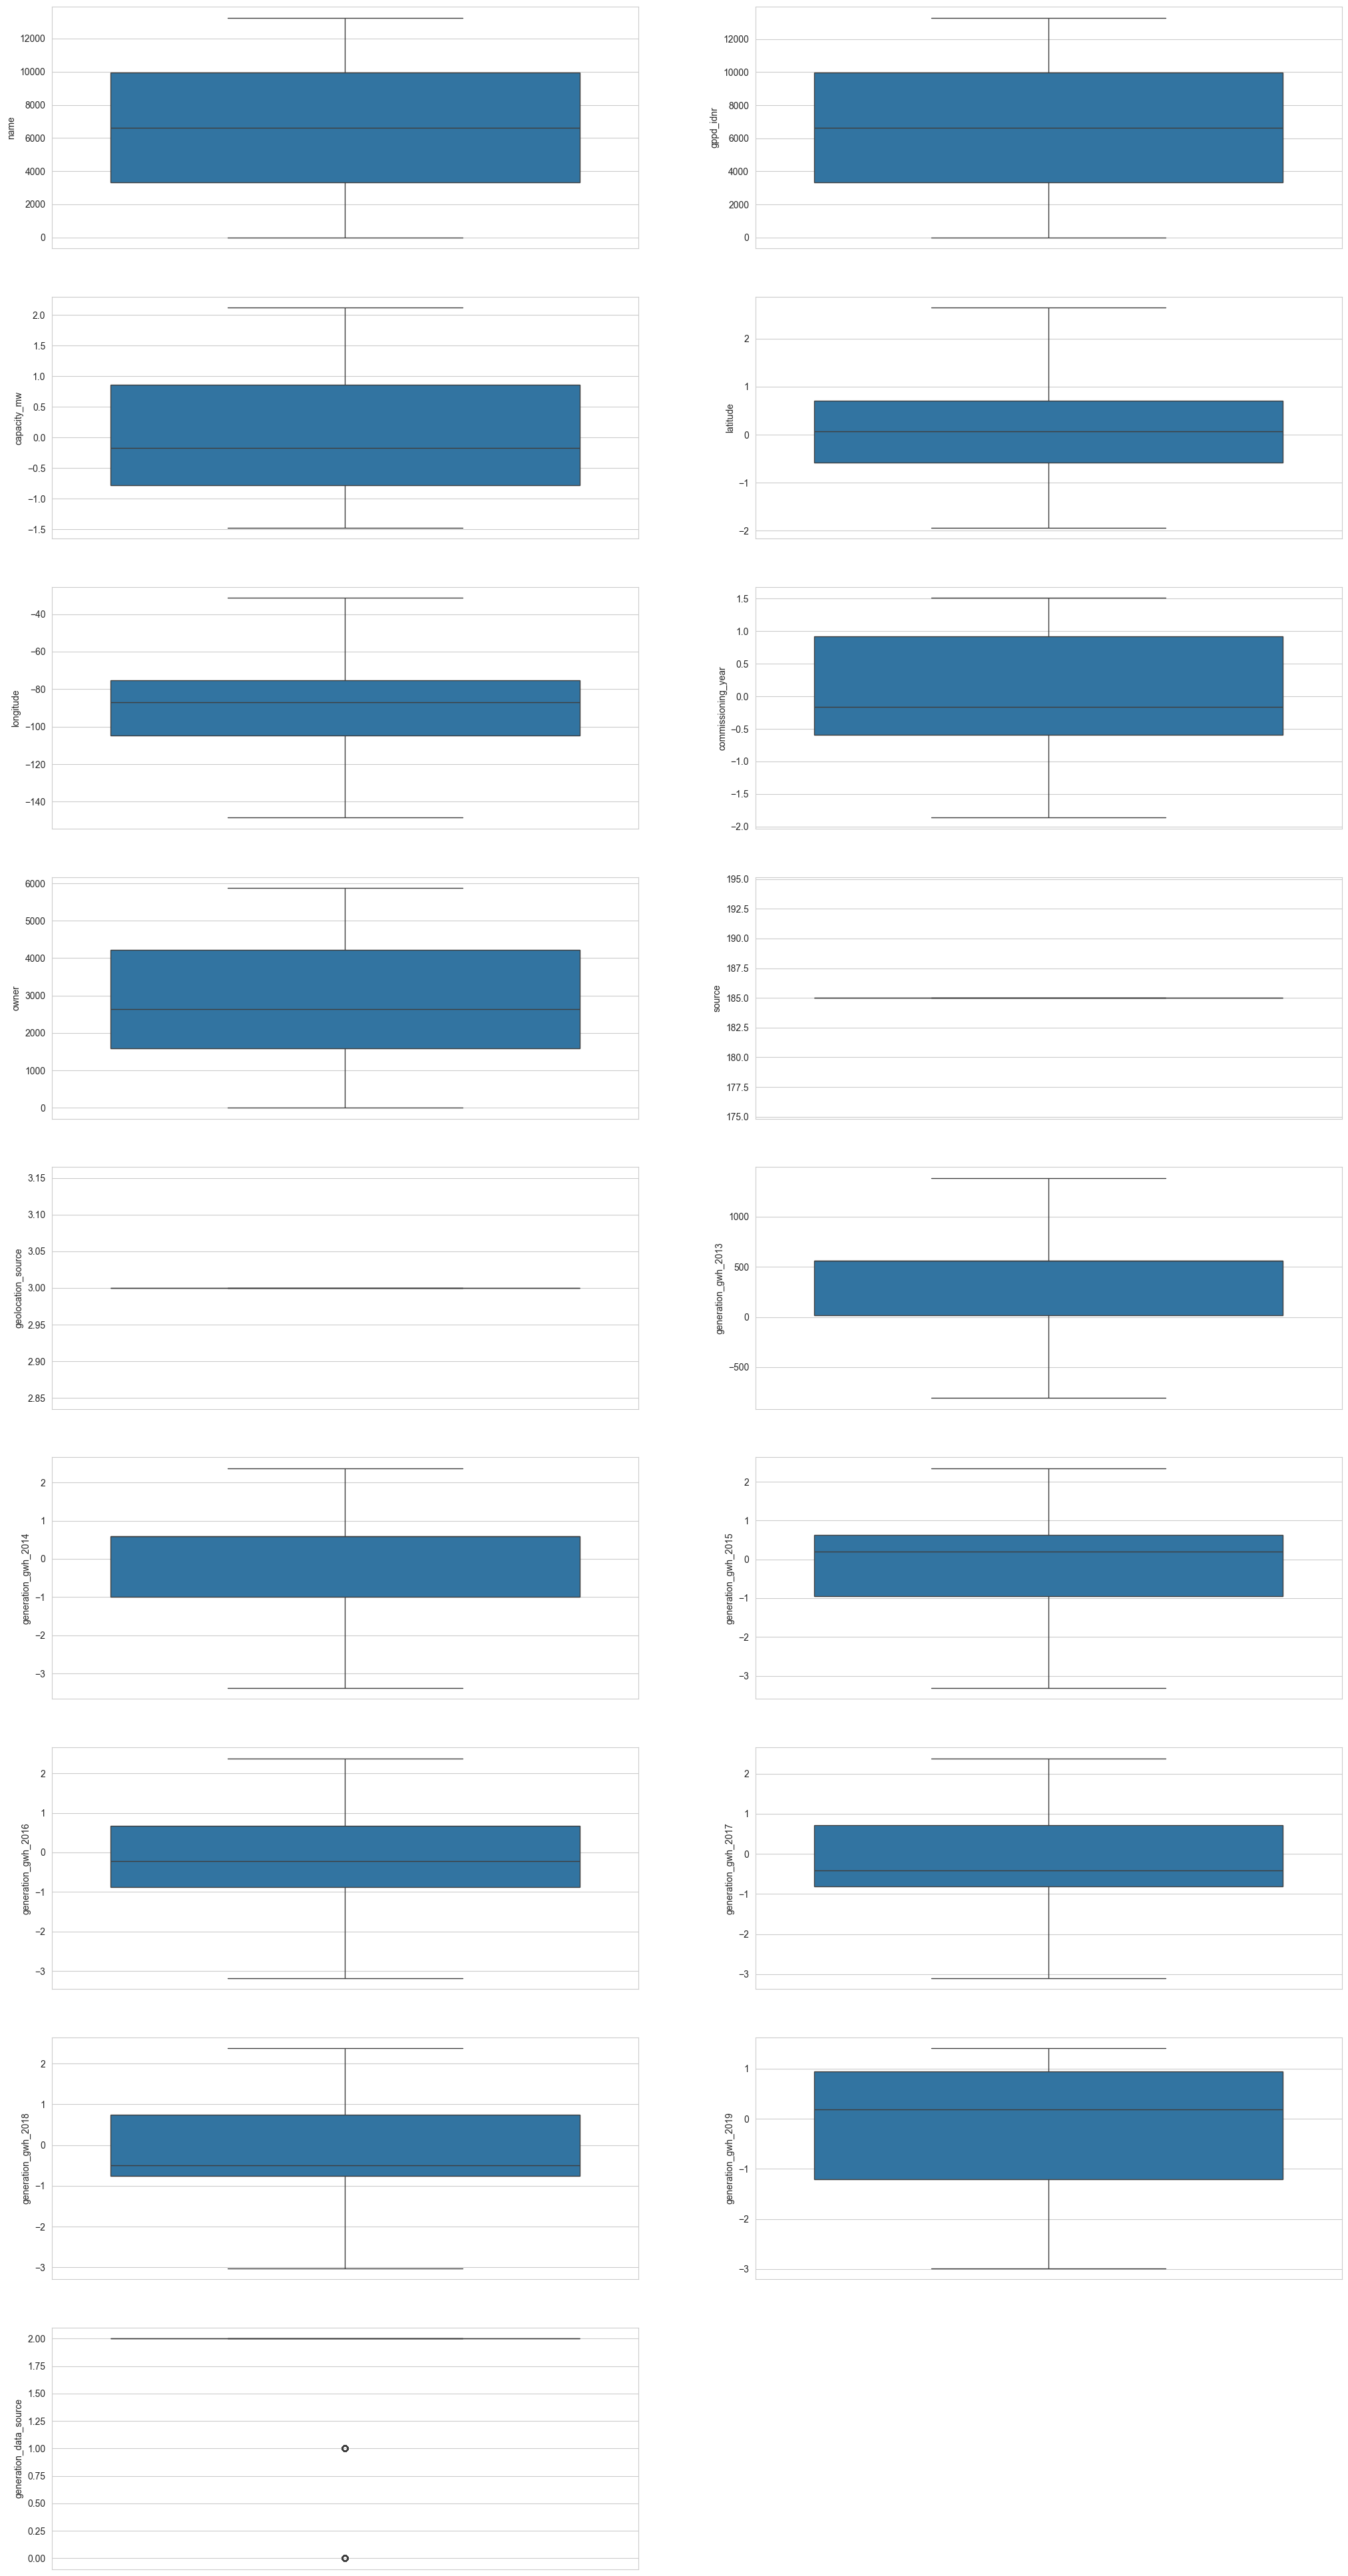

In [169]:
plt.figure(figsize=(25,50))

counter=1
for i in x1.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(x1[i])
        counter+=1
plt.show()

In [150]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(10,8))  
#for i in avdf.columns:
    Q1=x1[col].quantile(0.25)
   
    Q3=x1[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    x1[[col]]=arb.fit_transform(x1[[col]])
    plt.boxplot(x1[col],col)


In [131]:
x1.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [133]:
out_feature=['latitude' ,'source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

-2.517212764058116
2.6443569412485672
185.0
185.0
3.0
3.0
-3.3814494532535924
2.9733985422142837
-3.314734709313872
2.9853748937246896
-3.181396392355588
2.9775690394003194
-3.0976949500357116
2.994274559353707
-3.0222122770714
3.0092805228507213


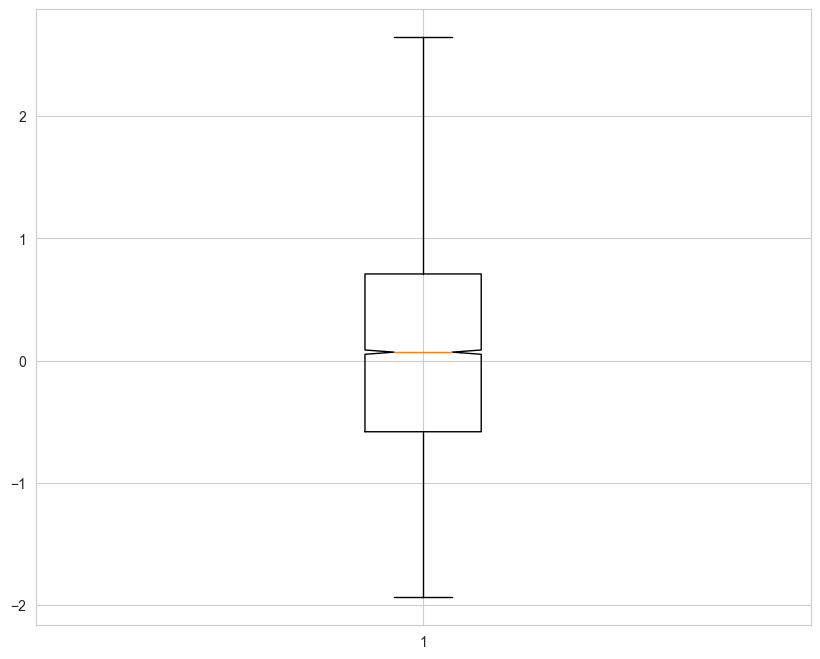

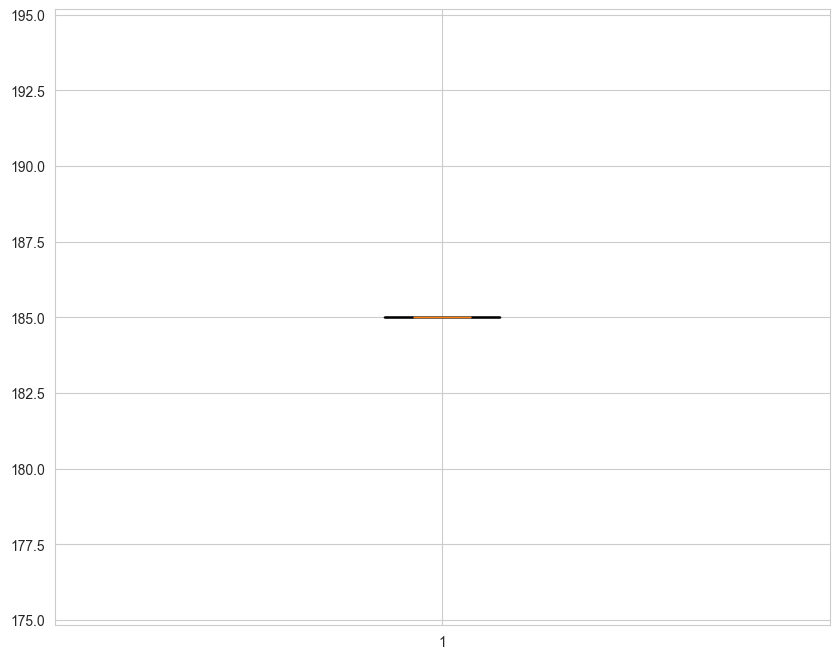

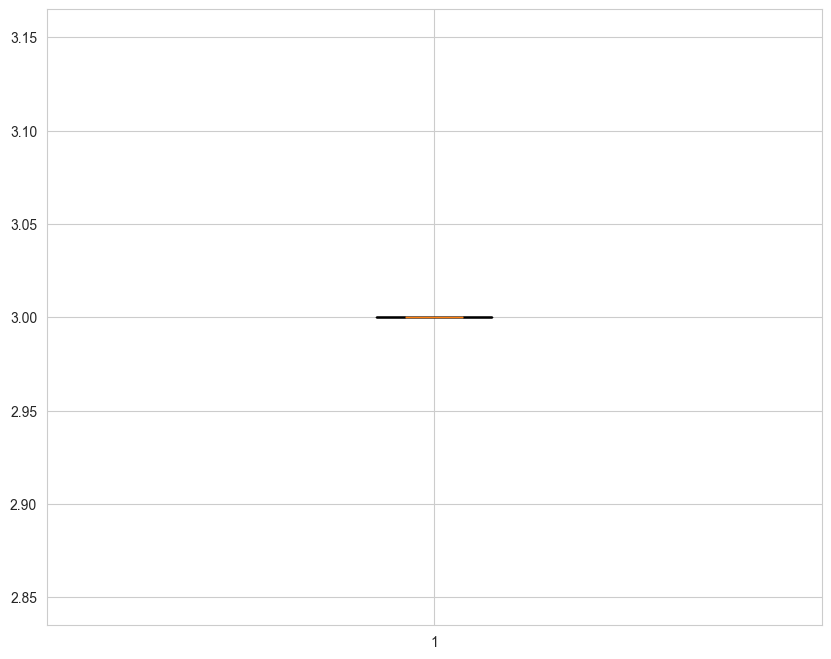

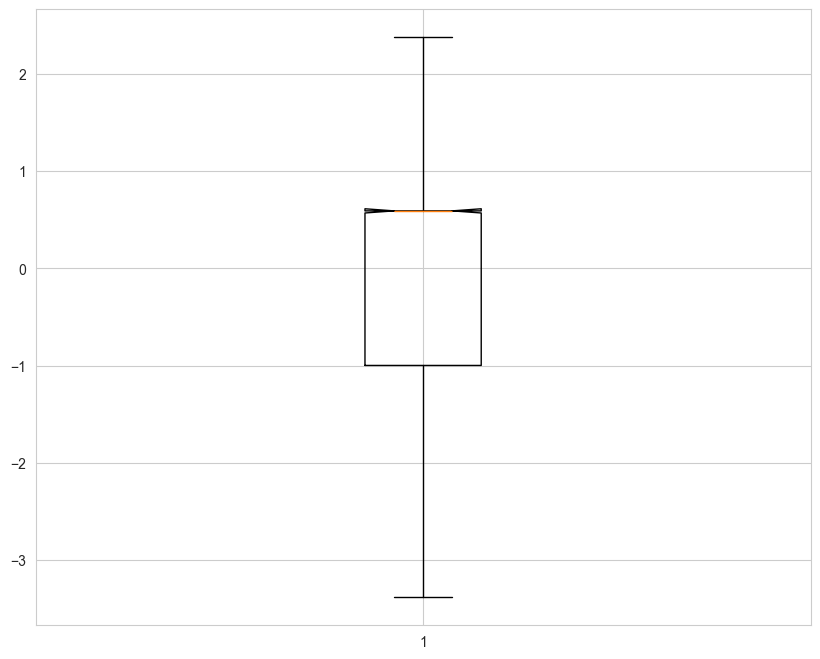

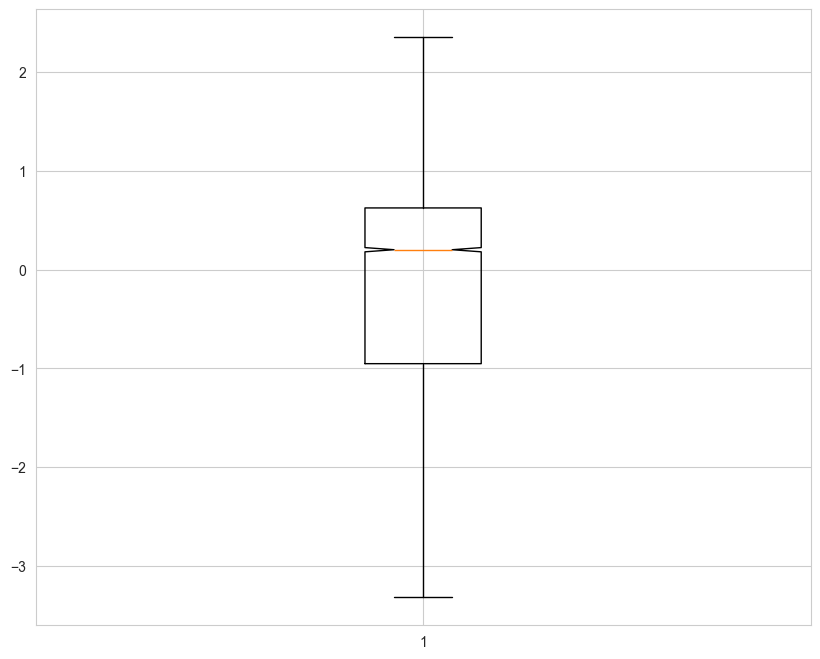

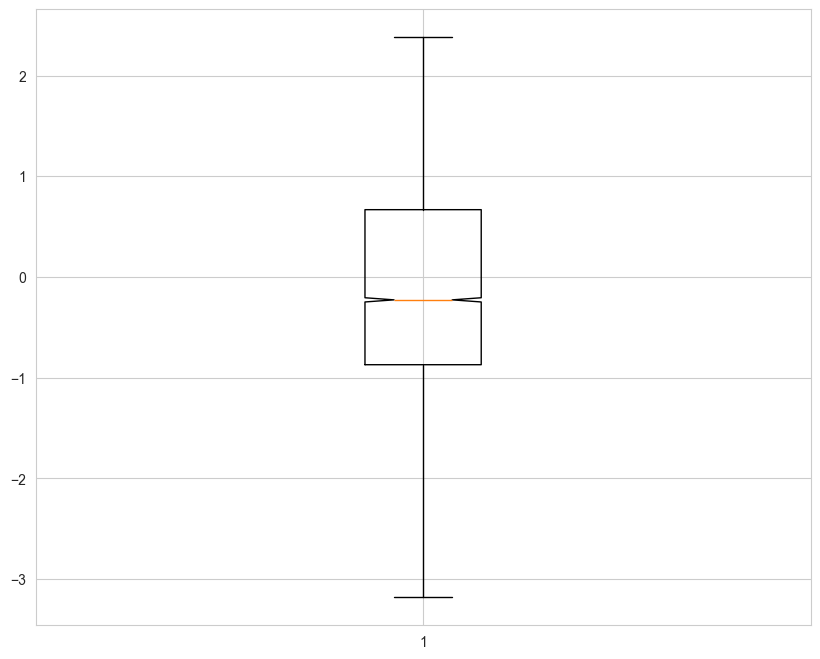

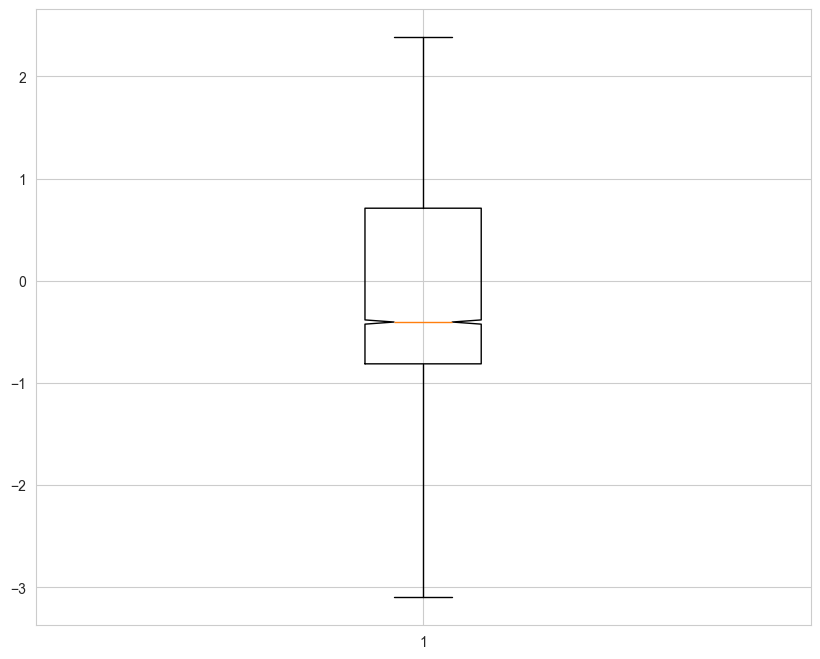

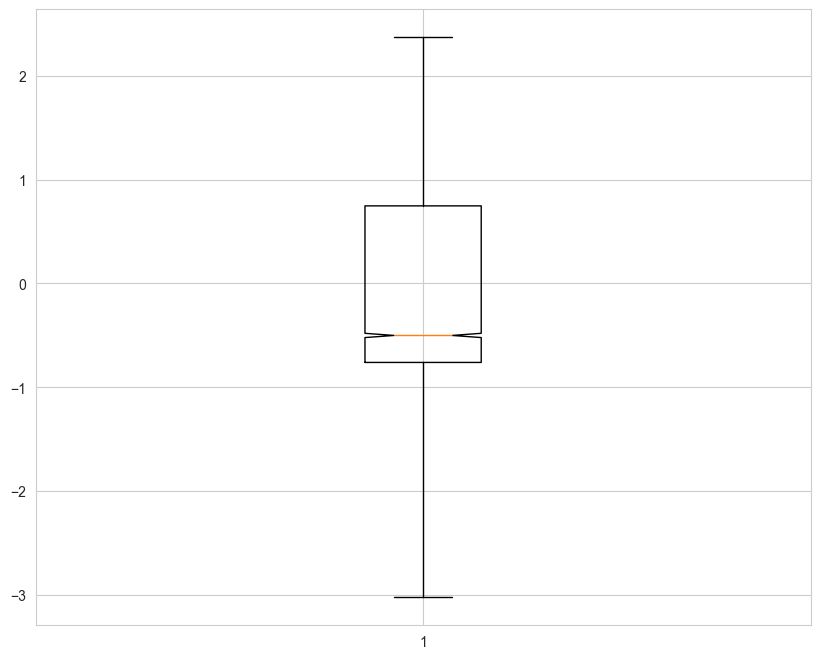

In [134]:
for col in out_feature:
    remove_outliers(col)
    

In [170]:
x1.skew()

name                      0.000218
gppd_idnr                 0.000000
capacity_mw               0.145940
latitude                 -0.212850
longitude                 0.517295
commissioning_year       -0.314837
owner                     0.146380
source                    0.000000
geolocation_source        0.000000
generation_gwh_2013       0.862610
generation_gwh_2014       0.458975
generation_gwh_2015       0.548381
generation_gwh_2016       0.709480
generation_gwh_2017       0.832493
generation_gwh_2018       0.941047
generation_gwh_2019      -0.130368
generation_data_source   -4.533387
dtype: float64

In [171]:
skew_feature =['generation_gwh_2013','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [172]:
for col in skew_feature:
    x1[col]=x1[col].apply(np.log1p)

In [173]:
x1.skew()

name                      0.000218
gppd_idnr                 0.000000
capacity_mw               0.145940
latitude                 -0.212850
longitude                 0.517295
commissioning_year       -0.314837
owner                     0.146380
source                    0.000000
geolocation_source        0.000000
generation_gwh_2013      -0.899644
generation_gwh_2014       0.458975
generation_gwh_2015      -1.218682
generation_gwh_2016      -0.194468
generation_gwh_2017       0.019520
generation_gwh_2018       0.171078
generation_gwh_2019      -0.130368
generation_data_source   -4.533387
dtype: float64

In [174]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns =x1.columns)

In [175]:
from imblearn.over_sampling import SMOTE

In [188]:
x1.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [186]:
smt=SMOTE()
x1,y1=smt.fit_resample(x1,y1)


In [151]:
x1.value_counts()

name       gppd_idnr  capacity_mw  latitude   longitude  commissioning_year  owner      source     geolocation_source  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  generation_data_source
-1.731519   1.332317  -1.472178     0.615687   0.619588  -0.304888           -1.681431   0.336481  0.163877             0.715035             0.452781             6.550842e-01         0.891874             0.958468             1.017787            -1.208352            0.232644                  1
 0.590864  -0.309295  -0.000058    -1.125845  -0.193209  -0.040232            0.011101   0.336481  0.163877            -1.059544             0.005774            -1.934766e-17        -1.384932            -1.246525            -1.146481             0.788264            0.232644                  1
 0.590841  -0.967895   1.862077     0.526341   0.308355  -1.124505           -0.447142   0.336481  0.163877             1.0

In [187]:
y1.value_counts()

primary_fuel
10    5484
1     5484
13    5484
3     5484
5     5484
0     5484
7     5484
6     5484
12    5484
11    5484
2     5484
4     5484
9     5484
8     5484
Name: count, dtype: int64

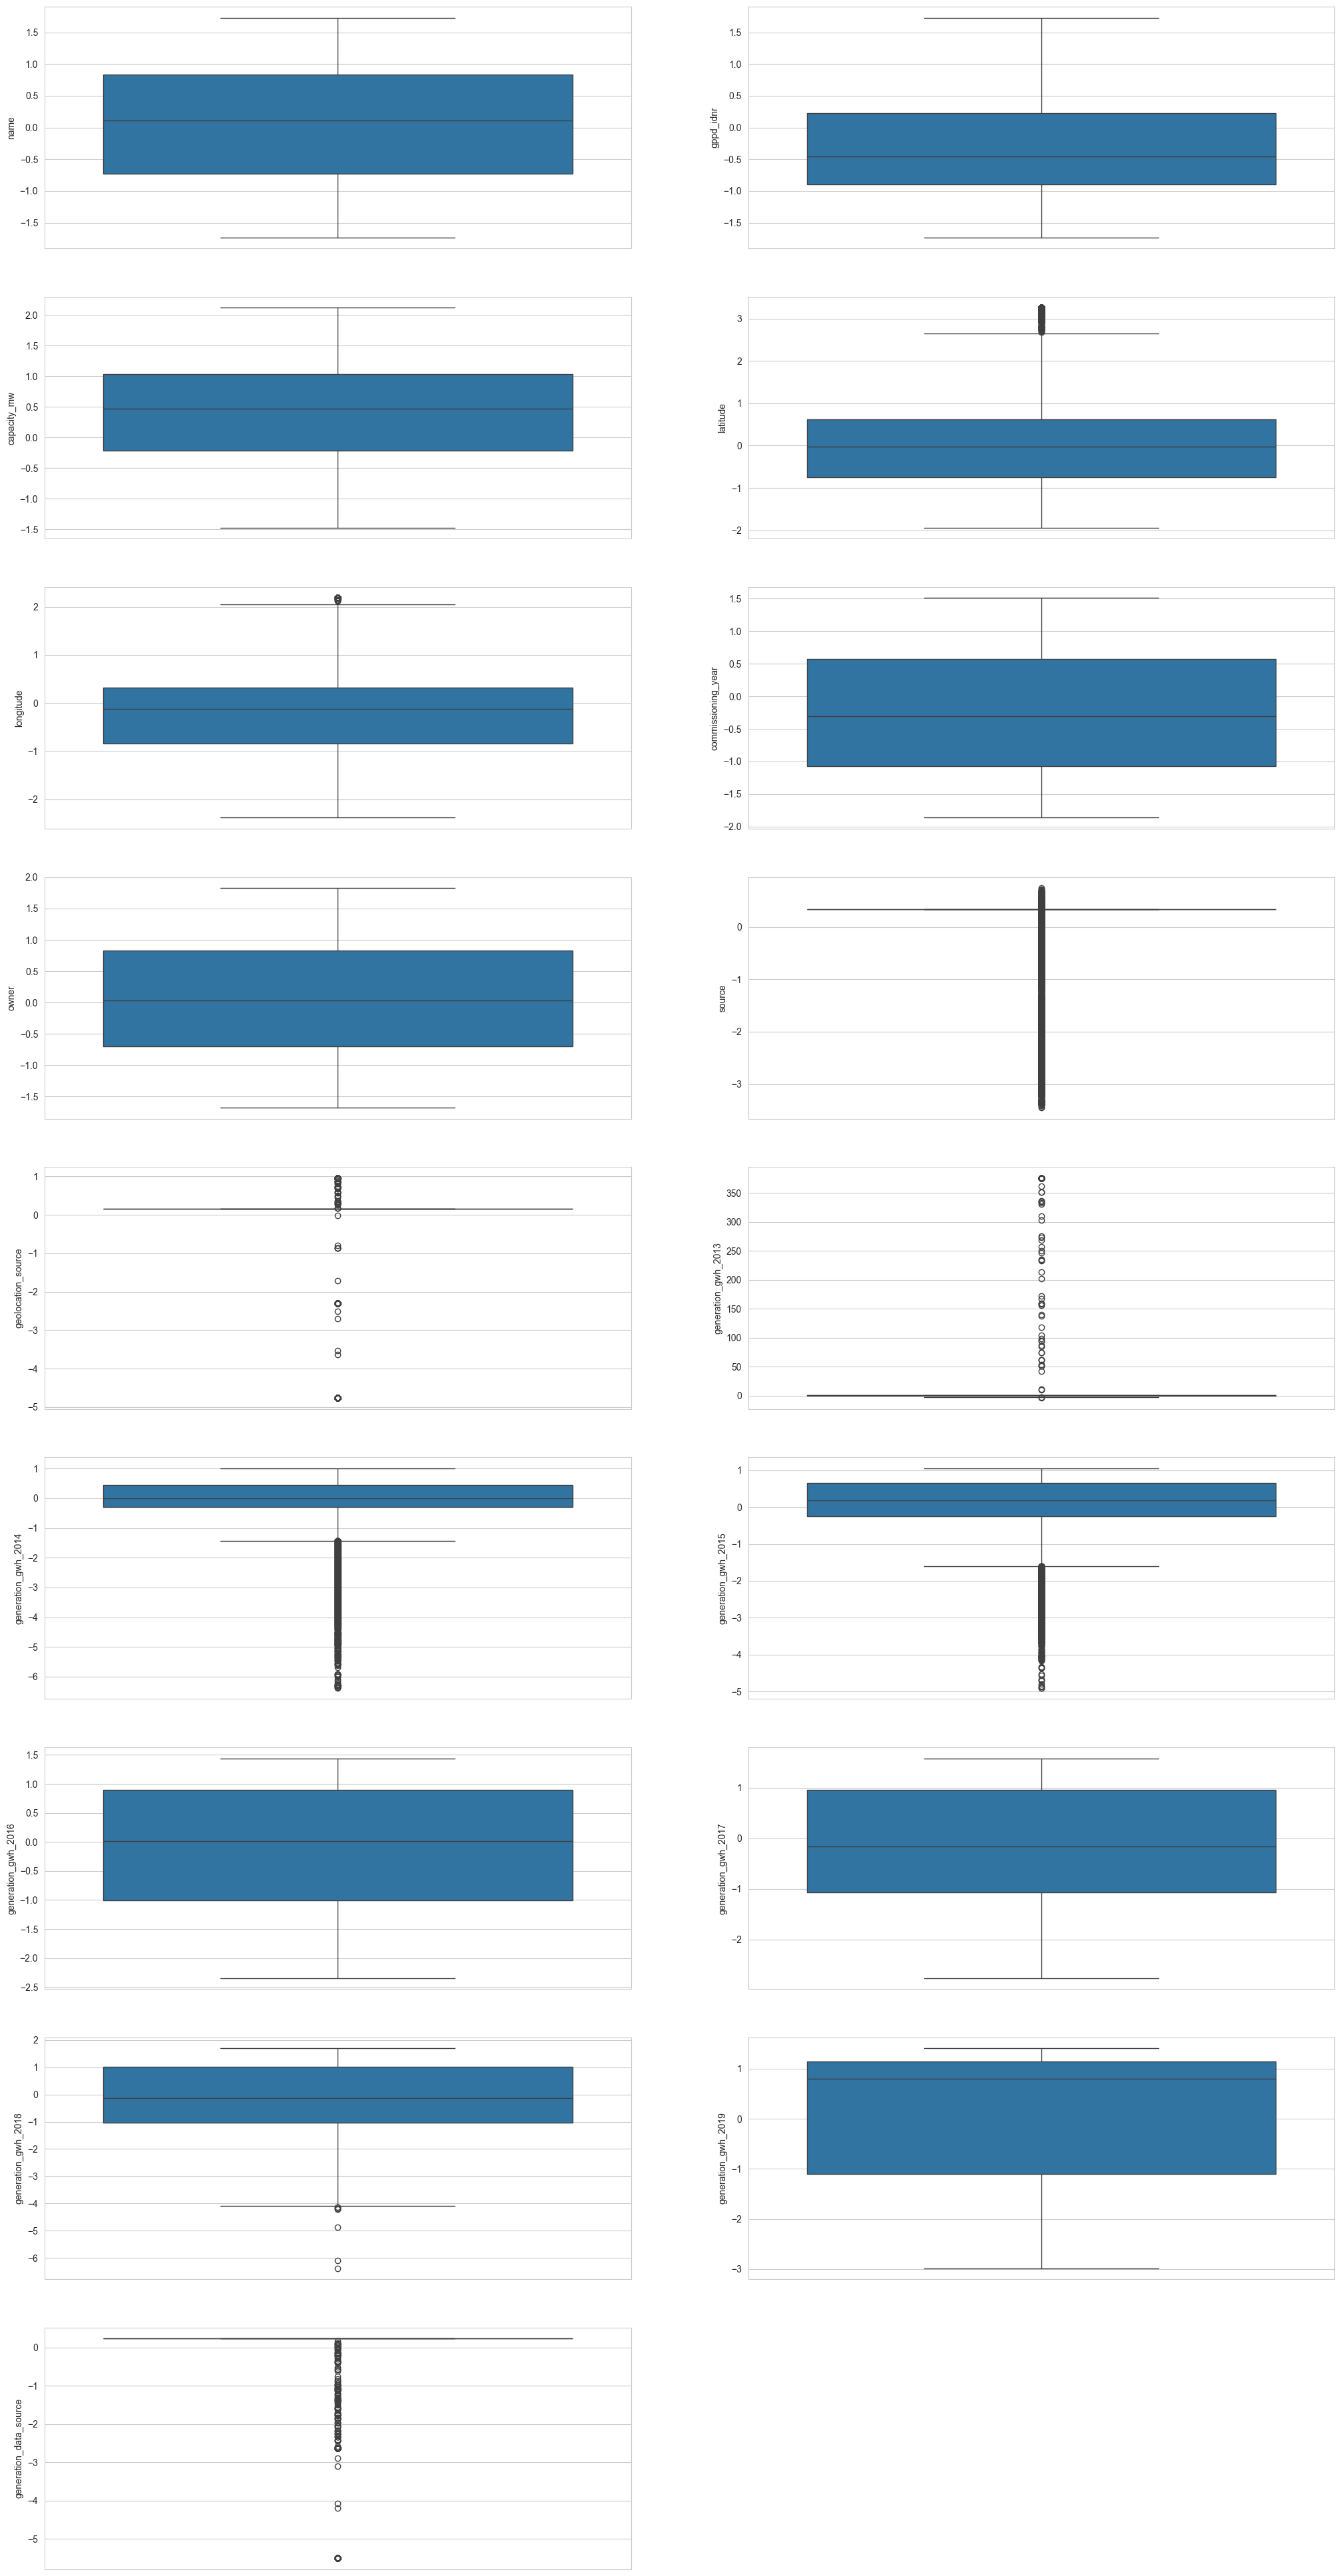

In [154]:
plt.figure(figsize=(25,50))

counter=1
for i in x1.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(x1[i])
        counter+=1
plt.show()

In [169]:
x1

name  gppd_idnr  capacity_mw  latitude  longitude  \
0     -1.711676   1.655074    -0.411579 -1.436926   2.186101   
1     -1.710893   1.619125     1.023631 -2.167972   2.186101   
2     -1.706193   1.706131     0.746543 -2.253934   2.186101   
3     -1.704104  -1.598546     1.110715 -2.253934   2.186101   
4     -1.703060  -1.598285     1.682618 -2.253934   2.186101   
...         ...        ...          ...       ...        ...   
76771 -1.418676   0.141891     1.042778  1.287386  -0.553409   
76772  0.337846  -1.607849     1.369903 -2.253934   2.186101   
76773  0.685135  -1.610757     1.316879 -2.253934   2.186101   
76774  1.646468   0.133542     1.077350 -0.222795  -1.214926   
76775  0.756824   0.050621     0.796974  0.369398   0.315850   

       commissioning_year     owner  source  geolocation_source  \
0                0.670173  1.168724     0.0           -0.858276   
1               -0.099554  1.555834     0.0            0.956721   
2               -0.099554 -1.644990     0.0            0.956721   
3                0.250405 -0.736955     0.0            0.956721   
4                0.909310 -0.736955     0.0            0.956721   
...                   ...       ...     ...                 ...   
76771            0.789808 -1.629458     0.0            0.163877   
76772           -0.099554  0.815407     0.0           -4.761719   
76773           -0.179263 -1.344867     0.0           -4.761719   
76774            0.730007 -1.251306     0.0            0.163877   
76775            0.695838  0.733883     0.0            0.163877   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.715035             0.654283             0.689966   
1                 0.715035             0.654283             0.689966   
2                 0.715035             0.654283             0.689966   
3                -1.444208             0.648473             0.751564   
4                 0.715035             0.827188             0.861862   
...                    ...                  ...                  ...   
76771             0.409622             0.511759             0.533604   
76772             0.702889             0.619876             0.481282   
76773             0.925406             0.771706             0.804460   
76774             0.461937             0.481861             0.497468   
76775             0.135248             0.306506             0.332317   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                 0.849599             0.908538             0.967412   
1                 0.849599             0.908538             0.967412   
2                 0.849599             0.908538             0.967412   
3                 1.035810             0.998801             1.048769   
4                 1.221391             1.281617             1.341875   
...                    ...                  ...                  ...   
76771             0.630465             0.712578             0.713565   
76772             0.242851             0.487990             0.681893   
76773             1.124763             1.145598             1.059790   
76774             0.590094             0.651049             0.732937   
76775             0.241002             0.350817             0.409537   

       generation_gwh_2019  generation_data_source  
0                -1.236155                0.232644  
1                -1.236155                0.232644  
2                -1.236155                0.232644  
3                -1.236155               -2.637205  
4                -1.236155               -2.637205  
...                    ...                     ...  
76771             1.131945                0.232644  
76772            -1.236155               -5.507054  
76773            -1.236155               -5.507054  
76774             1.125418                0.232644  
76775             1.048692                0.232644  

[76776 rows x 17 columns]

In [190]:
x1.skew()

name                      -0.102367
gppd_idnr                  0.543708
capacity_mw               -0.099911
latitude                  -0.101958
longitude                  0.720763
commissioning_year         0.158803
owner                      0.089200
source                     0.000000
geolocation_source         0.000000
generation_gwh_2013       25.364430
generation_gwh_2014        0.914891
generation_gwh_2015       -1.197117
generation_gwh_2016       -0.047057
generation_gwh_2017        0.195044
generation_gwh_2018        0.257384
generation_gwh_2019       -0.605623
generation_data_source    -4.416299
dtype: float64

In [191]:
x1.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

vif values                features
0     1.187515                    name
1     2.904779               gppd_idnr
2     3.053968             capacity_mw
3     1.437168                latitude
4     1.935645               longitude
5     2.038563      commissioning_year
6     1.248061                   owner
7     1.047145     generation_gwh_2013
8     3.445413     generation_gwh_2014
9     2.663029     generation_gwh_2015
10    6.299198     generation_gwh_2016
11    8.987221     generation_gwh_2017
12    6.709291     generation_gwh_2018
13    2.528658     generation_gwh_2019
14    2.165834  generation_data_source

In [193]:
x1.drop(['source','geolocation_source'],axis=1,inplace=True)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


In [198]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=98)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.9688707506620935


In [199]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(15,10))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



In [ ]:
RFC=RandonForestClassifier()
classification_models(LR,x_train,y_train,x_test,y_test)

0.5972734771849086
[[ 505   50   81   11   50  129    0   48   74   98  255   11  264   47]
 [  99  724    9   94   43   66  487   31   20   78    0    0    4   38]
 [ 148    0  611   56   20   10    0   39  184  147   26    0  204  177]
 [  49  158   51  370  143   97  126  181   75   88  103   14   98  120]
 [   0    0    2   10 1391    0    8   40   57   11    1    3    0  119]
 [  48  103   23   18   44 1075   56   28   46   72   14    1   78   26]
 [   0  171    0    0    0    0 1355    0    0    0   97    0    0    0]
 [  37   58    3   43   57  112   12 1153    4   28   55   30   16   31]
 [  77    2  227    9  136   54    0   96  741  188    0   35   50    0]
 [   6   29    0   23   67    0   35    0  120 1355    0    0    0    0]
 [  76    8   31    2   61   36    6   23    8    9 1181   36   59  127]
 [   2    0    7    1    1    0    0   18    0    0   40 1550    0    3]
 [  94    6   99   21  145   62    0   70   40   70  123    6  880   44]
 [ 155   83    3   25  180   34 

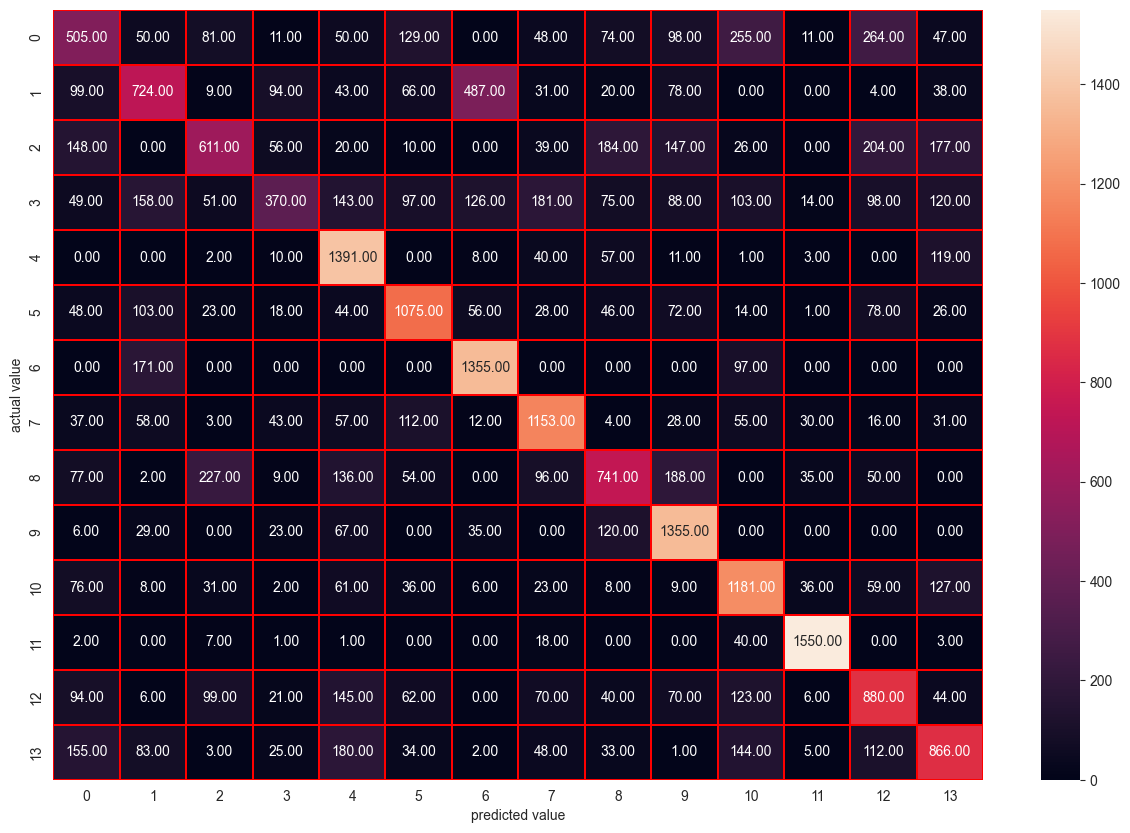

In [200]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.6825858550774975
[[ 840   34  115    5   46   94    0   41   48   67  127    9  171   26]
 [ 174  801   11   86    3   69  395   31   21   89    0    0    6    7]
 [  21    0  928   11   22    1    0   13  129  139   41    0  175  142]
 [  87  136   73  494  130   69   48  197   61   71   96   14  102   95]
 [   0    1    2    2 1560    0   11   24   25    0    4    5    0    8]
 [  88   78   29   14   33 1160   44   39   38   30   12    0   56   11]
 [   0  206    0    2    0    1 1315    1    0    0   98    0    0    0]
 [  73   33    8   46   24   34    2 1294    4    9   47   33   20   12]
 [   0    0  186    0    8    0    0    0 1243  178    0    0    0    0]
 [   4   14    3   34    0    0   32    0    0 1548    0    0    0    0]
 [ 141    8   13    2   66    9    0   21    0    0 1246   40   64   53]
 [   3    0    0    0    0    0    0    6    1    0   40 1570    2    0]
 [ 130   10   74   32  140   31    2   64   53   75  109    7  903   30]
 [ 287   37   34   23  172   50 

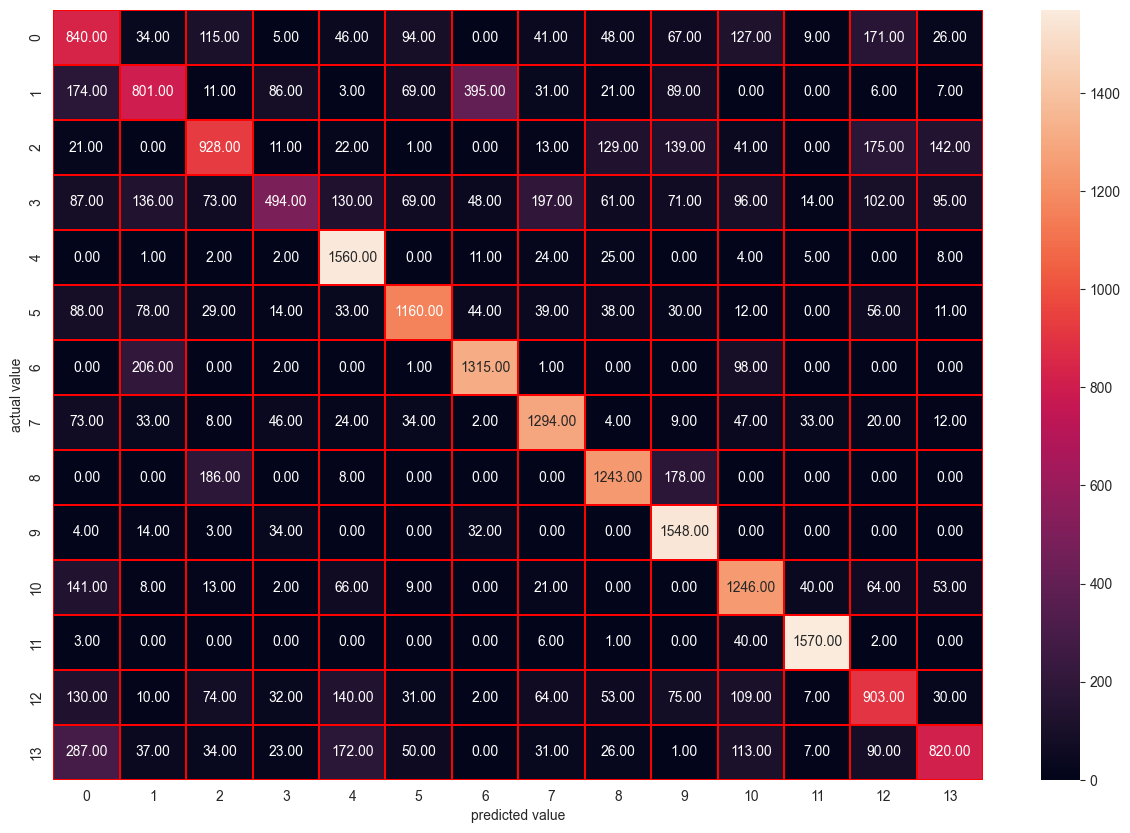

In [201]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)


0.976685624972865
[[1608    0    1    1    1    0    0    0    0    0    8    0    2    2]
 [   6 1656    0   17    0    6    2    0    1    1    1    0    3    0]
 [   0    0 1622    0    0    0    0    0    0    0    0    0    0    0]
 [  21   34    2 1434    9   17    1   56    2    0   26    3   47   21]
 [   0    0    0    0 1642    0    0    0    0    0    0    0    0    0]
 [   0    9    1   11    1 1586    0    4    0    0    5    0    7    8]
 [   0    2    0    0    0    0 1621    0    0    0    0    0    0    0]
 [   6    6    0   20    0    7    0 1596    0    0    3    0    1    0]
 [   0    0    0    0    0    0    0    0 1615    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1635    0    0    0    0]
 [   2    0    1    5    3    4    0    2    0    0 1603    3    7   33]
 [   0    0    0    0    0    0    0    0    0    0    0 1622    0    0]
 [   4    0    3    1    2    3    0    5    0    0   14    0 1625    3]
 [   4    0    1   11    2    4  

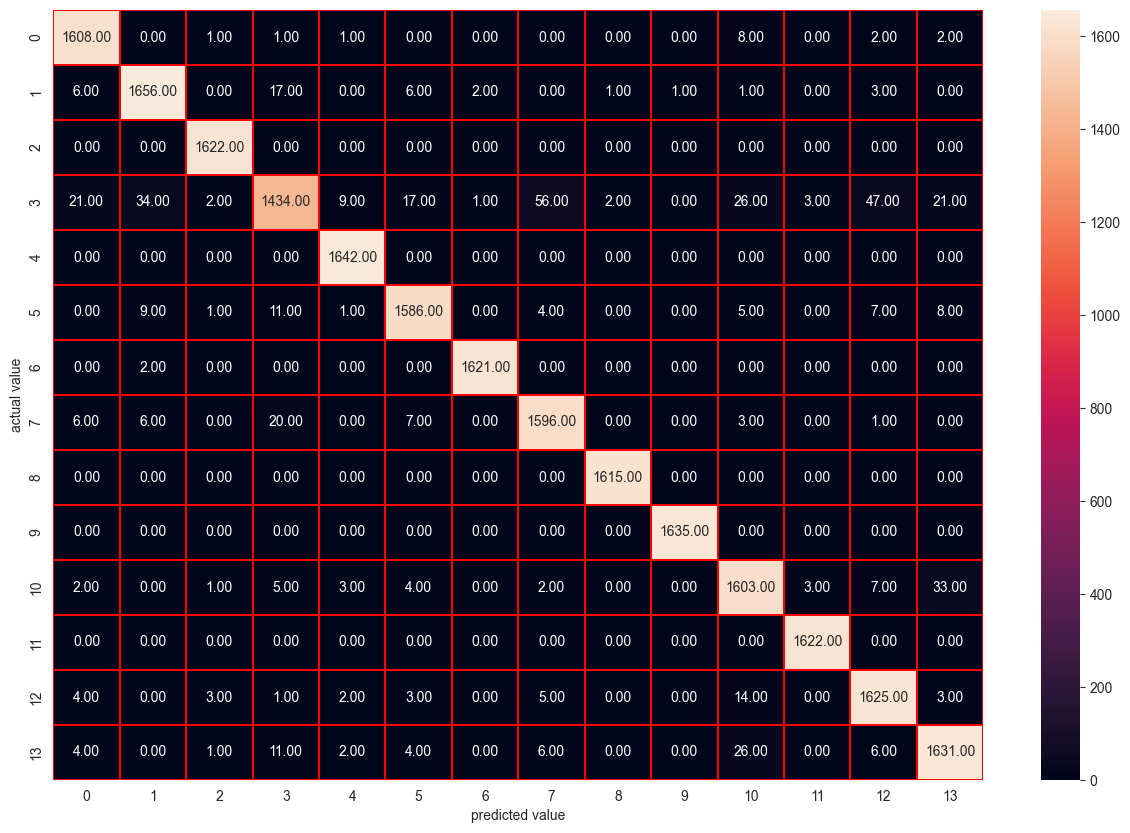

In [202]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.8834281248643251
[[1260   37   27   15   16   20    0   18   18   10   48    2  127   25]
 [  40 1413   20   75    0   39   54   10   11   14    1    0    9    7]
 [   1    0 1594    0    1    1    0    0    0    0    1    0    6   18]
 [  56   90   39  964   29   39    5  145   35   12   53   10  132   64]
 [   2    0    1    3 1630    1    0    0    0    0    5    0    0    0]
 [  25   41    1   36   13 1405    7   14    4    5    6    0   57   18]
 [   0   24    0    1    0    1 1592    3    0    1    1    0    0    0]
 [  35   17    3   85    0   27    0 1421    0    2    9    3   21   16]
 [   0    0    3    0    1    0    0    0 1607    2    0    0    2    0]
 [   0    1    0    0    0    0    0    0    0 1634    0    0    0    0]
 [  17    0    8    4   11    1    0    3    2    0 1543    5   14   55]
 [   1    0    1    0    0    0    0    0    1    0   14 1605    0    0]
 [ 114    0   49   20   41   36    4   25   24   13   38    1 1273   22]
 [  33    2   17   47   21   18 

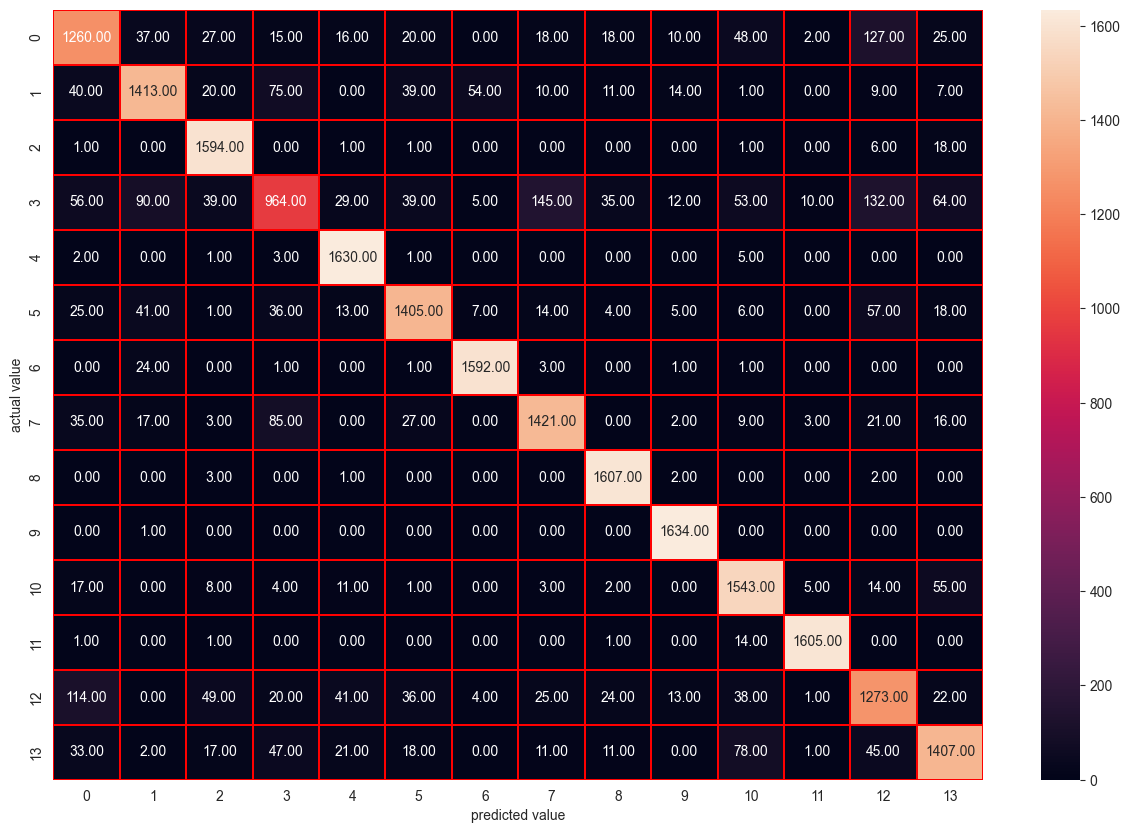

In [203]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.9505492120001736
[[1564    5    3    3    2    5    1    3    3    0   19    0   11    4]
 [  15 1599    4   31    0   13   18    2    1    3    0    0    7    0]
 [   0    0 1616    0    0    0    0    0    0    0    0    0    1    5]
 [  32   70   10 1323    8   29    4   69   12    5   25    4   48   34]
 [   0    0    0    0 1642    0    0    0    0    0    0    0    0    0]
 [  13   31    3   34    3 1509    1    7    1    0    4    0   22    4]
 [   0    8    0    2    0    0 1612    0    0    0    1    0    0    0]
 [   9    9    0   52    2   19    0 1531    0    0    6    1    8    2]
 [   0    2    0    0    0    0    0    0 1613    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1635    0    0    0    0]
 [  13    0    4   19    7    1    2    5    3    0 1558    6   10   35]
 [   2    0    0    0    0    0    0    0    0    0    6 1614    0    0]
 [  25    2   12   20    4   20    1    6    1    3   23    0 1535    8]
 [  11    2    9   37    6   10 

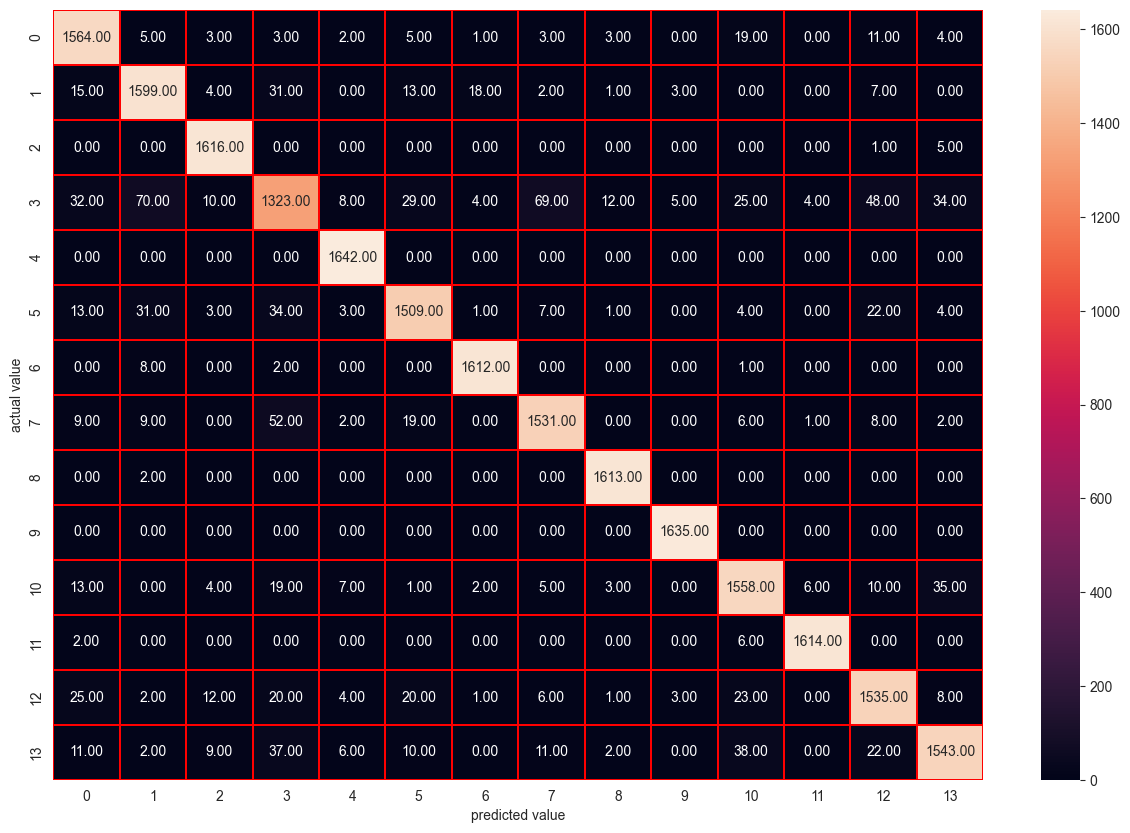

In [204]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.918898971041549
[[1470   18    3   27    4   14    2    6    1    2   28    1   28   19]
 [  17 1498    1   77    0   31   39    9    1    8    1    0    8    3]
 [   5    0 1593    6    1    2    0    0    1    0    4    0    5    5]
 [  32   71   11 1220   10   60   12   84    9    5   33    4   69   53]
 [   3    0    0    5 1619    5    0    0    0    1    4    0    3    2]
 [   8   29    4   49    7 1443    3   34    0    1    6    0   29   19]
 [   0   18    0    4    0    0 1597    0    0    0    1    0    3    0]
 [  12    4    1   93    1   27    1 1462    0    0    7    4   14   13]
 [   0    0    0    7    0    1    0    1 1601    0    0    0    4    1]
 [   2    2    0    1    0    0    0    0    0 1628    0    0    2    0]
 [  26    1    5   25    9    7    3   10    3    0 1496   10   22   46]
 [   2    0    0    0    0    0    0    1    0    0    8 1609    2    0]
 [  40   12    9   47    3   26    0    7    5    9   28    1 1445   28]
 [  21    4   14   46   13    9  

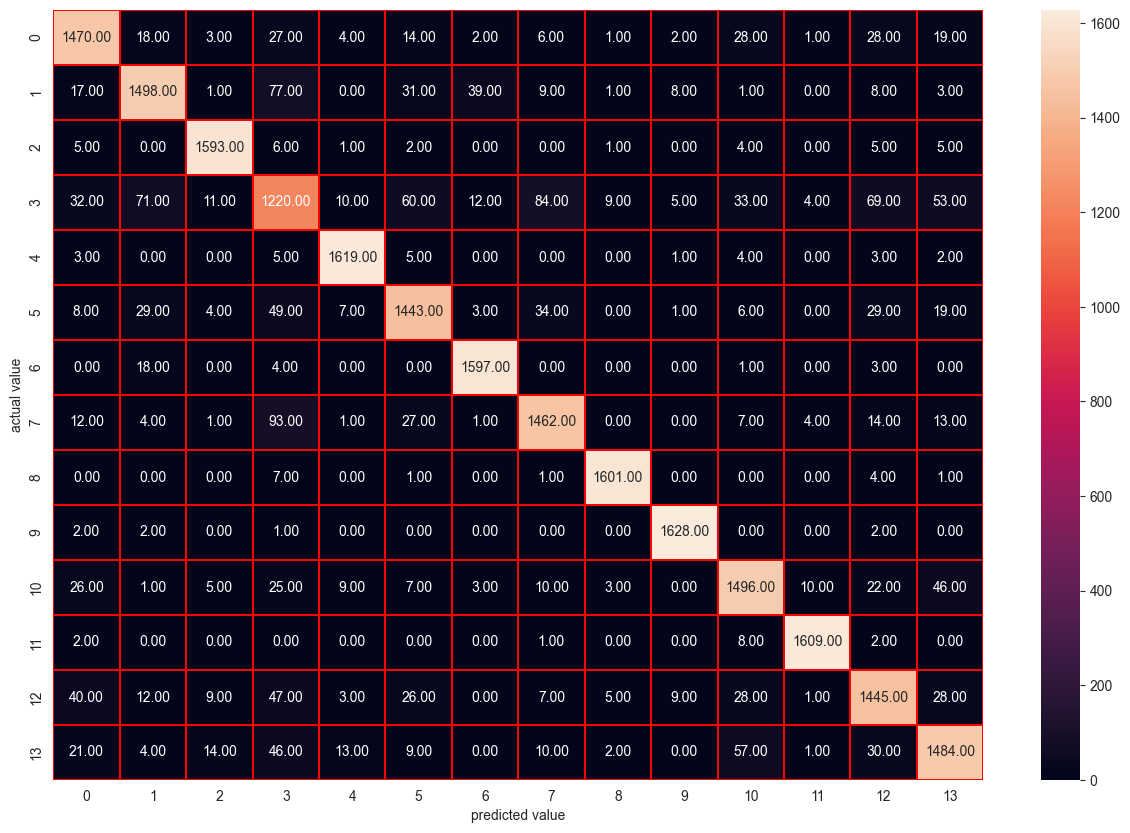

In [205]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [206]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [207]:
cross_validation(LR,x1,y1,x_test)


[0.57345663 0.59166395 0.59980462 0.59732986 0.58814718]
0.5900804499299337
differnce between accuracy score and cross validation is 0.0071930272549749485


In [208]:
cross_validation(svc,x1,y1,x_test)



[0.6643006  0.68922175 0.69475741 0.68993813 0.68616086]
0.6848757499107897
differnce between accuracy score and cross validation is -0.0022898948332922275


In [209]:
cross_validation(etc,x1,y1,x_test)


[0.96385778 0.98000651 0.98508629 0.98267665 0.98300228]
0.9789259022106744
differnce between accuracy score and cross validation is -0.002240277237809396


In [ ]:
cross_validation(gbc,x1,y1,x_test)


In [211]:
cross_validation(bgc,x1,y1,x_test)


[0.90681167 0.94952784 0.96183654 0.94347118 0.91390427]
0.9351102987734328
differnce between accuracy score and cross validation is 0.015438913226740847


In [212]:
cross_validation(RFC,x1,y1,x_test)


[0.95324303 0.97271247 0.97902963 0.97290785 0.96808857]
0.9691963107387556
differnce between accuracy score and cross validation is -0.0003255600766620681


In [ ]:
                                        KEY OBSERVATION

In [ ]:
#From the above cross validation score of the above algorithm i have selected ExtraTreesClassifier as my final model 

[0.96385778 0.98000651 0.98508629 0.98267665 0.98300228]
0.9789259022106744
differnce between accuracy score and cross validation is -0.002240277237809396

In [214]:
final_model_regressor1=ExtraTreesClassifier()
final_model_regressor1.fit(x_train,y_train)
pred=final_model_regressor1.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)
score=cross_val_score(final_model_regressor1,x1,y1,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.957233442315171
[0.96320656 0.98033214 0.98423966 0.9828069  0.98378378]
97.88738103996847
difference between r2 score and cross validation score is  -2.164036808451364


In [215]:
import joblib 

In [216]:
joblib.dump(final_model_regressor1,'Global_power_plant_classification.pkl')

['Global_power_plant_classification.pkl']

In [218]:
model1=joblib.load('Global_power_plant_classification.pkl')

In [219]:
df=pd.DataFrame()
prediction=model1.predict(x_test)

In [220]:
dummy_test=np.array(y_test)

In [221]:
df['orignal']=dummy_test
df['prediction']=prediction
df

orignal  prediction
0            4           4
1           12          12
2            0           0
3           11          11
4            9           9
...        ...         ...
23028        0           0
23029        2           2
23030        9           9
23031       10          10
23032        5           5

[23033 rows x 2 columns]